nesta copy1 tentativa de aug somente a classe minor. nao convence... recall bem pior na minor

# 📌 1) Suprimir logs INFO e WARNING do TensorFlow (Opcional, para um output mais limpo)
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suprime logs INFO e WARNING do TensorFlow

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"  # Remove INFO e DEBUG, mantendo WARNINGS e ERRORS

import tensorflow as tf
tf.get_logger().setLevel("ERROR")  # Mostra apenas mensagens de erro

# 📌 2) Desinstalar pacotes conflitantes antes de reinstalar
!pip uninstall -y tensorflow keras tensorflow-hub tf-keras

# 📌 3) Instalar versões específicas e compatíveis
!pip install tensorflow==2.15 keras==2.15 tensorflow-hub==0.16.1

# 📌 4) Atualizar transformers para a versão mais recente
!pip install --upgrade transformers

# 📌 5) Importar TensorFlow e verificar a versão instalada
import tensorflow as tf
print("Versão atual do TensorFlow:", tf.__version__)

# 📌 6) Verificar se a GPU está sendo detectada corretamente
print("TensorFlow vê a GPU?", tf.config.list_physical_devices('GPU'))

# 📌 7) Importar TensorFlow Hub
import tensorflow_hub as hub
print("✅ TensorFlow Hub importado com sucesso!")

# 📌 8) Importar Transformers (Hugging Face)
from transformers import TFAutoModel, AutoImageProcessor
print("✅ Importação bem-sucedida!")

import tensorflow as tf

# Verificar se o TensorFlow está usando a GPU
print("TensorFlow está usando GPU?", tf.test.is_built_with_cuda())

# Ver detalhes da GPU disponível
print("Dispositivos disponíveis:", tf.config.list_physical_devices('GPU'))

# Criar um tensor simples e rodar na GPU
with tf.device('/GPU:0'):
    a = tf.constant([[1.0, 2.0], [3.0, 4.0]])
    b = tf.constant([[1.0, 1.0], [0.0, 1.0]])
    c = tf.matmul(a, b)
print("Resultado do cálculo na GPU:", c.numpy())


In [2]:
# Importar pandas
import pandas as pd

# Caminho para o arquivo de labels
labels_path = "/notebooks/RSNA_Pneumonia_512_v2_final_labels.csv"

# Carregar o arquivo de labels
labels = pd.read_csv(labels_path)

# Exibir os primeiros registros para inspeção
print("Primeiros registros do dataset original:")
print(labels.head())

# Verificar o número total de amostras antes da consolidação
print(f"\nNúmero total de amostras antes da consolidação: {len(labels)}")

# Verificar a distribuição inicial dos rótulos
print("\nDistribuição inicial dos rótulos:")
print(labels['Target'].value_counts())


Primeiros registros do dataset original:
                              patientId  Target
0  e43dfd99-e6f6-454c-9aea-ce72f2485627       0
1  f4d4d49c-57bd-45fc-92e3-bdb587005341       0
2  e6c94d90-e526-4d7d-b2bc-4a3a16c91012       0
3  fca8b18a-9851-4115-af53-6d7540820888       0
4  358ce773-7448-43c4-acac-e23992458776       0

Número total de amostras antes da consolidação: 31359

Distribuição inicial dos rótulos:
Target
0    20672
1    10687
Name: count, dtype: int64


In [3]:
# Verificar duplicatas no DataFrame completo
duplicated_rows = labels[labels.duplicated()]
print(f"Número de duplicatas no DataFrame completo: {len(duplicated_rows)}")

# Exibir as duplicatas (se houver)
if not duplicated_rows.empty:
    print("Duplicatas encontradas:")
    print(duplicated_rows)

# Verificar duplicatas apenas no patientId
duplicated_patient_ids = labels[labels['patientId'].duplicated()]
print(f"Número de duplicatas no patientId: {len(duplicated_patient_ids)}")

# Exibir duplicatas por patientId (se houver)
if not duplicated_patient_ids.empty:
    print("Duplicatas por patientId encontradas:")
    print(duplicated_patient_ids)


Número de duplicatas no DataFrame completo: 0
Número de duplicatas no patientId: 0


In [4]:
# Consolidar os rótulos por patientId
simplified_labels = labels.groupby('patientId').agg({
    'Target': 'max'  # Se qualquer Target for 1, o resultado será 1
}).reset_index()

# Exibir os primeiros registros após a consolidação
print("Primeiros registros após a consolidação:")
print(simplified_labels.head())

# Verificar o número total de amostras após a consolidação
print(f"\nNúmero total de amostras após a consolidação: {len(simplified_labels)}")

# Verificar a nova distribuição dos rótulos
print("\nDistribuição dos rótulos após a consolidação:")
print(simplified_labels['Target'].value_counts())


Primeiros registros após a consolidação:
                              patientId  Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6       0
1  000924cf-0f8d-42bd-9158-1af53881a557       0
2  000db696-cf54-4385-b10b-6b16fbb3f985       1
3  000fe35a-2649-43d4-b027-e67796d412e0       1
4  001031d9-f904-4a23-b3e5-2c088acd19c6       1

Número total de amostras após a consolidação: 31359

Distribuição dos rótulos após a consolidação:
Target
0    20672
1    10687
Name: count, dtype: int64


In [5]:
import numpy as np

# Número de classes (0: Normal, 1: Pneumonia)
num_classes = 2

# Aplicar One-Hot Encoding ao campo 'Target'
simplified_labels['Target_OneHot'] = list(
    np.eye(num_classes)[simplified_labels['Target']]
)

# Exibir os primeiros registros com One-Hot Encoding
print("Primeiros registros com One-Hot Encoding:")
print(simplified_labels[['patientId', 'Target', 'Target_OneHot']].head())


Primeiros registros com One-Hot Encoding:
                              patientId  Target Target_OneHot
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6       0    [1.0, 0.0]
1  000924cf-0f8d-42bd-9158-1af53881a557       0    [1.0, 0.0]
2  000db696-cf54-4385-b10b-6b16fbb3f985       1    [0.0, 1.0]
3  000fe35a-2649-43d4-b027-e67796d412e0       1    [0.0, 1.0]
4  001031d9-f904-4a23-b3e5-2c088acd19c6       1    [0.0, 1.0]


In [6]:
import os

# Diretório base das imagens PNG organizadas por classe
png_base_dir = "/notebooks/RSNA_Pneumonia"

# Verificar se as imagens PNG existem para todos os patientIds
labels['Exists'] = labels['patientId'].apply(
    lambda x: os.path.exists(
        os.path.join(png_base_dir, 'Pneumonia', f"{x}.png")
    ) or os.path.exists(
        os.path.join(png_base_dir, 'Normal', f"{x}.png")
    )
)

# Filtrar os IDs que não têm uma imagem correspondente
missing_images = labels[~labels['Exists']]
print(f"Imagens ausentes (em PNG): {len(missing_images)}")

# Exibir os IDs das imagens ausentes (se houver)
if not missing_images.empty:
    print("IDs das imagens ausentes:")
    print(missing_images[['patientId', 'Target']])


Imagens ausentes (em PNG): 0


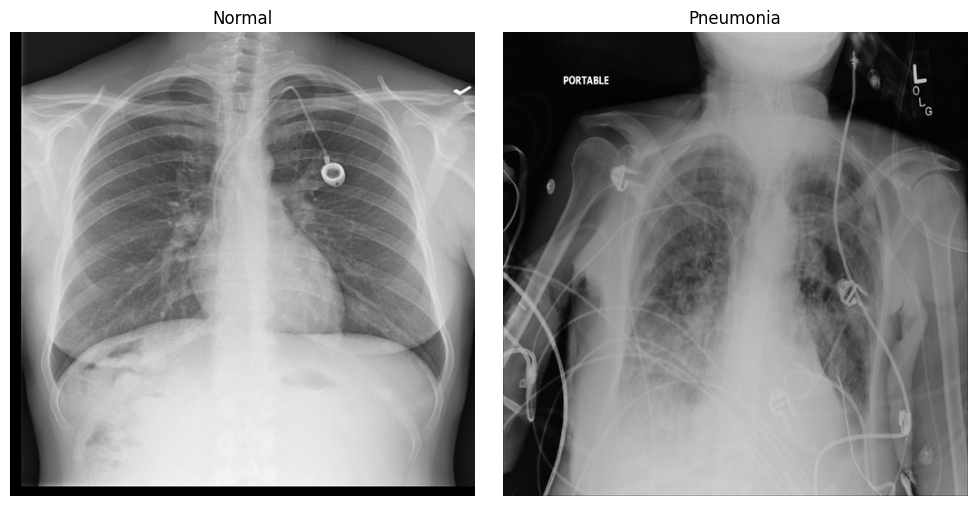

In [7]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Diretórios das pastas
normal_dir = "/notebooks/RSNA_Pneumonia/Normal"
pneumonia_dir = "/notebooks/RSNA_Pneumonia/Pneumonia"

# Criar uma lista com as pastas e seus nomes
folders = [
    {'name': 'Normal', 'path': normal_dir},
    {'name': 'Pneumonia', 'path': pneumonia_dir}
]

# Criar um gráfico para mostrar uma imagem de cada pasta
plt.figure(figsize=(10, 5))

for i, folder in enumerate(folders):
    # Pegar o primeiro arquivo PNG da pasta
    image_file = next((f for f in os.listdir(folder['path']) if f.endswith('.png')), None)

    if image_file:  # Se houver uma imagem na pasta
        image_path = os.path.join(folder['path'], image_file)
        img = Image.open(image_path)

        # Mostrar a imagem
        plt.subplot(1, len(folders), i + 1)
        plt.imshow(img)
        plt.title(folder['name'])
        plt.axis('off')

plt.tight_layout()
plt.show()


In [8]:
#1. Distribuição das Classes
import os

# Diretórios das classes
normal_dir = "/notebooks/RSNA_Pneumonia/Normal"
pneumonia_dir = "/notebooks/RSNA_Pneumonia/Pneumonia"

# Contar o número de imagens em cada pasta
normal_count = len([f for f in os.listdir(normal_dir) if f.endswith('.png')])
pneumonia_count = len([f for f in os.listdir(pneumonia_dir) if f.endswith('.png')])

# Exibir a distribuição
print("Distribuição das classes:")
print(f"Normal: {normal_count}")
print(f"Pneumonia: {pneumonia_count}")

Distribuição das classes:
Normal: 20672
Pneumonia: 10687


#2. Dimensões das Imagens
from PIL import Image

# Verificar dimensões das imagens
def get_image_dimensions(directory):
    dimensions = []
    for file in os.listdir(directory):
        if file.endswith('.png'):
            img = Image.open(os.path.join(directory, file))
            dimensions.append(img.size)
    return dimensions

# Dimensões para cada classe
normal_dims = get_image_dimensions(normal_dir)
pneumonia_dims = get_image_dimensions(pneumonia_dir)

# Exibir alguns exemplos
print("\nDimensões das imagens (Normal):")
print(normal_dims[:5])
print("\nDimensões das imagens (Pneumonia):")
print(pneumonia_dims[:5])


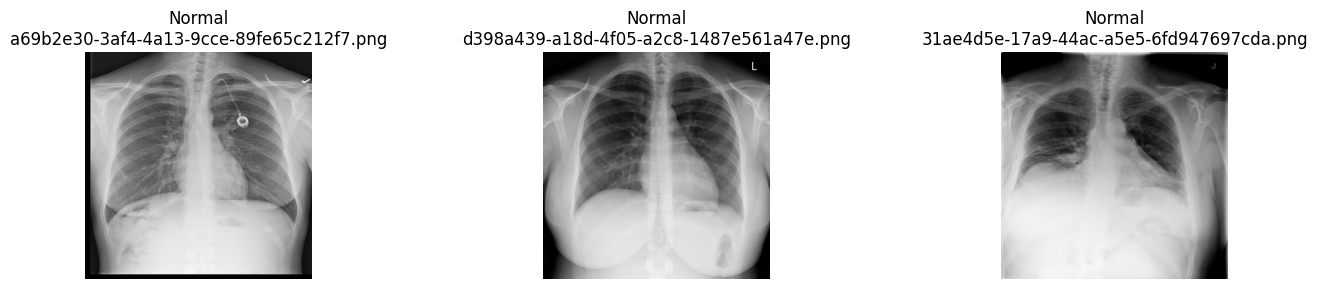

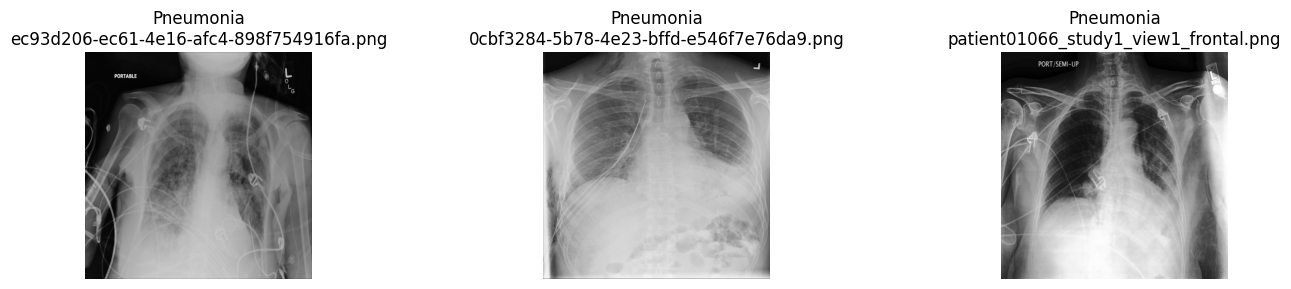

In [9]:
# 3. Análise Visual
import matplotlib.pyplot as plt
from PIL import Image

# Visualizar algumas imagens
def show_images(directory, title, num_images=3):
    plt.figure(figsize=(15, 3))
    files = [f for f in os.listdir(directory) if f.endswith('.png')][:num_images]
    for i, file in enumerate(files):
        img = Image.open(os.path.join(directory, file))
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"{title}\n{file}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualizar imagens de ambas as classes
show_images(normal_dir, "Normal")
show_images(pneumonia_dir, "Pneumonia")


In [10]:
# Verificar o tamanho médio dos arquivos em cada classe
def get_average_file_size(directory):
    file_sizes = [os.path.getsize(os.path.join(directory, f)) for f in os.listdir(directory) if f.endswith('.png')]
    return sum(file_sizes) / len(file_sizes)

normal_avg_size = get_average_file_size(normal_dir)
pneumonia_avg_size = get_average_file_size(pneumonia_dir)

print("\nTamanho médio dos arquivos:")
print(f"Normal: {normal_avg_size / 1024:.2f} KB")
print(f"Pneumonia: {pneumonia_avg_size / 1024:.2f} KB")



Tamanho médio dos arquivos:
Normal: 169.67 KB
Pneumonia: 189.55 KB


In [11]:
import random
import numpy as np
from PIL import Image

# Diretórios das classes
normal_dir = "/notebooks/RSNA_Pneumonia/Normal"
pneumonia_dir = "/notebooks/RSNA_Pneumonia/Pneumonia"

# Amostra aleatória de arquivos
sample_size = 50  # Ajuste o tamanho da amostra conforme necessário
normal_files = random.sample([f for f in os.listdir(normal_dir) if f.endswith('.png')], min(sample_size, len(os.listdir(normal_dir))))
pneumonia_files = random.sample([f for f in os.listdir(pneumonia_dir) if f.endswith('.png')], min(sample_size, len(os.listdir(pneumonia_dir))))

# Função para calcular estatísticas de pixel
def calculate_pixel_stats(files, directory):
    all_pixels = []
    for file in files:
        img = Image.open(os.path.join(directory, file)).convert('L')  # Converter para escala de cinza
        all_pixels.append(np.array(img).flatten())
    all_pixels = np.concatenate(all_pixels)
    return {
        'min': np.min(all_pixels),
        'max': np.max(all_pixels),
        'mean': np.mean(all_pixels),
        'std': np.std(all_pixels)
    }

# Calcular estatísticas para cada classe
normal_pixel_stats = calculate_pixel_stats(normal_files, normal_dir)
pneumonia_pixel_stats = calculate_pixel_stats(pneumonia_files, pneumonia_dir)

print("\nEstatísticas dos pixels (Normal):")
print(normal_pixel_stats)

print("\nEstatísticas dos pixels (Pneumonia):")
print(pneumonia_pixel_stats)




Estatísticas dos pixels (Normal):
{'min': 0, 'max': 255, 'mean': 131.1338330078125, 'std': 63.74979151035682}

Estatísticas dos pixels (Pneumonia):
{'min': 0, 'max': 255, 'mean': 129.0233765411377, 'std': 68.61347505465861}


In [12]:
from sklearn.model_selection import GroupShuffleSplit
import pandas as pd
import numpy as np

# Dados de entrada
X = simplified_labels['patientId']
y = np.array(simplified_labels['Target_OneHot'].tolist())  # Converter Target_OneHot para um array NumPy
groups = simplified_labels['patientId']  # Garantir que imagens do mesmo paciente fiquem no mesmo conjunto

# 📌📌📌Configurar o GroupShuffleSplit com proporção 80/20 para treino/validação📌📌📌
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Realizar o split
train_idx, val_idx = next(gss.split(X, y, groups=groups))

# Criar DataFrames para treino e validação
train_data = simplified_labels.iloc[train_idx].reset_index(drop=True)
val_data = simplified_labels.iloc[val_idx].reset_index(drop=True)

# Separar os rótulos no formato One-Hot
y_train = y[train_idx]
y_val = y[val_idx]

# Verificar os tamanhos dos conjuntos
print(f"Tamanho do conjunto de treino: {len(train_data)}")
print(f"Tamanho do conjunto de validação: {len(val_data)}")

print("\nDistribuição no treino:")
print(train_data['Target'].value_counts(normalize=True))

print("\nDistribuição na validação:")
print(val_data['Target'].value_counts(normalize=True))



Tamanho do conjunto de treino: 25087
Tamanho do conjunto de validação: 6272

Distribuição no treino:
Target
0    0.657592
1    0.342408
Name: proportion, dtype: float64

Distribuição na validação:
Target
0    0.665657
1    0.334343
Name: proportion, dtype: float64


In [13]:
import numpy as np

# Função para verificar a distribuição das classes em um conjunto de dados One-Hot Encoded
def check_distribution(y_set, set_name):
    # Somar as colunas para contar as ocorrências de cada classe
    class_counts = np.sum(y_set, axis=0)
    total_samples = len(y_set)
    class_proportions = class_counts / total_samples

    print(f"Class distribution in the {set_name} set:")
    for class_idx, count in enumerate(class_counts):
        print(f"Class {class_idx}: {int(count)} ({class_proportions[class_idx] * 100:.2f}%)")
    print("\n")

# Verificar a distribuição das classes no conjunto de treino
check_distribution(y_train, "Training")

# Verificar a distribuição das classes no conjunto de validação
check_distribution(y_val, "Validation")


# Opcional: Verificar a distribuição no conjunto de teste, se disponível
# test_data é o conjunto de teste separado
# check_distribution(test_data['Target'], "Test")

Class distribution in the Training set:
Class 0: 16497 (65.76%)
Class 1: 8590 (34.24%)


Class distribution in the Validation set:
Class 0: 4175 (66.57%)
Class 1: 2097 (33.43%)




In [14]:
# Extrair IDs únicos de pacientes nos conjuntos de treino e validação
train_patient_ids = set(train_data['patientId'])
val_patient_ids = set(val_data['patientId'])

common_train_val = train_patient_ids.intersection(val_patient_ids)

# Exibir resultados
print(f"Number of patients in common between training and validation: {len(common_train_val)}")

# Garantir que não há interseção
if len(common_train_val) == 0:
    print("No patient leakage between training and validation sets. Splits are clean!")
else:
    print("Warning: Patient IDs overlap between training and validation sets!")


Number of patients in common between training and validation: 0
No patient leakage between training and validation sets. Splits are clean!


In [15]:
# Exibir as primeiras entradas do conjunto de treino
print("Primeiros registros do conjunto de treino:")
print(train_data.head())

# Exibir as primeiras entradas do conjunto de validação
print("\nPrimeiros registros do conjunto de validação:")
print(val_data.head())


Primeiros registros do conjunto de treino:
                              patientId  Target Target_OneHot
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6       0    [1.0, 0.0]
1  000924cf-0f8d-42bd-9158-1af53881a557       0    [1.0, 0.0]
2  000db696-cf54-4385-b10b-6b16fbb3f985       1    [0.0, 1.0]
3  000fe35a-2649-43d4-b027-e67796d412e0       1    [0.0, 1.0]
4  001031d9-f904-4a23-b3e5-2c088acd19c6       1    [0.0, 1.0]

Primeiros registros do conjunto de validação:
                              patientId  Target Target_OneHot
0  001916b8-3d30-4935-a5d1-8eaddb1646cd       1    [0.0, 1.0]
1  0049f7b2-229b-4a46-91a3-0e321a3ca80a       0    [1.0, 0.0]
2  00a85be6-6eb0-421d-8acf-ff2dc0007e8a       0    [1.0, 0.0]
3  00aecb01-a116-45a2-956c-08d2fa55433f       1    [0.0, 1.0]
4  00c0b293-48e7-4e16-ac76-9269ba535a62       1    [0.0, 1.0]


In [16]:
# Número total de amostras
total_samples = len(train_data) + len(val_data)
print(f"Número total de amostras após a divisão: {total_samples}")


Número total de amostras após a divisão: 31359


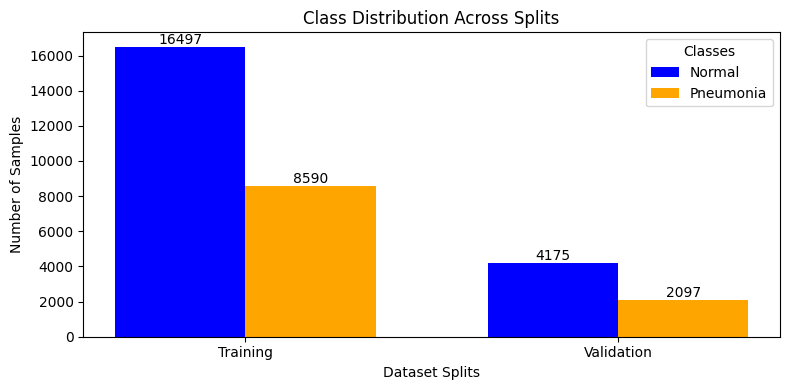

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
splits = ['Training', 'Validation']
classes = ['Normal', 'Pneumonia']
train_counts = [train_data['Target'].value_counts()[0], train_data['Target'].value_counts()[1]]
val_counts = [val_data['Target'].value_counts()[0], val_data['Target'].value_counts()[1]]

# Configurar as posições no eixo X
x = np.arange(len(splits))  # Posições para os splits (Training, Validation)
bar_width = 0.35  # Largura das barras

# Criar o gráfico de barras lado a lado
fig, ax = plt.subplots(figsize=(8, 4))
normal_bars = ax.bar(x - bar_width/2, [train_counts[0], val_counts[0]], bar_width, label='Normal', color='blue')
pneumonia_bars = ax.bar(x + bar_width/2, [train_counts[1], val_counts[1]], bar_width, label='Pneumonia', color='orange')

# Adicionar rótulos numéricos nas barras
for bar in normal_bars:
    ax.annotate(f"{bar.get_height():.0f}",
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom', fontsize=10)

for bar in pneumonia_bars:
    ax.annotate(f"{bar.get_height():.0f}",
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom', fontsize=10)

# Personalizar os eixos
ax.set_xlabel('Dataset Splits')
ax.set_ylabel('Number of Samples')
ax.set_title('Class Distribution Across Splits')
ax.set_xticks(x)
ax.set_xticklabels(splits)
ax.legend(title='Classes')

# Melhorar layout
plt.tight_layout()
plt.show()


In [18]:
import numpy as np
import pandas as pd

# Define o tamanho alvo para a classe minoritária (número total de amostras desejadas na classe minoritária após oversampling)
target_size_minority = 16497

# Separa os dados de treino em duas classes:
# train_class_0 -> Contém amostras da classe majoritária (Normal, Target = 0)
# train_class_1 -> Contém amostras da classe minoritária (Pneumonia, Target = 1)
train_class_0 = train_data[train_data['Target'] == 0]  # Classe majoritária
train_class_1 = train_data[train_data['Target'] == 1]  # Classe minoritária

# Calcula o número de replicações necessárias para cada imagem da classe minoritária:
# n_repeats -> Número inteiro de vezes que cada imagem será replicada para atingir o tamanho alvo.
# n_remainder -> Número restante de amostras necessárias após as replicações uniformes.
n_repeats = target_size_minority // len(train_class_1)  # Divisão inteira
n_remainder = target_size_minority % len(train_class_1)  # Restante das amostras

# Realiza replicações uniformes:
# Replica uniformemente cada imagem da classe minoritária n_repeats vezes.
oversampled_class_1 = pd.concat([train_class_1] * n_repeats, ignore_index=True)

# Adiciona o número restante de amostras (n_remainder) de forma aleatória e sem reposição.
oversampled_class_1 = pd.concat([
    oversampled_class_1,
    train_class_1.sample(n=n_remainder, replace=False, random_state=42)
], ignore_index=True)

# Combina as duas classes (majoritária e minoritária balanceada):
# Combina train_class_0 (classe majoritária) com oversampled_class_1 (classe minoritária balanceada).
# Embaralha os dados para garantir uma ordem aleatória.
balanced_train_data = pd.concat([train_class_0, oversampled_class_1])
balanced_train_data = balanced_train_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Exibe a nova distribuição das classes no conjunto de treino balanceado.
print("Distribuição do conjunto de treino após oversampling uniforme:")
print(balanced_train_data['Target'].value_counts())

Distribuição do conjunto de treino após oversampling uniforme:
Target
1    16497
0    16497
Name: count, dtype: int64


In [19]:
# Verificar o tamanho final das classes
print("Distribuição do conjunto de treino após oversampling uniforme:")
print(balanced_train_data['Target'].value_counts())

# Verificar duplicatas na classe minoritária
minority_data = balanced_train_data[balanced_train_data['Target'] == 1]

# Contar quantas vezes cada 'patientId' aparece
patient_id_counts = minority_data['patientId'].value_counts()

# Exibir os primeiros exemplos
print("\nOcorrências por patientId na classe minoritária (exemplo):")
print(patient_id_counts.head())

# Estatísticas das duplicatas
print("\nEstatísticas das duplicatas na classe minoritária:")
print(f"Máximo de duplicatas por patientId: {patient_id_counts.max()}")
print(f"Mínimo de duplicatas por patientId: {patient_id_counts.min()}")
print(f"Total de IDs duplicados: {sum(patient_id_counts > 1)}")

# Verificar se o número total de duplicatas faz sentido
print(f"\nTotal de amostras na classe minoritária: {len(minority_data)}")
print(f"Número único de patientIds na classe minoritária: {len(patient_id_counts)}")


Distribuição do conjunto de treino após oversampling uniforme:
Target
1    16497
0    16497
Name: count, dtype: int64

Ocorrências por patientId na classe minoritária (exemplo):
patientId
71a40b76-1525-460e-88e4-8ecdff621e5f    2
a8031125-1a13-40fd-9aeb-164e1a421f22    2
patient43546_study1_view1_frontal       2
patient38487_study1_view1_frontal       2
ade6a8d3-7d45-4e17-9784-5a04e6f16b76    2
Name: count, dtype: int64

Estatísticas das duplicatas na classe minoritária:
Máximo de duplicatas por patientId: 2
Mínimo de duplicatas por patientId: 1
Total de IDs duplicados: 7907

Total de amostras na classe minoritária: 16497
Número único de patientIds na classe minoritária: 8590


In [20]:
# Verificar duplicatas no conjunto balanceado
num_duplicates = balanced_train_data.duplicated(subset=['patientId']).sum()
print(f"Número de duplicatas no dataset balanceado: {num_duplicates}")

Número de duplicatas no dataset balanceado: 7907


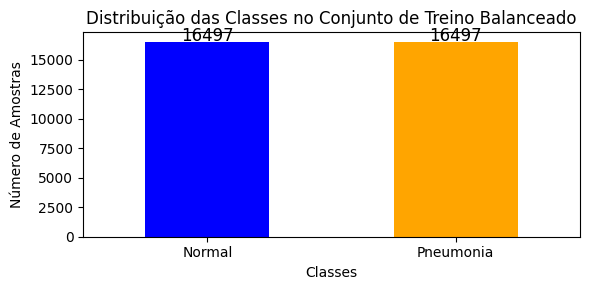

In [21]:
import matplotlib.pyplot as plt

# Criar um gráfico de barras para mostrar a distribuição das classes no conjunto balanceado
balanced_train_data['Target'].value_counts().plot(kind='bar', figsize=(6, 3), title='Distribuição das Classes no Conjunto de Treino Balanceado', color=['blue', 'orange'])

# Adicionar rótulos aos eixos
plt.xlabel('Classes')
plt.ylabel('Número de Amostras')
plt.xticks([0, 1], ['Normal', 'Pneumonia'], rotation=0)

# Adicionar valores numéricos acima das barras
for i, count in enumerate(balanced_train_data['Target'].value_counts()):
    plt.text(i, count + 100, str(count), ha='center', fontsize=12)

plt.tight_layout()
plt.show()



Frequência de duplicatas na classe minoritária (Pneumonia):
count
2    7907
1     683
Name: count, dtype: int64


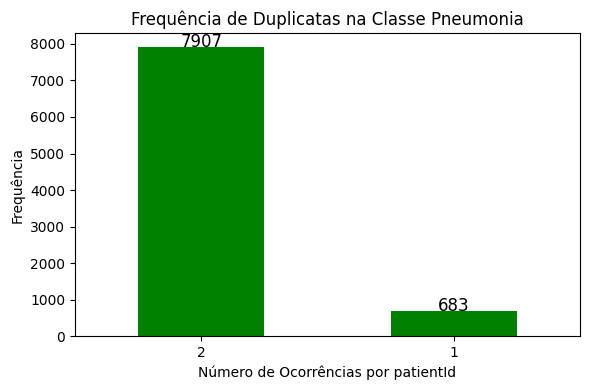

In [22]:
# Contar a frequência de duplicatas na classe minoritária
dup_counts = patient_id_counts.value_counts()

# Exibir as contagens
print("\nFrequência de duplicatas na classe minoritária (Pneumonia):")
print(dup_counts)

# Plotar um gráfico de barras para mostrar a frequência de duplicatas
dup_counts.plot(kind='bar', figsize=(6, 4), title='Frequência de Duplicatas na Classe Pneumonia', color='green')

# Adicionar rótulos aos eixos
plt.xlabel('Número de Ocorrências por patientId')
plt.ylabel('Frequência')
plt.xticks(rotation=0)

# Adicionar valores numéricos acima das barras
for i, count in enumerate(dup_counts):
    plt.text(i, count + 10, str(count), ha='center', fontsize=12)

plt.tight_layout()
plt.show()


In [23]:
import os

# Diretórios das classes
normal_dir = '/notebooks/RSNA_Pneumonia/Normal'
pneumonia_dir = '/notebooks/RSNA_Pneumonia/Pneumonia'

# Função para verificar se os arquivos das classes estão nas pastas corretas
def check_images_in_class_directory(data, class_dir, set_name, class_label):
    missing_files = []  # Lista para armazenar arquivos ausentes
    # Filtrar os dados da classe atual
    image_paths = data[data['Target'] == class_label]['patientId'].tolist()

    # Verificar se os arquivos existem
    for img in image_paths:
        img_filename = f"{img}.png"  # Adiciona a extensão .png ao nome do arquivo
        img_path = os.path.join(class_dir, img_filename)
        if not os.path.isfile(img_path):
            missing_files.append(img_filename)

    # Exibir resultados
    if missing_files:
        print(f"{len(missing_files)} arquivos ausentes na classe '{class_label}' do conjunto {set_name}.")
        print(f"Exemplos de arquivos ausentes: {missing_files[:5]}")
    else:
        print(f"Todos os arquivos da classe '{class_label}' no conjunto {set_name} estão presentes.")

# Verificar as imagens para o conjunto de treino
print("Verificando o conjunto de treino:")
check_images_in_class_directory(train_data, normal_dir, 'Training', 0)  # Classe Normal (Target = 0)
check_images_in_class_directory(train_data, pneumonia_dir, 'Training', 1)  # Classe Pneumonia (Target = 1)

# Verificar as imagens para o conjunto de validação
print("\nVerificando o conjunto de validação:")
check_images_in_class_directory(val_data, normal_dir, 'Validation', 0)  # Classe Normal (Target = 0)
check_images_in_class_directory(val_data, pneumonia_dir, 'Validation', 1)  # Classe Pneumonia (Target = 1)


Verificando o conjunto de treino:
Todos os arquivos da classe '0' no conjunto Training estão presentes.
Todos os arquivos da classe '1' no conjunto Training estão presentes.

Verificando o conjunto de validação:
Todos os arquivos da classe '0' no conjunto Validation estão presentes.
Todos os arquivos da classe '1' no conjunto Validation estão presentes.


In [24]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

# --- Função para processar os rótulos ---
def process_labels(data, name, one_hot=True):
    """
    Processa rótulos para treino ou validação e verifica alinhamento.

    Parameters:
        data (DataFrame): DataFrame contendo a coluna 'Target'.
        name (str): Nome do conjunto ('Treino' ou 'Validação').
        one_hot (bool): Se True, transforma para One-Hot Encoding.

    Returns:
        tf.Tensor: Rótulos processados (One-Hot ou binário).
    """
    if one_hot:
        # Converter para One-Hot Encoding
        y_data = to_categorical(data['Target'], num_classes=2)
    else:
        # Usar formato binário (0 ou 1)
        y_data = data['Target'].values

    # Converter para tensores compatíveis com TensorFlow
    y_data = tf.cast(y_data, tf.float32)
    
    # Verificar alinhamento
    assert len(data) == len(y_data), f"Misalignment still exists between {name} data and labels"
    
    # Exibir informações
    print(f"Forma de y_{name.lower()}: {y_data.shape}, Valores únicos: {np.unique(data['Target'].values)}")
    print(f"Labels estão alinhados com os dados de {name.lower()}.\n")
    
    return y_data


one_hot_encoding = True  # Ajuste para True se desejar One-Hot Encoding(softmax), False se desejar binario(sigmoid)

# Processar rótulos para treino e validação
y_train = process_labels(balanced_train_data, name="Treino", one_hot=one_hot_encoding)
y_val = process_labels(val_data, name="Validação", one_hot=one_hot_encoding)


Forma de y_treino: (32994, 2), Valores únicos: [0 1]
Labels estão alinhados com os dados de treino.

Forma de y_validação: (6272, 2), Valores únicos: [0 1]
Labels estão alinhados com os dados de validação.



In [25]:
# Verifica o formato dos rotulos gerados
print("Formato de y_train (binário(30497,)/softmax(30497,2)):", y_train.shape)  # Deve ser (n_samples,)
print("Exemplo de valores:", y_train[:5])  # Algo como [0, 1, 1, 0, 0]

Formato de y_train (binário(30497,)/softmax(30497,2)): (32994, 2)
Exemplo de valores: tf.Tensor(
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]], shape=(5, 2), dtype=float32)


In [26]:
print(f"Tamanho do DataFrame balanced_train_data: {len(balanced_train_data)}")
print(f"Tamanho do array de rótulos y_train: {len(y_train)}")

Tamanho do DataFrame balanced_train_data: 32994
Tamanho do array de rótulos y_train: 32994


Exibindo amostras da classe Normal:


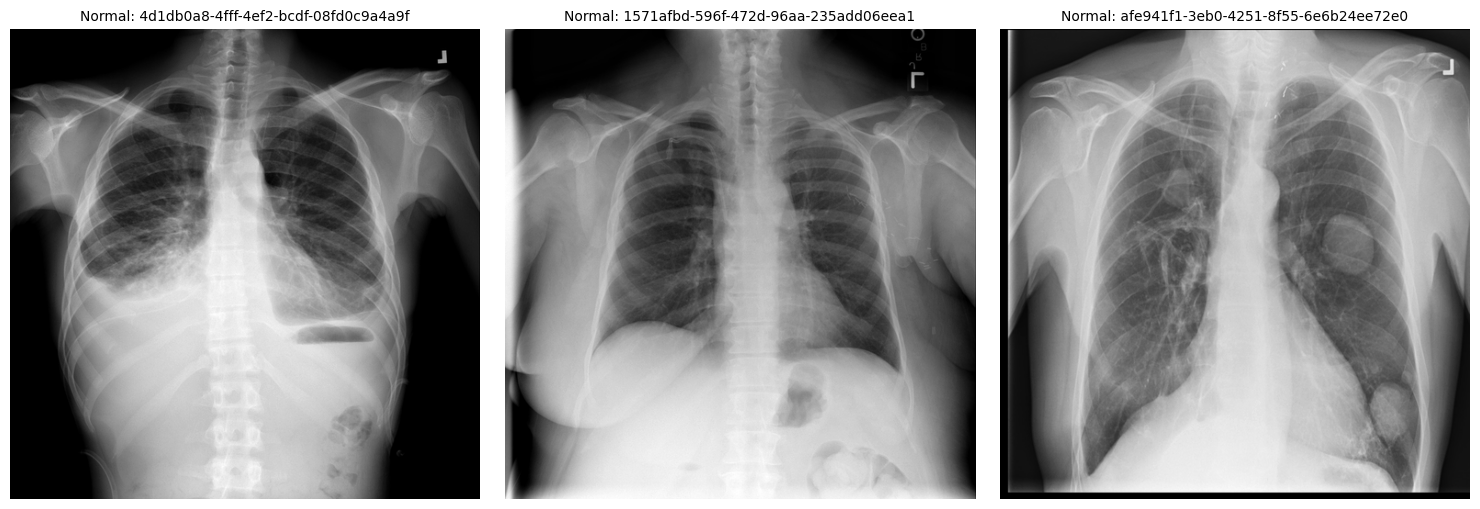

Exibindo amostras da classe Pneumonia:


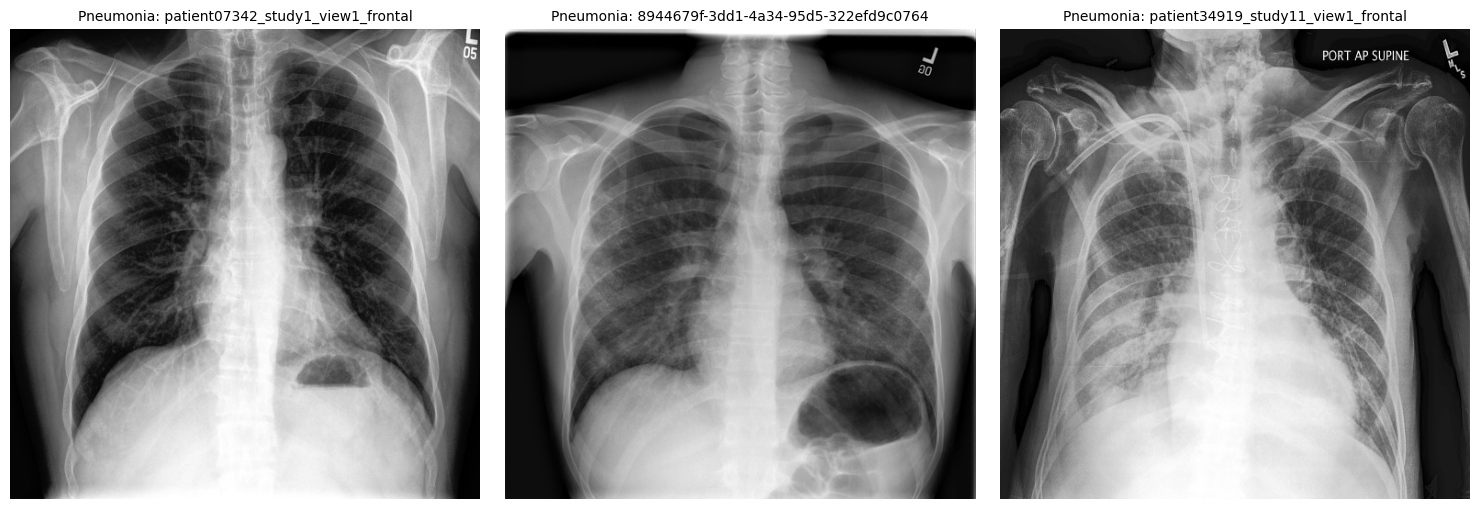

In [27]:
import random
import matplotlib.pyplot as plt
import cv2
import os

# Diretórios das imagens
#normal_dir = "/notebooks/RSNA_Pneumonia/Normal"
#pneumonia_dir = "/notebooks/RSNA_Pneumonia/Pneumonia"

# Função para mostrar imagens lado a lado
def show_images_with_labels(image_paths, class_name):
    plt.figure(figsize=(15, 5))  # Tamanho da figura
    for i, image_path in enumerate(image_paths):
        if os.path.isfile(image_path):  # Verificar se o arquivo existe
            # Ler a imagem em escala de cinza
            img = cv2.imread(image_path, 0)
            img_id = os.path.splitext(os.path.basename(image_path))[0]  # Extrair ID da imagem
            plt.subplot(1, len(image_paths), i + 1)  # Configurar o subplot
            plt.imshow(img, cmap='gray')  # Exibir a imagem
            plt.title(f"{class_name}: {img_id}", fontsize=10)  # Mostrar classe e ID
            plt.axis('off')  # Remover os eixos
        else:
            print(f"Imagem {image_path} não encontrada.")  # Arquivo ausente
    plt.tight_layout()  # Ajustar os espaçamentos entre os subplots
    plt.show()

# Selecionar amostras aleatórias
num_samples = 3  # Número de imagens para exibir
random_normal = random.sample(os.listdir(normal_dir), min(num_samples, len(os.listdir(normal_dir))))
random_pneumonia = random.sample(os.listdir(pneumonia_dir), min(num_samples, len(os.listdir(pneumonia_dir))))

# Adicionar o caminho completo às imagens selecionadas
normal_images = [os.path.join(normal_dir, img) for img in random_normal]
pneumonia_images = [os.path.join(pneumonia_dir, img) for img in random_pneumonia]

# Exibir imagens da classe Normal
print("Exibindo amostras da classe Normal:")
show_images_with_labels(normal_images, "Normal")

# Exibir imagens da classe Pneumonia
print("Exibindo amostras da classe Pneumonia:")
show_images_with_labels(pneumonia_images, "Pneumonia")


In [28]:
import os
import pandas as pd

# Diretórios das imagens
normal_dir = "/notebooks/RSNA_Pneumonia/Normal"
pneumonia_dir = "/notebooks/RSNA_Pneumonia/Pneumonia"

# Função para criar os caminhos das imagens
def create_image_paths(dataframe, normal_dir, pneumonia_dir):
    """
    Retorna uma lista de caminhos completos das imagens, baseada na classe (Normal ou Pneumonia).
    """
    return dataframe.apply(lambda row: 
        os.path.join(normal_dir, f"{row['patientId']}.png") if row['Target'] == 0 
        else os.path.join(pneumonia_dir, f"{row['patientId']}.png"), axis=1).tolist()

# Carregar os datasets (certifique-se de que esses DataFrames já estão carregados)
# balanced_train_data e val_data devem estar definidos antes de rodar este script.

# Gerar caminhos das imagens para treino e validação
train_image_paths = create_image_paths(balanced_train_data, normal_dir, pneumonia_dir)
val_image_paths = create_image_paths(val_data, normal_dir, pneumonia_dir)

# Exibir número de imagens em cada conjunto
print(f"Número de imagens no conjunto de treino: {len(train_image_paths)}")
print(f"Número de imagens no conjunto de validação: {len(val_image_paths)}")

# Exibir algumas amostras para verificação
print("\nExemplo de caminhos de imagem (treino):")
print(train_image_paths[:5])

print("\nExemplo de caminhos de imagem (validação):")
print(val_image_paths[:5])


Número de imagens no conjunto de treino: 32994
Número de imagens no conjunto de validação: 6272

Exemplo de caminhos de imagem (treino):
['/notebooks/RSNA_Pneumonia/Pneumonia/71a40b76-1525-460e-88e4-8ecdff621e5f.png', '/notebooks/RSNA_Pneumonia/Pneumonia/8d76ff2c-da0c-49dd-95cd-21d753f0495d.png', '/notebooks/RSNA_Pneumonia/Pneumonia/013c7df0-d66d-4cb1-b3bc-a70085160311.png', '/notebooks/RSNA_Pneumonia/Pneumonia/5dd4d7bf-e9d6-4660-aa90-c405ac7dc453.png', '/notebooks/RSNA_Pneumonia/Pneumonia/b54c5581-bb40-4c19-9d5a-3be944ef8132.png']

Exemplo de caminhos de imagem (validação):
['/notebooks/RSNA_Pneumonia/Pneumonia/001916b8-3d30-4935-a5d1-8eaddb1646cd.png', '/notebooks/RSNA_Pneumonia/Normal/0049f7b2-229b-4a46-91a3-0e321a3ca80a.png', '/notebooks/RSNA_Pneumonia/Normal/00a85be6-6eb0-421d-8acf-ff2dc0007e8a.png', '/notebooks/RSNA_Pneumonia/Pneumonia/00aecb01-a116-45a2-956c-08d2fa55433f.png', '/notebooks/RSNA_Pneumonia/Pneumonia/00c0b293-48e7-4e16-ac76-9269ba535a62.png']


In [29]:
#!pip install tensorflow-hub

In [30]:
import tensorflow as tf
import tensorflow_hub as hub

# =========================================================
# 1️⃣ Configurações Básicas
# =========================================================
IMAGE_SIZE = (224, 224) # 📌
BATCH_SIZE = 16

def load_image(img_path, label):
    """
    Lê e processa uma imagem PNG em grayscale, converte para RGB e redimensiona para (224, 224).
    """
    # Ler e decodificar a imagem
    img = tf.io.read_file(img_path)
    img = tf.image.decode_png(img, channels=1)  # grayscale

    # Redimensionar para 224x224
    img = tf.image.resize(img, IMAGE_SIZE)

    # Converter para RGB
    img = tf.image.grayscale_to_rgb(img)

    # 🔹 Alterar normalização para [0,1] (em vez de [-1,1])
    img = img / 255.0  # 🚀 ViT espera imagens normalizadas assim!
    
    # Normalizar para o intervalo [-1, 1]
    #img = (img / 127.5) - 1.0  # 🔹 Normaliza para [-1,1]

    return img, label


In [31]:
def tf_rotate_alternative(image, angle_deg):
    """
    Aplica rotação arbitrária à imagem sem distorcer patches.
    """

    angle_rad = angle_deg * (tf.constant(3.14159265359) / 180.0)

    # Criar matriz de transformação
    rotation_matrix = tf.stack([
        tf.cos(angle_rad), -tf.sin(angle_rad), 0.0,
        tf.sin(angle_rad),  tf.cos(angle_rad), 0.0,
        0.0,               0.0,               1.0
    ])
    
    transforms = tf.reshape(rotation_matrix[:8], [1, 8])

    # 🔹 Definir `output_shape` como um tensor estático
    output_shape = IMAGE_SIZE  # Certifica que o tamanho é fixo

    # Aplicar rotação
    rotated_image = tf.raw_ops.ImageProjectiveTransformV3(
        images=tf.expand_dims(image, 0),
        transforms=transforms,
        output_shape=output_shape,  # 🔹 Agora é um tensor estático
        interpolation="BILINEAR",
        fill_mode="NEAREST",
        fill_value=0.5
    )

    return tf.squeeze(rotated_image, axis=0)

In [32]:
def random_pad(image, max_pad=15, target_size=IMAGE_SIZE, fill_value=0.5):
    """
    Aplica padding aleatório, mantendo a coerência dos patches do ViT.

    Parâmetros:
    - image: Tensor da imagem (224, 224, 3) normalizada.
    - max_pad: Valor máximo de padding (ex.: 15 pixels).
    - target_size: Tamanho final da imagem após redimensionamento (224, 224).
    - fill_value: Valor para preenchimento (0.5 é cinza neutro).

    Retorna:
    - Imagem com padding aplicado.
    """
    # Definir um padding aleatório entre 0 e max_pad
    pad = tf.random.uniform([], minval=0, maxval=max_pad, dtype=tf.int32)
    
    # Aplicar padding simétrico na altura e largura
    image = tf.pad(image, [[pad, pad], [pad, pad], [0, 0]], mode="CONSTANT", constant_values=fill_value)

    # Redimensionar para o tamanho original mantendo a estrutura dos patches
    image = tf.image.resize(image, target_size, method="bilinear") 

    return image


In [33]:
import tensorflow as tf

def adjust_sharpness(image, factor=1.0):
    """
    Ajusta a nitidez da imagem usando um filtro de convolução.
    
    Parâmetros:
    - image: Tensor da imagem (H, W, 3).
    - factor: Intensidade do ajuste (1.0 = original, >1.0 = mais nítido, <1.0 = mais suave).
    
    Retorna:
    - Imagem ajustada.
    """
    # Kernel para nitidez
    kernel = tf.constant([
        [-1, -1, -1],
        [-1,  9, -1],
        [-1, -1, -1]
    ], dtype=tf.float32)

    # Adaptar o kernel para 3 canais (R, G, B)
    kernel = tf.expand_dims(kernel, axis=-1)  # Adicionar dimensão para input channels
    kernel = tf.tile(kernel, [1, 1, 3])      # Replicar para 3 canais
    kernel = tf.expand_dims(kernel, axis=-1) # Adicionar dimensão para output channels

    # Aplicar convolução
    sharp_image = tf.nn.depthwise_conv2d(
        input=tf.expand_dims(image, axis=0),  # Adicionar dimensão do batch
        filter=kernel,
        strides=[1, 1, 1, 1],
        padding="SAME"
    )
    sharp_image = tf.squeeze(sharp_image, axis=0)  # Remover dimensão do batch

    # Misturar a imagem original com a imagem nítida
    image = factor * sharp_image + (1.0 - factor) * image
    image = tf.clip_by_value(image, 0.0, 1.0)  # Garantir valores no intervalo [0, 1]

    return image


In [34]:
import tensorflow as tf

def random_augment(image, label):
    """
    Aplica Data Augmentation SOMENTE para a classe Pneumonia (label one-hot [0.0, 1.0]).
    """

    # 🔹 Certifica-se de que label seja um tensor de formato [0.0, 1.0] ou [1.0, 0.0]
    label = tf.convert_to_tensor(label, dtype=tf.float32)

    def augment():
        # 🔹 Rotação aleatória
        angle_deg = tf.random.uniform([], minval=-5, maxval=5, dtype=tf.float32)
        image_aug = tf_rotate_alternative(image, angle_deg)

        # 🔹 Ajuste de brilho e contraste
        image_aug = tf.image.random_brightness(image_aug, max_delta=0.1)
        image_aug = tf.image.random_contrast(image_aug, lower=0.9, upper=1.1)

        # 🔹 Zoom aleatório
        zoom_scale = tf.random.uniform([], minval=0.98, maxval=1.02)
        height, width = IMAGE_SIZE
        new_height = tf.cast(zoom_scale * tf.cast(height, tf.float32), tf.int32)
        new_width = tf.cast(zoom_scale * tf.cast(width, tf.float32), tf.int32)

        # Redimensiona e corta para manter tamanho fixo
        image_aug = tf.image.resize(image_aug, [new_height, new_width], method="nearest")
        image_aug = tf.image.resize_with_crop_or_pad(image_aug, height, width)

        # 🔹 Padding aleatório
        pad = tf.random.uniform([], minval=0, maxval=5, dtype=tf.int32)
        image_aug = tf.pad(image_aug, [[pad, pad], [pad, pad], [0, 0]], mode="CONSTANT", constant_values=0.5)
        image_aug = tf.image.resize(image_aug, IMAGE_SIZE, method="bilinear")

        # 🔹 Garante que os valores fiquem entre 0 e 1
        image_aug = tf.clip_by_value(image_aug, 0.0, 1.0)

        return image_aug, label  # Retorna a imagem aumentada

    # 🔹 Verifica se a classe é Pneumonia (label one-hot [0, 1])
    #is_pneumonia = tf.equal(tf.argmax(label), 1)

    # 🔹 Aplica augmentation apenas para Pneumonia
    #image, label = tf.cond(
    #    is_pneumonia,
    #    augment,  # Aplica augmentation
    #    lambda: (image, label)  # Mantém a imagem original
    #)

    return image, label


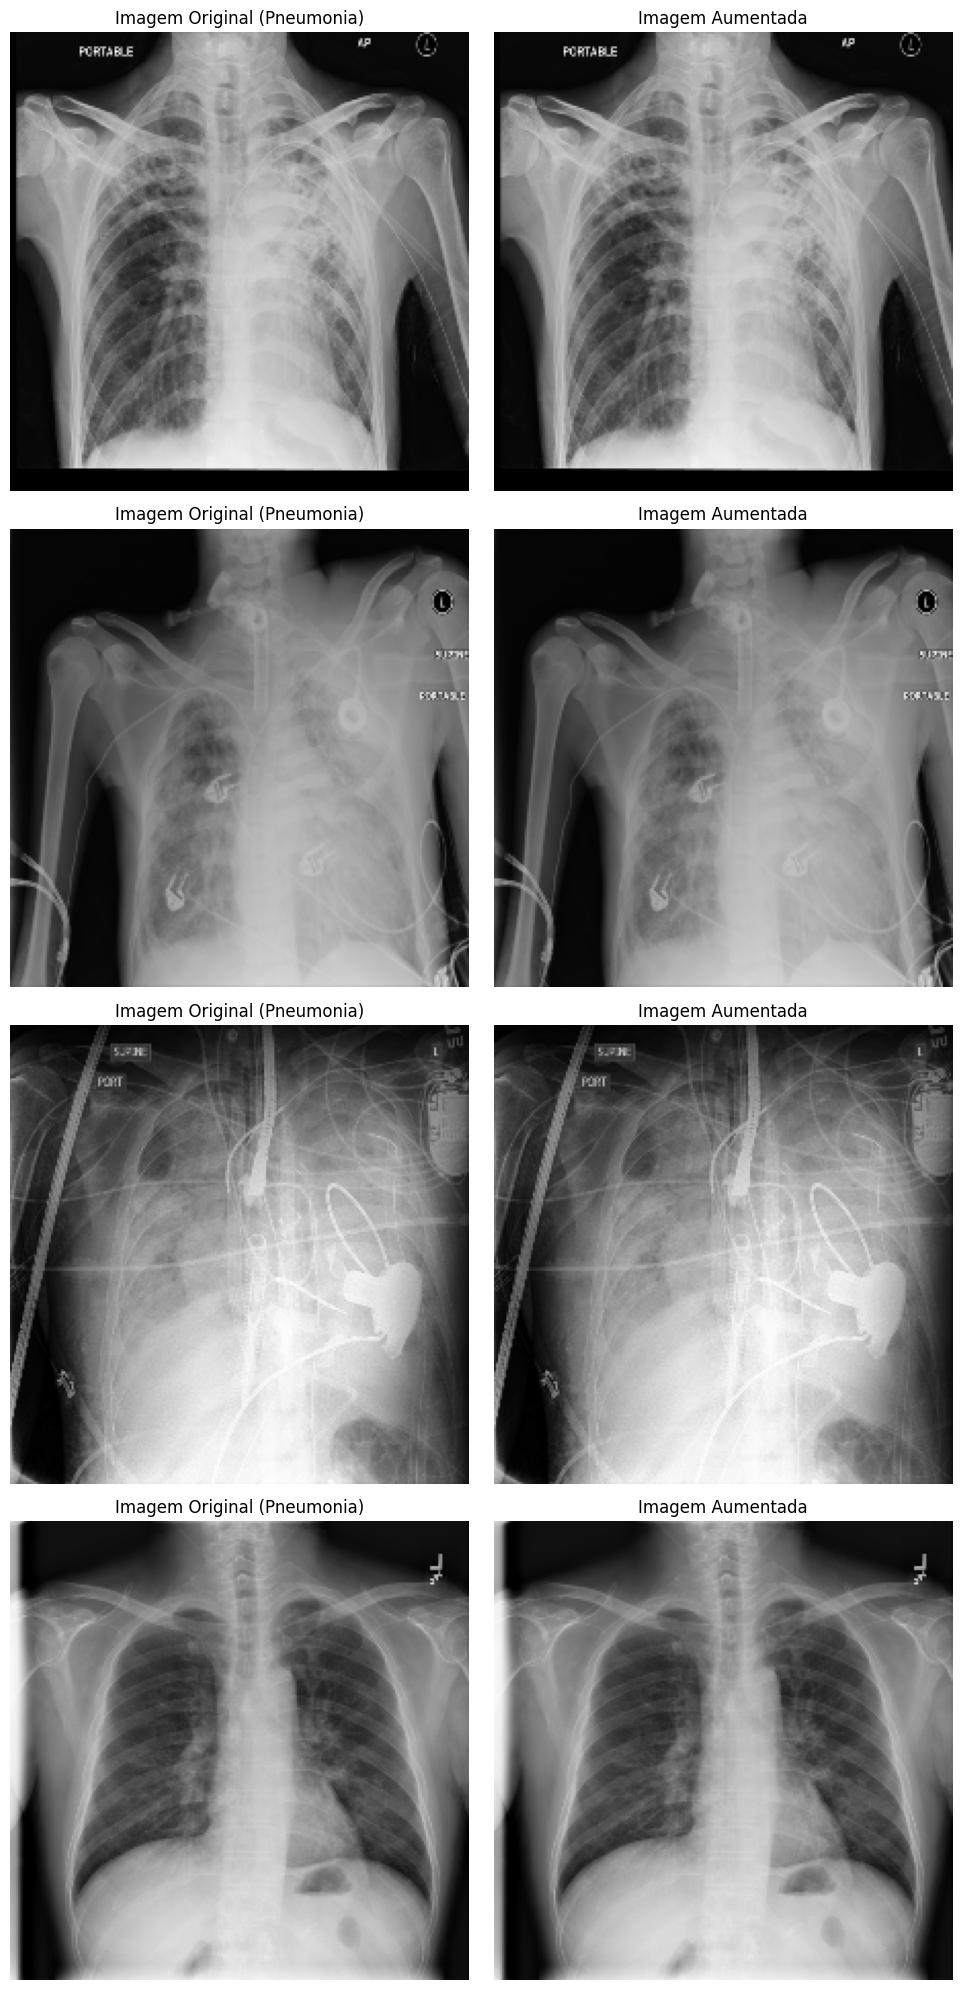

In [35]:
import matplotlib.pyplot as plt
import random
import glob
import tensorflow as tf

# 🔹 Caminhos das imagens
normal_images = glob.glob("/notebooks/RSNA_Pneumonia/Normal/*.png")
pneumonia_images = glob.glob("/notebooks/RSNA_Pneumonia/Pneumonia/*.png")

# 🔹 Selecionar imagens aleatórias
num_samples = 5  # Número de imagens para visualizar
test_image_paths = random.sample(normal_images, num_samples // 2) + random.sample(pneumonia_images, num_samples // 2)
random.shuffle(test_image_paths)  # Embaralha para não ficar sempre primeiro Normal ou Pneumonia

# 🔹 Função para carregar e processar imagens
def load_and_augment(img_path):
    """
    Carrega uma imagem do disco, aplica pré-processamento e augmentação.
    """
    # Verifica a classe da imagem pelo caminho do arquivo
    is_pneumonia = "Pneumonia" in img_path

    # Define o rótulo correto (one-hot encoding)
    label = tf.constant([0.0, 1.0], dtype=tf.float32) if is_pneumonia else tf.constant([1.0, 0.0], dtype=tf.float32)

    # Carregar a imagem original
    image, _ = load_image(img_path, label)

    # Aplicar augmentação apenas para Pneumonia
    augmented_image, _ = random_augment(image, label) if is_pneumonia else (image, label)

    return image, augmented_image, is_pneumonia

# 🔹 Criar visualização
plt.figure(figsize=(10, 5 * len(test_image_paths)))

for i, img_path in enumerate(test_image_paths):
    # Carregar imagem original e aumentada
    original, augmented, is_pneumonia = load_and_augment(img_path)

    # 🔹 Converte para numpy para exibição
    original_np = original.numpy()  # ✅ Mantém no intervalo [0,1]
    augmented_np = augmented.numpy()  # ✅ Mantém no intervalo [0,1]

    # 🔹 Imagem Original
    plt.subplot(len(test_image_paths), 2, 2 * i + 1)
    plt.title("Imagem Original (Pneumonia)" if is_pneumonia else "Imagem Original (Normal)")
    plt.imshow(original_np)
    plt.axis("off")

    # 🔹 Imagem Aumentada (se for Pneumonia)
    plt.subplot(len(test_image_paths), 2, 2 * i + 2)
    plt.title("Imagem Aumentada" if is_pneumonia else "Imagem Sem Augmentação")
    plt.imshow(augmented_np)
    plt.axis("off")

plt.tight_layout()
plt.show()


# Em vez de usar um único dataset com shuffle(), 
#criamos dois datasets separados (um para cada classe) e 
#combinamos com tf.data.experimental.sample_from_datasets().

import tensorflow as tf

def create_tf_dataset_balanced(image_paths, labels, batch_size=32, augment=False, shuffle=False):
    """
    Cria um dataset tf.data balanceado entre classes usando sample_from_datasets.
    """
    # Criar dataset completo
    ds = tf.data.Dataset.from_tensor_slices((image_paths, labels))

    # Separar imagens por classe
    ds_class_0 = ds.filter(lambda x, y: tf.equal(y[0], 1))  # Classe 0
    ds_class_1 = ds.filter(lambda x, y: tf.equal(y[1], 1))  # Classe 1

    # Aplicar carregamento e augmentação em cada dataset
    def process_dataset(ds):
        ds = ds.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
        ds = ds.map(lambda img, lbl: (tf.clip_by_value(img, -1.0, 1.0), lbl), num_parallel_calls=tf.data.AUTOTUNE)
        if augment:
            ds = ds.map(random_augment, num_parallel_calls=tf.data.AUTOTUNE)
        return ds

    ds_class_0 = process_dataset(ds_class_0)
    ds_class_1 = process_dataset(ds_class_1)

    # Misturar as duas classes com proporção 50% - 50%
    ds = tf.data.experimental.sample_from_datasets([ds_class_0, ds_class_1], weights=[0.5, 0.5])

    # Shuffle (opcional)
    if shuffle:
        ds = ds.shuffle(buffer_size=1000, reshuffle_each_iteration=True)

    # Batching e prefetch
    ds = ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)

    return ds

# 📌 Criar datasets balanceados
train_dataset = create_tf_dataset_balanced(
    train_image_paths, y_train, batch_size=BATCH_SIZE, augment=True, shuffle=True
)
val_dataset = create_tf_dataset_balanced(
    val_image_paths, y_val, batch_size=BATCH_SIZE, augment=False, shuffle=False
)

# 📌 Testar um batch do dataset
sample_batch = next(iter(train_dataset.take(1)))
sample_images, sample_labels = sample_batch

print(f"Tamanho do batch carregado: {sample_images.shape}")
print(f"Formato dos labels: {sample_labels.shape}")
print(f"Primeiros labels:\n{sample_labels[:5]}")


In [36]:
import tensorflow as tf

# =========================================================
# 5️⃣ Criação do create_tf_dataset Final (Adaptado)
# =========================================================
def create_tf_dataset(image_paths, labels, batch_size=16, augment=False, shuffle=False):
    """
    Cria um dataset tf.data com:
    - Leitura das imagens
    - Augmentation opcional
    - Normalização correta para ViT
    """
    ds = tf.data.Dataset.from_tensor_slices((image_paths, tf.cast(labels, tf.float32)))
    ds = ds.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)

    if shuffle:
        ds = ds.shuffle(buffer_size=3000, reshuffle_each_iteration=True)

    if augment:
        ds = ds.map(random_augment, num_parallel_calls=tf.data.AUTOTUNE)

    ds = ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return ds

# 📌 Criar datasets 📌
train_dataset = create_tf_dataset(
    train_image_paths, y_train, batch_size=BATCH_SIZE, augment=True, shuffle=True
)
val_dataset = create_tf_dataset(
    val_image_paths, y_val, batch_size=BATCH_SIZE, augment=False, shuffle=False
)

# 📌 Testar um batch do dataset 📌
sample_batch = next(iter(train_dataset.take(1)))  # Apenas 1 batch
sample_images, sample_labels = sample_batch

print(f"Tamanho do batch carregado: {sample_images.shape}")
print(f"Formato dos labels: {sample_labels.shape}")
print(f"Primeiros labels:\n{sample_labels[:5]}")


Tamanho do batch carregado: (16, 224, 224, 3)
Formato dos labels: (16, 2)
Primeiros labels:
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [37]:
#Teste: Performance do tf.data
import time

# Medir tempo de carregamento de um batch
start_time = time.time()
for batch in train_dataset.take(10):  # Testar 10 batches
    pass
end_time = time.time()

print(f"Tempo para carregar 10 batches: {end_time - start_time:.2f} segundos")

Tempo para carregar 10 batches: 2.98 segundos


In [38]:
# 📌 Verificar tamanho dos conjuntos
print("Número total de imagens no treino:", len(train_image_paths))
print("Número total de labels no treino:", len(y_train))
print("Número total de imagens na validação:", len(val_image_paths))
print("Número total de labels na validação:", len(y_val))

# 📌 Exibir alguns exemplos para validar alinhamento
print("\n🔍 Primeiros 5 caminhos de imagem no treino:")
for path in train_image_paths[:5]:
    print(path)

print("\n🔍 Primeiros 5 labels no treino:")
for label in y_train[:5]:
    print(label)


Número total de imagens no treino: 32994
Número total de labels no treino: 32994
Número total de imagens na validação: 6272
Número total de labels na validação: 6272

🔍 Primeiros 5 caminhos de imagem no treino:
/notebooks/RSNA_Pneumonia/Pneumonia/71a40b76-1525-460e-88e4-8ecdff621e5f.png
/notebooks/RSNA_Pneumonia/Pneumonia/8d76ff2c-da0c-49dd-95cd-21d753f0495d.png
/notebooks/RSNA_Pneumonia/Pneumonia/013c7df0-d66d-4cb1-b3bc-a70085160311.png
/notebooks/RSNA_Pneumonia/Pneumonia/5dd4d7bf-e9d6-4660-aa90-c405ac7dc453.png
/notebooks/RSNA_Pneumonia/Pneumonia/b54c5581-bb40-4c19-9d5a-3be944ef8132.png

🔍 Primeiros 5 labels no treino:
tf.Tensor([0. 1.], shape=(2,), dtype=float32)
tf.Tensor([0. 1.], shape=(2,), dtype=float32)
tf.Tensor([0. 1.], shape=(2,), dtype=float32)
tf.Tensor([0. 1.], shape=(2,), dtype=float32)
tf.Tensor([0. 1.], shape=(2,), dtype=float32)


In [39]:
# 📌 Criar dataset sem augmentation
train_dataset_no_aug = create_tf_dataset(
    train_image_paths, y_train, batch_size=1, augment=False, shuffle=False
)

# 📌 Carregar apenas uma imagem para teste
sample_batch = next(iter(train_dataset_no_aug.take(1)))
sample_image, sample_label = sample_batch

# 📌 Testar a augmentação manualmente
try:
    augmented_image, _ = random_augment(sample_image[0], sample_label[0])  # Aplicando augmentação
    print("✅ Augmentação aplicada com sucesso! Shape da imagem augmentada:", augmented_image.shape)
except Exception as e:
    print("❌ Erro ao aplicar augmentação:", e)


✅ Augmentação aplicada com sucesso! Shape da imagem augmentada: (224, 224, 3)


Debug - Valores de pixel após normalização inversa:
Min: 0, Max: 254


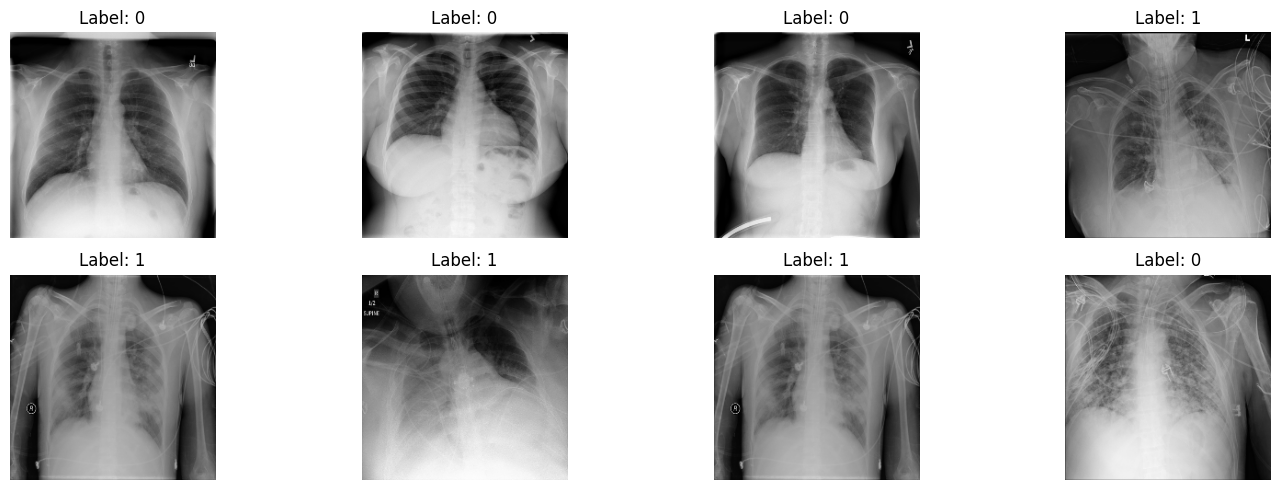

Quantidade de imagens exibidas: 8
Labels correspondentes: [0 0 0 1 1 1 1 0]


In [40]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# 🔥 Número de imagens a exibir
num_images = 8  

# 🔹 Criar um dataset de amostras aleatórias do conjunto de treino
sample_dataset = (
    create_tf_dataset(train_image_paths, y_train, batch_size=num_images, augment=False, shuffle=True)
)

# 🔹 Carregar um batch do dataset
sample_batch = next(iter(sample_dataset.take(1)))
sample_images, sample_labels = sample_batch

# 🔹 Converter para NumPy para visualização
sample_images_np = sample_images.numpy()  # Agora valores estão em [0, 1]
sample_labels_np = np.argmax(sample_labels.numpy(), axis=1)  # One-hot → Label 0 ou 1

# 🔹 Ajustar os valores de volta para [0, 255] corretamente
sample_images_np = (sample_images_np * 255).astype(np.uint8)  # ✅ Correção para normalização [0,1]

# 🔹 Debug: Verificar os valores
print("Debug - Valores de pixel após normalização inversa:")
print(f"Min: {sample_images_np.min()}, Max: {sample_images_np.max()}")  # Deve ser 0 a 255

# 🔹 Criar a figura para plotagem
plt.figure(figsize=(15, 5))

for i in range(num_images):
    plt.subplot(2, 4, i+1)  # 2 linhas, 4 colunas
    plt.imshow(sample_images_np[i])  # Exibe no intervalo correto [0, 255]
    plt.title(f"Label: {sample_labels_np[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

# 🔹 Exibir informações das imagens
print(f"Quantidade de imagens exibidas: {num_images}")
print("Labels correspondentes:", sample_labels_np)


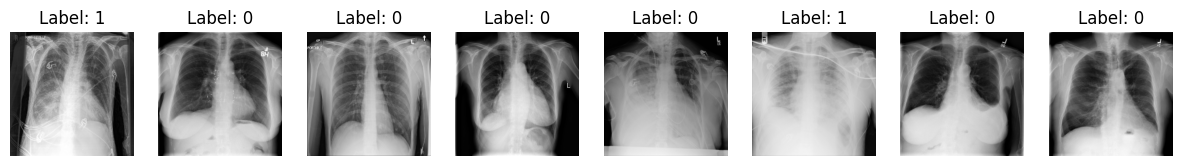

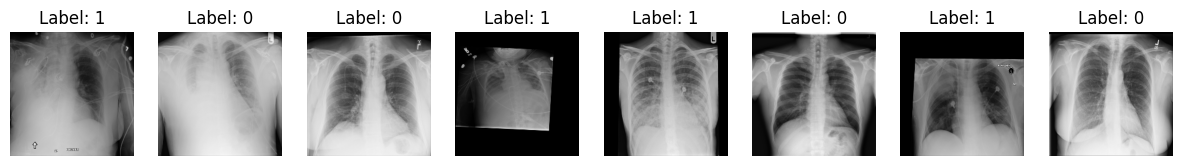

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# =============================================================================
# 🔍 Função otimizada para visualizar imagens do dataset
# =============================================================================
def visualize_dataset(dataset, num_images=5):
    """
    Exibe imagens do dataset.
    - Ajusta formato automaticamente (caso precise de transposição).
    - Converte rótulos de One-Hot para valores numéricos.
    - Corrige o intervalo para exibição apropriada.
    """
    for images, labels in dataset.take(1):
        images_np = images.numpy()
        labels_np = labels.numpy()
        
        num_images = min(num_images, images_np.shape[0])  # Evita erro se batch < num_images

        plt.figure(figsize=(15, 5))  # 🔹 Ajusta o tamanho da figura

        for i in range(num_images):
            plt.subplot(1, num_images, i + 1)

            img = images_np[i]

            # 🔹 Ajustar valores para o intervalo [0, 1] se necessário
            if img.min() < 0:  # Se estiver em [-1, 1], converte para [0,1]
                img = (img + 1) / 2.0  
            elif img.max() > 1:  # Se estiver em [0, 255], converte para [0,1]
                img = img / 255.0  

            # 🔹 Se a imagem estiver no formato (3, 224, 224), transpor para (224, 224, 3)
            if img.shape[0] == 3:
                img = np.transpose(img, (1, 2, 0))

            plt.imshow(img)

            # 🔹 Converter label de One-Hot para numérico
            label_class = np.argmax(labels_np[i]) if labels_np.shape[-1] > 1 else labels_np[i]
            plt.title(f"Label: {label_class}")
            plt.axis('off')

        plt.show()
        break  # Apenas um batch

# 📌 Visualizar imagens do conjunto de treino e validação
visualize_dataset(train_dataset, num_images=8)  # Aumentamos para 8 imagens
visualize_dataset(val_dataset, num_images=8)


In [42]:
# ============================================================
# 2️⃣ (Opcional): Debug do pipeline
# ============================================================

def debug_print_range(msg):
    """
    Função de debug que imprime os valores mínimo e máximo das imagens no pipeline.
    """
    def _inner_debug_fn(image, label):
        tf.print(f"{msg} -> min:", tf.reduce_min(image), "max:", tf.reduce_max(image))
        return image, label
    return _inner_debug_fn

# Criar um dataset para debug (5 imagens aleatórias do conjunto de treino)
debug_dataset = create_tf_dataset(train_image_paths[:5], y_train[:5], batch_size=2, augment=True, shuffle=True)

# Aplicar debug após carregamento e após augmentação
debug_dataset = debug_dataset.map(debug_print_range("🔍 Depois de load_image"), num_parallel_calls=tf.data.AUTOTUNE)
debug_dataset = debug_dataset.map(debug_print_range("🔍 Depois de random_augment"), num_parallel_calls=tf.data.AUTOTUNE)

# Executar um batch para verificar
for batch_images, batch_labels in debug_dataset.take(1):
    pass  # Apenas para ativar as prints


🔍 Depois de load_image -> min: 0 max: 0.99663949
🔍 Depois de load_image -> min: 0 max: 0.937815487
🔍 Depois de random_augment -> min: 0 max: 0.99663949
🔍 Depois de load_image -> min: 0 max: 0.987255454
🔍 Depois de random_augment -> min: 0 max: 0.937815487
🔍 Depois de random_augment -> min: 0 max: 0.987255454


In [43]:
# 📌 Verificar o formato dos batches do dataset de treino
for x_batch, y_batch in train_dataset.take(1):
    print(f"🔍 Shape das imagens: {x_batch.shape}")
    print(f"🔍 Shape dos rótulos: {y_batch.shape}")
    print(f"🔍 Tipo das imagens: {x_batch.dtype}")
    print(f"🔍 Tipo dos rótulos: {y_batch.dtype}")

🔍 Shape das imagens: (16, 224, 224, 3)
🔍 Shape dos rótulos: (16, 2)
🔍 Tipo das imagens: <dtype: 'float32'>
🔍 Tipo dos rótulos: <dtype: 'float32'>


In [44]:
# 📌 Definir os nomes das classes no problema atual
target_classes = ['Normal', 'Pneumonia']

# 🔹 Criar mapeamento Nome → Índice
class_indices = {class_name: idx for idx, class_name in enumerate(target_classes)}

# 🔹 Criar mapeamento Índice → Nome (para decodificar previsões depois)
index_to_class = {idx: class_name for class_name, idx in class_indices.items()}

# 📌 Exibir os mapeamentos
print("✅ Mapeamento de índices das classes:", class_indices)
print("✅ Mapeamento inverso (para decodificação):", index_to_class)


✅ Mapeamento de índices das classes: {'Normal': 0, 'Pneumonia': 1}
✅ Mapeamento inverso (para decodificação): {0: 'Normal', 1: 'Pneumonia'}


In [45]:
import os

# 📌 Definir diretórios das classes
normal_files = set(os.path.join(normal_dir, f) for f in os.listdir(normal_dir) if f.endswith('.png'))
pneumonia_files = set(os.path.join(pneumonia_dir, f) for f in os.listdir(pneumonia_dir) if f.endswith('.png'))

# 📌 Função para verificar imagens no dataset
def check_images(image_paths, dataset_name):
    """
    Verifica se todas as imagens do dataset existem no disco e estão nas pastas corretas.
    """
    missing_images = [img for img in image_paths if img not in normal_files and img not in pneumonia_files]
    nonexistent_images = [img for img in missing_images if not os.path.exists(img)]
    misplaced_images = [img for img in missing_images if os.path.exists(img)]

    print(f"\n🔍 Verificação do conjunto {dataset_name}:")
    print(f"✅ Total de imagens esperadas: {len(image_paths)}")
    print(f"🟢 Imagens encontradas corretamente: {len(image_paths) - len(missing_images)}")
    
    if nonexistent_images:
        print(f"❌ {len(nonexistent_images)} imagens não existem no sistema!")
        print(f"   Exemplos: {nonexistent_images[:5]}")

    if misplaced_images:
        print(f"⚠️ {len(misplaced_images)} imagens estão fora das pastas corretas.")
        print(f"   Exemplos: {misplaced_images[:5]}")

    if not nonexistent_images and not misplaced_images:
        print("✅ Todas as imagens estão nos diretórios corretos!\n")


# 📌 Definir se a verificação será executada
DEBUG_IMAGE_CHECK = False  # Altere para True para rodar a verificação

if DEBUG_IMAGE_CHECK:
    check_images(train_image_paths, "Treino")
    check_images(val_image_paths, "Validação")
    print("✅ Verificação concluída!")
else:
    print("🚀 Pulando verificação, pois os dados já foram validados antes.")


🚀 Pulando verificação, pois os dados já foram validados antes.


In [46]:
############## FUNÇÔES AUXILIARES #################

In [47]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.backend as K

# =======================
# 1️⃣ CÁLCULO DE FREQUÊNCIAS E PESOS
# =======================

def calculate_frequencies(y_train):
    """Calcula as frequências das classes no dataset."""
    class_counts = np.sum(y_train, axis=0) if len(y_train.shape) > 1 else np.array([np.sum(y_train == 0), np.sum(y_train == 1)])
    frequencies = class_counts / np.sum(class_counts)
    return class_counts, frequencies

def calculate_alpha_weights(frequencies):
    """Calcula pesos alpha inversamente proporcionais às frequências."""
    alpha = 1 / (frequencies + 1e-6)  # Evita divisão por zero
    return alpha / np.sum(alpha)  # Normaliza os pesos

def calculate_class_weights(frequencies, use_original_distribution=True):
    """
    Calcula pesos de classe baseados na distribuição real ou original.
    - Se `use_original_distribution=True`, usa distribuição fixa definida manualmente.
    - Se `use_original_distribution=False`, usa distribuição real do dataset.
    """
    if use_original_distribution:
        original_frequencies = np.array([0.6576, 0.3424])  # Ajuste conforme necessário
        class_weights = 1 / (original_frequencies + 1e-6)  # Evita divisão por zero
    else:
        class_weights = 1 / (frequencies + 1e-6)

    class_weights /= np.mean(class_weights)  # Normaliza
    return {i: float(class_weights[i]) for i in range(len(class_weights))}


# =======================
# 2️⃣ FOCAL LOSS PARA ViT
# =======================

def focal_loss_vit(gamma=2., alpha=None, class_weights=None):
    """
    🔥 Focal Loss ajustada para Vision Transformers.
    - Se `alpha` for fornecido, usa para balanceamento.
    - Se `class_weights` for fornecido, usa para ponderação.
    """
    def loss(y_true, y_pred):
        y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())  # Evita log(0)
        cce = K.categorical_crossentropy(y_true, y_pred)  # Loss base
        pt = K.sum(y_true * y_pred, axis=-1)  # Probabilidade correta
        focal_factor = K.pow(1. - pt, gamma)  # Penaliza erros

        # Aplicar alpha weights
        if alpha is not None:
            alpha_tensor = K.constant(alpha, dtype=K.floatx())
            alpha_factor = K.sum(y_true * alpha_tensor, axis=-1)
            return K.mean(alpha_factor * focal_factor * cce)

        # Aplicar class weights
        if class_weights is not None:
            class_weights_tensor = K.constant(list(class_weights.values()), dtype=K.floatx())
            class_weights_factor = K.sum(y_true * class_weights_tensor, axis=-1)
            return K.mean(class_weights_factor * focal_factor * cce)

        return K.mean(focal_factor * cce)

    return loss

# =======================
# 3️⃣ CONFIGURAÇÃO DOS PESOS E DA LOSS
# =======================

# 📊 Calcular frequências reais do dataset
class_counts, frequencies = calculate_frequencies(y_train)

# ⚖️ Calcular alpha weights
alpha = calculate_alpha_weights(frequencies)

# 🔹 Opção 1: Usar distribuição original (antes do oversampling)
class_weights_original = calculate_class_weights(frequencies, use_original_distribution=True)
print("📢 Pesos com base na distribuição original:", class_weights_original)

# 🔹 Opção 2: Usar distribuição balanceada (após oversampling)
class_weights_balanced = calculate_class_weights(frequencies, use_original_distribution=False)
print("📢 Pesos com base na distribuição balanceada:", class_weights_balanced)

# ✅ Escolher qual usar
use_original = True  # 🔄 📌Alterne para False para usar distribuição balanceada📌
class_weights = class_weights_original if use_original else class_weights_balanced

# =======================
# 4️⃣ DEFINIR A FUNÇÃO DE PERDA FINAL
# =======================

USE_ALPHA = False  # 🔄 📌Mude para True se quiser usar Alpha em vez de Class Weights📌

if USE_ALPHA:
    loss_function = focal_loss_vit(gamma=2., alpha=alpha, class_weights=None)
    print("\n🔹 Usando Focal Loss com Alpha")
else:
    loss_function = focal_loss_vit(gamma=2., alpha=None, class_weights=class_weights)
    print("\n🔹 Usando Focal Loss com Class Weights")

# =======================
# 5️⃣ HYBRID LOSS (FOCAL + CATEGORICAL CROSSENTROPY)
# =======================

def hybrid_loss(y_true, y_pred):
    """
    🔀 Combina Focal Loss e Categorical Crossentropy.
    """
    focal = loss_function(y_true, y_pred)
    cce = tf.keras.losses.categorical_crossentropy(y_true, y_pred, label_smoothing=0.05)
    return 0.7 * focal + 0.3 * cce  # Combina com pesos ajustados

# =======================
# 📢 6️⃣ PRINT FINAL DAS CONFIGURAÇÕES
# =======================

print("\n📊 **Resumo das Configurações:**")
print(f"✅ Frequências das classes: {frequencies}")
print(f"✅ Pesos Alpha: {alpha}")
print(f"✅ Pesos das classes selecionados: {class_weights}")


📢 Pesos com base na distribuição original: {0: 0.6848006303987392, 1: 1.315199369601261}
📢 Pesos com base na distribuição balanceada: {0: 1.0, 1: 1.0}

🔹 Usando Focal Loss com Class Weights

📊 **Resumo das Configurações:**
✅ Frequências das classes: [0.5 0.5]
✅ Pesos Alpha: [0.5 0.5]
✅ Pesos das classes selecionados: {0: 0.6848006303987392, 1: 1.315199369601261}


📌 As Duas Abordagens para Usar o ViT (Vision Transformer)
O ViT pode ser usado de duas maneiras principais:

1️⃣ Usar o TFAutoModelForImageClassification (modelo completo, mais simples)

O modelo já vem com uma cabeça de classificação embutida. Basta carregá-lo e compilar com model.compile(), sem necessidade de modificar camadas.
🚀 Rápido e fácil: Se apenas quiseres usar o modelo como está e treinar/fazer fine-tuning.
Quando usar?
Se não precisares modificar a estrutura do modelo, apenas treinar ou fazer fine-tuning.Se quiseres manter a cabeça de classificação original do ViT.
Como funciona?
O modelo já vem treinado para ImageNet, então já tem camadas FC (fully connected) no final.Podes treinar diretamente (model.fit()).
Se quiseres descongelar camadas para fine-tuning, podes fazer:

 Vantagens dessa abordagem
✔️ Mais simples e rápido – não precisas modificar o modelo.✔️ Perfeito para fine-tuning direto.✔️ Usa a cabeça original de classificação do ViT.

 Desvantagens
❌ Menos flexível – não podes personalizar a cabeça de classificação.❌ Se quiseres adicionar dropout, normalização extra, etc., isso não é possível.


2️⃣ Usar TFAutoModel (backbone puro, com cabeça personalizada).Fazer fine-tuning (descongelar parte do backbone ViT para ajustar aos teus dados).

Aqui carregamos somente o corpo do ViT, sem a camada de classificação.
Precisamos adicionar manualmente uma nova cabeça de classificação.
🔧 Útil se quiseres um modelo personalizado, alterar a arquitetura, adicionar dropout, etc.
Quando usar?
Se quiseres modificar a arquitetura do modelo.Se quiseres adicionar camadas extras, dropout, regularização, etc.
Se quiseres usar ViT como feature extractor e adicionar um classificador mais avançado.
Como funciona?
Só carregamos o backbone do ViT (TFAutoModel). Criamos uma cabeça de classificação manualmente com Dense, Dropout, etc.
Podemos personalizar completamente o modelo.
Vantagens dessa abordagem
✔️ Totalmente personalizável – podes modificar o classificador.✔️ Podes ajustar dropout, normalização, regularização.
✔️ Melhor para transfer learning avançado e customizações.

⚠️ Desvantagens
❌ Mais complexo – precisas construir a cabeça do zero.
❌ Precisa mais tempo para setup.



# # 1️⃣ Usar o TFAutoModelForImageClassification (modelo completo, mais simples) 
from transformers import TFAutoModelForImageClassification

# Nome do modelo pré-treinado ViT (treinado no ImageNet-21k)
model_name = "google/vit-base-patch16-224-in21k"

# Número de classes do problema (binário: pneumonia ou normal)
num_classes = 2  

# Carregar o modelo ViT e ajustar para o número correto de classes
model = TFAutoModelForImageClassification.from_pretrained(
    model_name, 
    num_labels=num_classes, 
    #from_pt=True  # 🔹 Indica que os pesos vêm do PyTorch e precisam ser convertidos
)

print(f"✅ Modelo ViT carregado com sucesso para {num_classes} classes!")

In [48]:
# 2️⃣ Usar TFAutoModel (backbone puro, com cabeça personalizada)
# ViT-Small → 8 camadas, ViT-Base → 12 camadas, ViT-Large → 24 camadas, ViT-Huge → 32 camadas
from transformers import AutoImageProcessor

# 🔹 Definir o modelo a ser utilizado
MODEL_NAME = "google/vit-large-patch16-224-in21k"  # ViT-Large (24 camadas)
# MODEL_NAME = "google/vit-base-patch16-224-in21k"  # ViT-Base (12 camadas)
# MODEL_NAME = "google/vit-huge-patch14-224-in21k"  # ViT-Huge (32 camadas)

# 🔹 Carregar o ImageProcessor (se necessário para normalizar imagens)
processor = AutoImageProcessor.from_pretrained(MODEL_NAME, use_fast=True)
print("✅ ImageProcessor carregado!")

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/504 [00:00<?, ?B/s]

✅ ImageProcessor carregado!


In [49]:
# 🔹 Classe Customizada para Feature Extraction com ViT
import tensorflow as tf
from tensorflow.keras import layers
from transformers import TFAutoModel

class ViTFeatureExtractor(layers.Layer):
    """
    Camada customizada que carrega o ViT do Hugging Face internamente.
    Isso evita problemas de KerasTensor x TensorFlow Tensor.
    """
    def __init__(self, model_name):
        super().__init__()

        try:
            # Carregar apenas o corpo do ViT (sem a cabeça de classificação)
            self.vit = TFAutoModel.from_pretrained(
                model_name,
                ignore_mismatched_sizes=True  # Evita erros de shape
            )
            print("✅ ViT carregado com sucesso!")

        except Exception as e:
            print(f"❌ Erro ao carregar ViT: {e}")
            raise RuntimeError("Erro ao carregar o modelo ViT. Verifique o modelo e a conexão com a internet.")

    def call(self, inputs, training=False):
        """
        inputs: (batch, 224, 224, 3) - KerasTensor
        Precisamos transpor para (batch, 3, 224, 224) antes de chamar o ViT.
        """
        # 🔹 Transpor para (B, 3, 224, 224)
        x = tf.transpose(inputs, perm=[0, 3, 1, 2])
        
        # 🔹 Chamar o modelo ViT (agora x é um tf.Tensor)
        outputs = self.vit(x, training=training)
        return outputs.last_hidden_state
    
print("✅ ViTFeatureExtractor definido!")



✅ ViTFeatureExtractor definido!


In [50]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.layers import Dense, Dropout, LayerNormalization, BatchNormalization
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.regularizers import l2

# 🔹 Estratégia de distribuição
strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    
    # 🔹 Criar o ViT **apenas uma vez**, fora do strategy.scope()
    vit_base = ViTFeatureExtractor(MODEL_NAME)  
    print("✅ vit_base carregado e pronto para uso!")
    
    # 🔹 1) Definir a entrada Keras
    pixel_values = tf.keras.Input(shape=(224, 224, 3), dtype=tf.float32, name="pixel_values")

    # 🔹 2) Usar o ViT já carregado (vit_base criado ANTES do strategy.scope())
    vit_outputs = vit_base(pixel_values)  # → last_hidden_state: (batch, seq_len, hidden_dim)

    # 🔹 3) Pegamos o token [CLS]
    cls_token = vit_outputs[:, 0, :]  # (batch, hidden_dim=768)

    # 🔹 4) Criar a cabeça de classificação (MLP)
    x = LayerNormalization()(cls_token)  # Apenas uma normalização inicial

    x = Dense(512, kernel_regularizer=l2(1e-4))(x)
    x = tf.keras.layers.PReLU()(x)
    x = BatchNormalization()(x)  
    x = Dropout(0.5)(x)

    x = Dense(256, kernel_regularizer=l2(1e-4))(x)
    x = tf.keras.layers.PReLU()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.45)(x)

    x = Dense(128, kernel_regularizer=l2(1e-5))(x)
    x = tf.keras.layers.PReLU()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.35)(x)

    # 🔹 5) Camada final - Usar softmax para classificação binária em one-hot
    output = Dense(2, activation="softmax")(x)  

    # 🔹 6) Criar o modelo final
    model = Model(inputs=pixel_values, outputs=output)

    # 🔹 7) Fase 1: Treinar apenas a cabeça do modelo (ViT congelado)
    vit_base.vit.trainable = False  # 🔒 Mantém o backbone congelado
    print("🔒 ViT backbone congelado! Treinando apenas a cabeça.")
    
    # 🔹 7) Compilar o modelo
    optimizer = AdamW(learning_rate=1e-4, weight_decay=1e-5)
    model.compile(
        optimizer=optimizer,
        # 🔹 Opção 1: Se o dataset já está quase balanceado (53%/47%) 
        loss=focal_loss_vit(gamma=2, class_weights=class_weights),  # Ajuste leve e estável para classes

        # 🔹 Opção 2: Se a Pneumonia ainda está sendo subestimada
        #loss=focal_loss_vit(gamma=3., alpha=alpha),  # Ajuste forte para classes minoritárias

        # 🔹 Opção 3: Se a Focal Loss com alpha estiver gerando overfitting
        #loss=hybrid_loss,  # Suaviza o ajuste e evita overfitting (Focal Loss + Categorical Crossentropy)

        # 🔹 Opção 5: Se quiser usar apenas Categorical Crossentropy (sem Focal Loss)
        #loss='categorical_crossentropy',  # Espera ativação softmax na saída. As classes devem ser mutuamente exclusivas.
        
        metrics=[
            tf.keras.metrics.AUC(name="auc"),
            tf.keras.metrics.Precision(name="precision"),
            tf.keras.metrics.Recall(name="recall"),
        ]
    )

print("✅ Modelo compilado e pronto para pré-treino da cabeça!")


model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFViTModel.

All the weights of TFViTModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFViTModel for predictions without further training.


✅ ViT carregado com sucesso!
✅ vit_base carregado e pronto para uso!
🔒 ViT backbone congelado! Treinando apenas a cabeça.
✅ Modelo compilado e pronto para pré-treino da cabeça!


In [51]:
print(f"Shape das imagens: {pixel_values.shape}")

Shape das imagens: (None, 224, 224, 3)


In [52]:
from sklearn.metrics import (classification_report, roc_curve, roc_auc_score,
                             confusion_matrix, f1_score, matthews_corrcoef)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, Callback

class UniversalMetricsCallback(Callback):
    def __init__(self, val_dataset, target_class_names=None, smoothing_factor=0.2):
        """
        val_dataset: tf.data.Dataset de validação (x_batch, y_batch).
        target_class_names: lista com nomes de classes (ex: ["Normal", "Pneumonia"]).
        smoothing_factor: Fator para suavizar a variação do threshold entre épocas (0.2 mantém 80% do valor antigo).
        """
        super().__init__()
        self.val_dataset = val_dataset
        self.smoothing_factor = smoothing_factor
        self.prev_threshold = 0.5  # Inicia com threshold padrão

        if target_class_names is None:
            self.target_class_names = ["Class0", "Class1"]
        else:
            self.target_class_names = target_class_names

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}

        # Coletar predições e rótulos verdadeiros
        val_preds, val_trues = [], []
        for x_batch, y_batch in self.val_dataset:
            preds = self.model.predict_on_batch(x_batch)
            val_preds.append(preds)
            val_trues.append(y_batch)

        val_pred = np.concatenate(val_preds, axis=0)
        val_true = np.concatenate(val_trues, axis=0)

        # Ajustar formatos para evitar problemas com (N,1)
        if len(val_pred.shape) == 2 and val_pred.shape[1] == 1:
            val_pred = val_pred.squeeze(axis=-1)
        if len(val_true.shape) == 2 and val_true.shape[1] == 1:
            val_true = val_true.squeeze(axis=-1)

        # 🔥 DETECTAR se é BINÁRIO ou MULTICLASSE
        if len(val_pred.shape) == 1:
            classification_type = "Binary"
            self._compute_binary_metrics(val_true, val_pred, epoch, logs)
        else:
            classification_type = "Multiclass"
            self._compute_multiclass_metrics(val_true, val_pred, epoch, logs)

        # ✅ **Evita exibir threshold se for Multiclass**
        threshold_info = f"Threshold={logs.get('val_threshold', 'N/A'):.4f}" if classification_type == "Binary" else ""


    def _compute_binary_metrics(self, val_true, val_pred_scores, epoch, logs):
        """
        Para classificação BINÁRIA (sigmoid).
        """
        # Encontrar o melhor threshold (Youden's J)
        try:
            fpr, tpr, thresholds = roc_curve(val_true, val_pred_scores)
            J = tpr - fpr
            idx_optimal = np.argmax(J)
            best_threshold = thresholds[idx_optimal]
        except:
            best_threshold = 0.5  # Fallback se ocorrer erro

        # Suavização do threshold
        best_threshold = (self.smoothing_factor * best_threshold) \
                         + ((1 - self.smoothing_factor) * self.prev_threshold)
        self.prev_threshold = best_threshold

        # Previsões binárias
        pred_binary = (val_pred_scores >= best_threshold).astype(int)

        # classification_report
        report = classification_report(
            val_true,
            pred_binary,
            target_names=self.target_class_names[:2],
            zero_division=0,
            output_dict=True
        )

        # AUC binário
        try:
            auc_val = roc_auc_score(val_true, val_pred_scores)
        except:
            auc_val = float("nan")

        # Outras métricas
        f1_macro = f1_score(val_true, pred_binary, average='macro')
        f1_micro = f1_score(val_true, pred_binary, average='micro')
        tn, fp, fn, tp = confusion_matrix(val_true, pred_binary).ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        balanced_acc = 0.5 * (specificity + sensitivity)
        mcc = matthews_corrcoef(val_true, pred_binary)

        # Salvar no logs
        logs["val_auc"] = auc_val
        logs["val_f1_macro"] = f1_macro
        logs["val_f1_micro"] = f1_micro
        logs["val_specificity"] = specificity
        logs["val_sensitivity"] = sensitivity
        logs["val_balanced_acc"] = balanced_acc
        logs["val_mcc"] = mcc
        logs["val_threshold"] = best_threshold

        # Se quiser registrar precisão/recall/f1 por classe (0,1) separadamente
        # "Class0" -> idx=0, "Class1" -> idx=1
        for i, cname in enumerate(self.target_class_names[:2]):
            logs[f"val_{cname}_precision"] = report[cname]["precision"]
            logs[f"val_{cname}_recall"] = report[cname]["recall"]
            logs[f"val_{cname}_f1_score"] = report[cname]["f1-score"]

        # Impressão resumida
        print(f"\n[Epoch {epoch+1} - Binary] Threshold={best_threshold:.4f}, AUC={auc_val:.4f}, F1_macro={f1_macro:.4f}")
        print(f"Spec={specificity:.4f}, Sens={sensitivity:.4f}, BalancedACC={balanced_acc:.4f}, MCC={mcc:.4f}")

    def _compute_multiclass_metrics(self, val_true, val_pred_scores, epoch, logs):
        """
        Para classificação MULTICLASSE (softmax).
        """
        # Se for one-hot, converter para [0..C-1]
        if len(val_true.shape) == 2 and val_true.shape[1] == val_pred_scores.shape[1]:
            val_true = np.argmax(val_true, axis=-1)

        # AUC multi-classe (one-vs-rest)
        try:
            auc_val = roc_auc_score(
                tf.keras.utils.to_categorical(val_true),
                val_pred_scores,
                average='macro'
            )
        except:
            auc_val = float("nan")

        # Converter probabilidades -> classe
        pred_class = np.argmax(val_pred_scores, axis=-1)

        # classification_report
        report = classification_report(
            val_true,
            pred_class,
            target_names=self.target_class_names,
            zero_division=0,
            output_dict=True
        )

        f1_macro = f1_score(val_true, pred_class, average='macro')
        f1_micro = f1_score(val_true, pred_class, average='micro')
        mcc = matthews_corrcoef(val_true, pred_class)

        logs["val_auc"] = auc_val
        logs["val_f1_macro"] = f1_macro
        logs["val_f1_micro"] = f1_micro
        logs["val_mcc"] = mcc

        # Se quiser métricas individuais por classe
        for cname in self.target_class_names:
            logs[f"val_{cname}_precision"] = report[cname]["precision"]
            logs[f"val_{cname}_recall"] = report[cname]["recall"]
            logs[f"val_{cname}_f1_score"] = report[cname]["f1-score"]

        print(f"\n[Epoch {epoch+1} - Multiclass] AUC(macro)={auc_val:.4f}, F1_macro={f1_macro:.4f}, F1_micro={f1_micro:.4f}, MCC={mcc:.4f}")
        for idx, cname in enumerate(self.target_class_names):
            precision = report[cname]["precision"]
            recall = report[cname]["recall"]
            f1c = report[cname]["f1-score"]
            print(f"   {cname}: Prec={precision:.4f}, Rec={recall:.4f}, F1={f1c:.4f}")


In [53]:
# 📌 Criar um dicionário para armazenar métricas combinadas
full_history = {
    "loss": [], "val_loss": [],
    "auc": [], "val_auc": [],
    "precision": [], "val_precision": [],
    "recall": [], "val_recall": [],
    "val_f1_macro": [], "val_f1_micro": [],
    "val_mcc": [],
    "val_specificity": [], "val_sensitivity": [],
    "val_balanced_acc": [],
    "lr": [],  # Taxa de aprendizado ao longo do tempo
}

In [54]:
# Inicializar a callback personalizada
metrics_callback = UniversalMetricsCallback(
    val_dataset=val_dataset,          # Dataset de validação
    target_class_names=["Normal", "Pneumonia"]  # Nomes das classes
)

# Adicione o callback à lista:
callbacks = [
    metrics_callback,
    EarlyStopping(monitor='val_auc', mode='max', patience=3, restore_best_weights=True),
    ModelCheckpoint('best_model_head.keras', monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6, verbose=0)
]

EPOCHS_HEAD = 12  # Entre 5 e 10 é ideal, parar se val_loss estabilizar

# Treino do modelo
history_1 = model.fit(
    train_dataset,  # Dataset de treino
    validation_data=val_dataset,  # Dataset de validação
    epochs=EPOCHS_HEAD,  # Número de épocas ajustável
    callbacks=callbacks  # Lista de callbacks configurada
)

# Adicionar os resultados ao histórico total
for key in full_history.keys():
    if key in history_1.history:  # Garante que só adiciona métricas disponíveis
        full_history[key].extend(history_1.history[key])

Epoch 1/12


I0000 00:00:1739585474.209792     131 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2063/2063 [==============================] - ETA: 0s - loss: 0.4700 - auc: 0.7464 - precision: 0.6829 - recall: 0.6829
[Epoch 1 - Multiclass] AUC(macro)=0.8895, F1_macro=0.6945, F1_micro=0.6963, MCC=0.4877
   Normal: Prec=0.9420, Rec=0.5794, F1=0.7175
   Pneumonia: Prec=0.5259, Rec=0.9289, F1=0.6716
2063/2063 [==============================] - 1149s 539ms/step - loss: 0.4700 - auc: 0.7464 - precision: 0.6829 - recall: 0.6829 - val_loss: 0.2530 - val_auc: 0.8895 - val_precision: 0.6963 - val_recall: 0.6963 - val_f1_macro: 0.6945 - val_f1_micro: 0.6963 - val_mcc: 0.4877 - val_Normal_precision: 0.9420 - val_Normal_recall: 0.5794 - val_Normal_f1_score: 0.7175 - val_Pneumonia_precision: 0.5259 - val_Pneumonia_recall: 0.9289 - val_Pneumonia_f1_score: 0.6716 - lr: 1.0000e-04
Epoch 2/12
2063/2063 [==============================] - ETA: 0s - loss: 0.2923 - auc: 0.7910 - precision: 0.7126 - recall: 0.7126
[Epoch 2 - Multiclass] AUC(macro)=0.8984, F1_macro=0.7265, F1_micro=0.7301, MCC=0.5260
   N

In [55]:
print("Variáveis disponíveis:", locals().keys())

Variáveis disponíveis: dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', 'open', '_', '__', '___', '__session__', '_i', '_ii', '_iii', '_i1', 'os', 'tf', '_exit_code', 'hub', 'TFAutoModel', 'AutoImageProcessor', '_i2', 'pd', 'labels_path', 'labels', '_i3', 'duplicated_rows', 'duplicated_patient_ids', '_i4', 'simplified_labels', '_i5', 'np', 'num_classes', '_i6', 'png_base_dir', 'missing_images', '_i7', 'Image', 'plt', 'normal_dir', 'pneumonia_dir', 'folders', 'i', 'folder', 'image_file', 'image_path', 'img', '_i8', 'normal_count', 'pneumonia_count', '_i9', 'show_images', '_i10', 'get_average_file_size', 'normal_avg_size', 'pneumonia_avg_size', '_i11', 'random', 'sample_size', 'normal_files', 'pneumonia_files', 'calculate_pixel_stats', 'normal_pixel_stats', 'pneumonia_pixel_stats', '_i12', 'GroupShuffleSplit', 'X', 'y', 'groups', 'gss', 'train_idx', 'val_idx', 'train_

In [56]:
# Verificar se todas as chaves esperadas estão no history
expected_keys = list(full_history.keys())
actual_keys = list(history_1.history.keys())  # ✅ Correto: 'history_1' existe

print(f"✅ Chaves disponíveis no history: {actual_keys}")

# Verificar se todas as chaves do full_history foram preenchidas corretamente
missing_keys = [key for key in expected_keys if key not in actual_keys]
if missing_keys:
    print(f"⚠️ Atenção! As seguintes chaves esperadas estão ausentes: {missing_keys}")
else:
    print("✅ Todas as chaves esperadas foram registradas corretamente.")


✅ Chaves disponíveis no history: ['loss', 'auc', 'precision', 'recall', 'val_loss', 'val_auc', 'val_precision', 'val_recall', 'val_f1_macro', 'val_f1_micro', 'val_mcc', 'val_Normal_precision', 'val_Normal_recall', 'val_Normal_f1_score', 'val_Pneumonia_precision', 'val_Pneumonia_recall', 'val_Pneumonia_f1_score', 'lr']
⚠️ Atenção! As seguintes chaves esperadas estão ausentes: ['val_specificity', 'val_sensitivity', 'val_balanced_acc']


### Código atualizado para incluir tudo antes do fine-tuning

In [57]:
# 1. Obter previsões e rótulos reais
y_val = np.concatenate([y.numpy() for _, y in val_dataset], axis=0)
y_pred_proba = model.predict(val_dataset)

392/392 [==============================] - 157s 379ms/step


In [58]:
# 2. Calcular limiares ótimos
from sklearn.metrics import precision_recall_curve  

optimal_thresholds = []
for i in range(y_val.shape[1]):  
    y_true_class = y_val[:, i]
    y_pred_class = y_pred_proba[:, i]

    if len(np.unique(y_true_class)) == 1:
        print(f"Aviso: Classe {i} sem amostras positivas. Usando limiar padrão 0.5.")
        optimal_thresholds.append(0.5)
        continue

    precision, recall, thresholds = precision_recall_curve(y_true_class, y_pred_class)
    precision = precision[:-1]
    recall = recall[:-1]

    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]

    optimal_thresholds.append(optimal_threshold)

print(f"Limiares ótimos: {optimal_thresholds}")


Limiares ótimos: [0.32642406, 0.63023406]


In [59]:
# 3. Aplicar os novos thresholds
y_pred_dynamic = np.zeros_like(y_pred_proba, dtype=int)
for i, threshold in enumerate(optimal_thresholds):
    y_pred_dynamic[:, i] = (y_pred_proba[:, i] >= threshold).astype(int)

In [60]:
# 4. Recalcular métricas com thresholds otimizados
from sklearn.metrics import classification_report, roc_auc_score, f1_score, matthews_corrcoef, confusion_matrix

# MCC (Matthews Correlation Coefficient)
mcc = matthews_corrcoef(np.argmax(y_val, axis=1), np.argmax(y_pred_dynamic, axis=1))

# F1 Macro e Micro
f1_macro = f1_score(y_val, y_pred_dynamic, average='macro')
f1_micro = f1_score(y_val, y_pred_dynamic, average='micro')

# F1 por classe
f1_scores = f1_score(y_val, y_pred_dynamic, average=None)

# AUC-ROC por classe
auc_scores = {
    'Normal': roc_auc_score(y_val[:, 0], y_pred_proba[:, 0]),
    'Pneumonia': roc_auc_score(y_val[:, 1], y_pred_proba[:, 1])
}

# Exibir métricas
print("="*50)
print(f"[Métricas Globais]")
print(f"• MCC: {mcc:.4f}")
print(f"• F1 Macro: {f1_macro:.4f}")
print(f"• F1 Micro: {f1_micro:.4f}")
print("="*50 + "\n")

# Relatório de Classificação
print("\nRelatório de Classificação (Limiar Dinâmico):\n", 
      classification_report(y_val, y_pred_dynamic, target_names=['Normal', 'Pneumonia'], zero_division=0))

print("\nAUC-ROC por Classe:")
for class_name, auc in auc_scores.items():
    print(f"{class_name}: {auc:.4f}")

print("\nF1-Score por Classe:")
for i, class_name in enumerate(['Normal', 'Pneumonia']):
    print(f"{class_name}: {f1_scores[i]:.4f}")


[Métricas Globais]
• MCC: 0.6601
• F1 Macro: 0.8316
• F1 Micro: 0.8566


Relatório de Classificação (Limiar Dinâmico):
               precision    recall  f1-score   support

      Normal       0.84      0.96      0.90      4175
   Pneumonia       0.81      0.73      0.77      2097

   micro avg       0.83      0.88      0.86      6272
   macro avg       0.82      0.85      0.83      6272
weighted avg       0.83      0.88      0.85      6272
 samples avg       0.85      0.88      0.86      6272


AUC-ROC por Classe:
Normal: 0.9136
Pneumonia: 0.9136

F1-Score por Classe:
Normal: 0.8964
Pneumonia: 0.7668


In [61]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrices(y_true, y_pred, classes):
    """
    Plota as matrizes de confusão brutas e normalizadas para cada classe.

    Parâmetros:
    - y_true: Rótulos reais (one-hot encoded ou índices de classes)
    - y_pred: Previsões binárias do modelo (one-hot encoded ou índices)
    - classes: Lista com os nomes das classes ['Classe 1', 'Classe 2']
    """
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Matriz de Confusão Bruta
    cm = confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
                xticklabels=classes, yticklabels=classes)
    axes[0].set_title('Matriz de Confusão Bruta')
    axes[0].set_xlabel('Predito')
    axes[0].set_ylabel('Verdadeiro')

    # Matriz de Confusão Normalizada
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', ax=axes[1],
                xticklabels=classes, yticklabels=classes)
    axes[1].set_title('Matriz de Confusão Normalizada')
    axes[1].set_xlabel('Predito')
    axes[1].set_ylabel('Verdadeiro')

    plt.tight_layout()
    plt.show()

In [62]:
import matplotlib.pyplot as plt

def plot_metrics_comparison(auc_scores, f1_scores, mcc, classes):
    """
    Cria gráficos comparativos para AUC-ROC, F1-Score e MCC.

    Parâmetros:
    - auc_scores: Dicionário com AUC-ROC por classe {'Classe1': valor, 'Classe2': valor}
    - f1_scores: Lista com F1-Score por classe [F1_classe1, F1_classe2]
    - mcc: Valor do coeficiente de correlação de Matthews (MCC)
    - classes: Lista com os nomes das classes ['Classe1', 'Classe2']
    """
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Gráfico de AUC-ROC
    axes[0].bar(classes, auc_scores.values(), color=['#1f77b4', '#ff7f0e'])
    axes[0].set_title('AUC-ROC por Classe')
    for i, val in enumerate(auc_scores.values()):
        axes[0].text(i, val + 0.01, f"{val:.4f}", ha='center')

    # Gráfico de F1-Score
    axes[1].bar(classes, f1_scores, color=['#1f77b4', '#ff7f0e'])
    axes[1].set_title('F1-Score por Classe')
    for i, val in enumerate(f1_scores):
        axes[1].text(i, val + 0.01, f"{val:.4f}", ha='center')

    # Gráfico de MCC
    axes[2].bar(['Global'], [mcc], color=['#2ca02c'])
    axes[2].set_title('Matthews Correlation Coefficient (MCC)')
    axes[2].text(0, mcc + 0.01, f"{mcc:.4f}", ha='center')

    plt.tight_layout()
    plt.show()


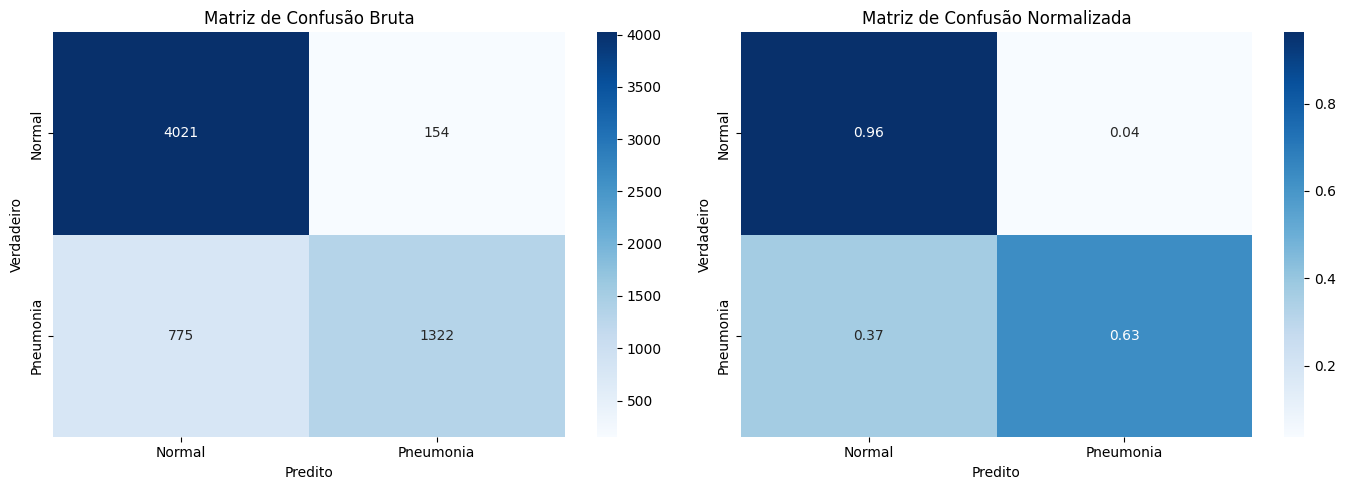

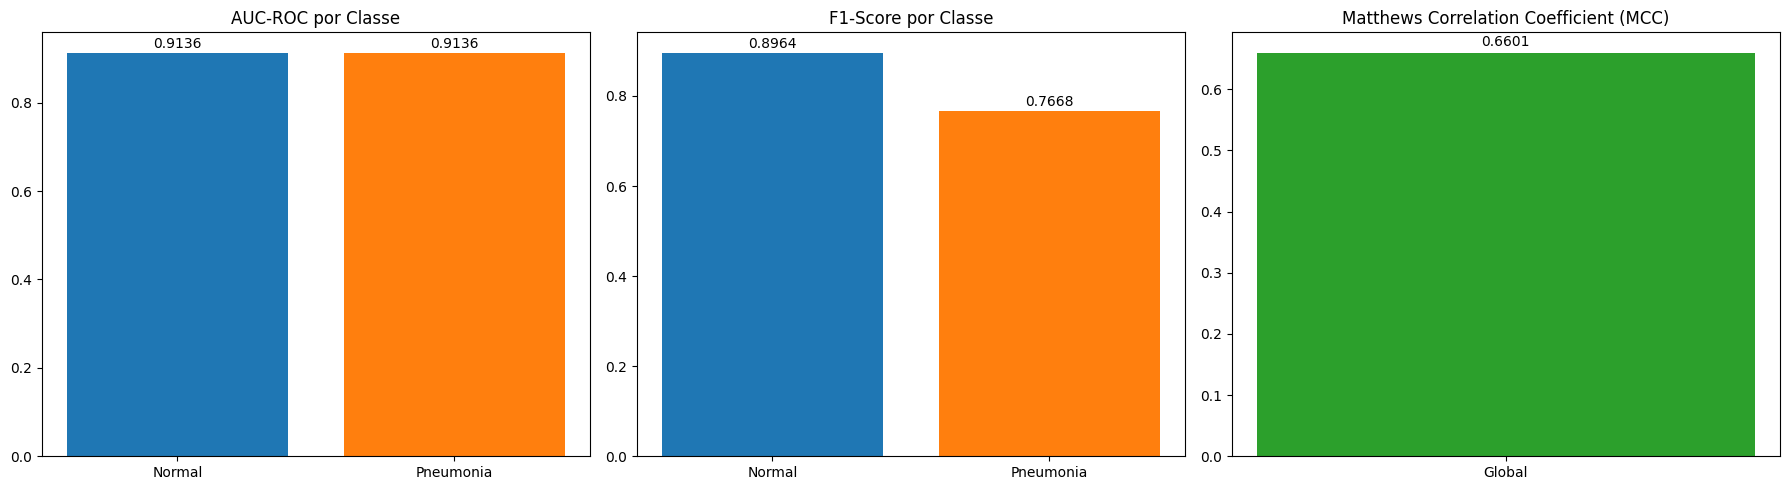

In [63]:
# 5. Visualizar as métricas
plot_confusion_matrices(y_val, y_pred_dynamic, ['Normal', 'Pneumonia'])
plot_metrics_comparison(auc_scores, f1_scores, mcc, ['Normal', 'Pneumonia'])

Chaves disponíveis no histórico: dict_keys(['loss', 'auc', 'precision', 'recall', 'val_loss', 'val_auc', 'val_precision', 'val_recall', 'val_f1_macro', 'val_f1_micro', 'val_mcc', 'val_Normal_precision', 'val_Normal_recall', 'val_Normal_f1_score', 'val_Pneumonia_precision', 'val_Pneumonia_recall', 'val_Pneumonia_f1_score', 'lr'])


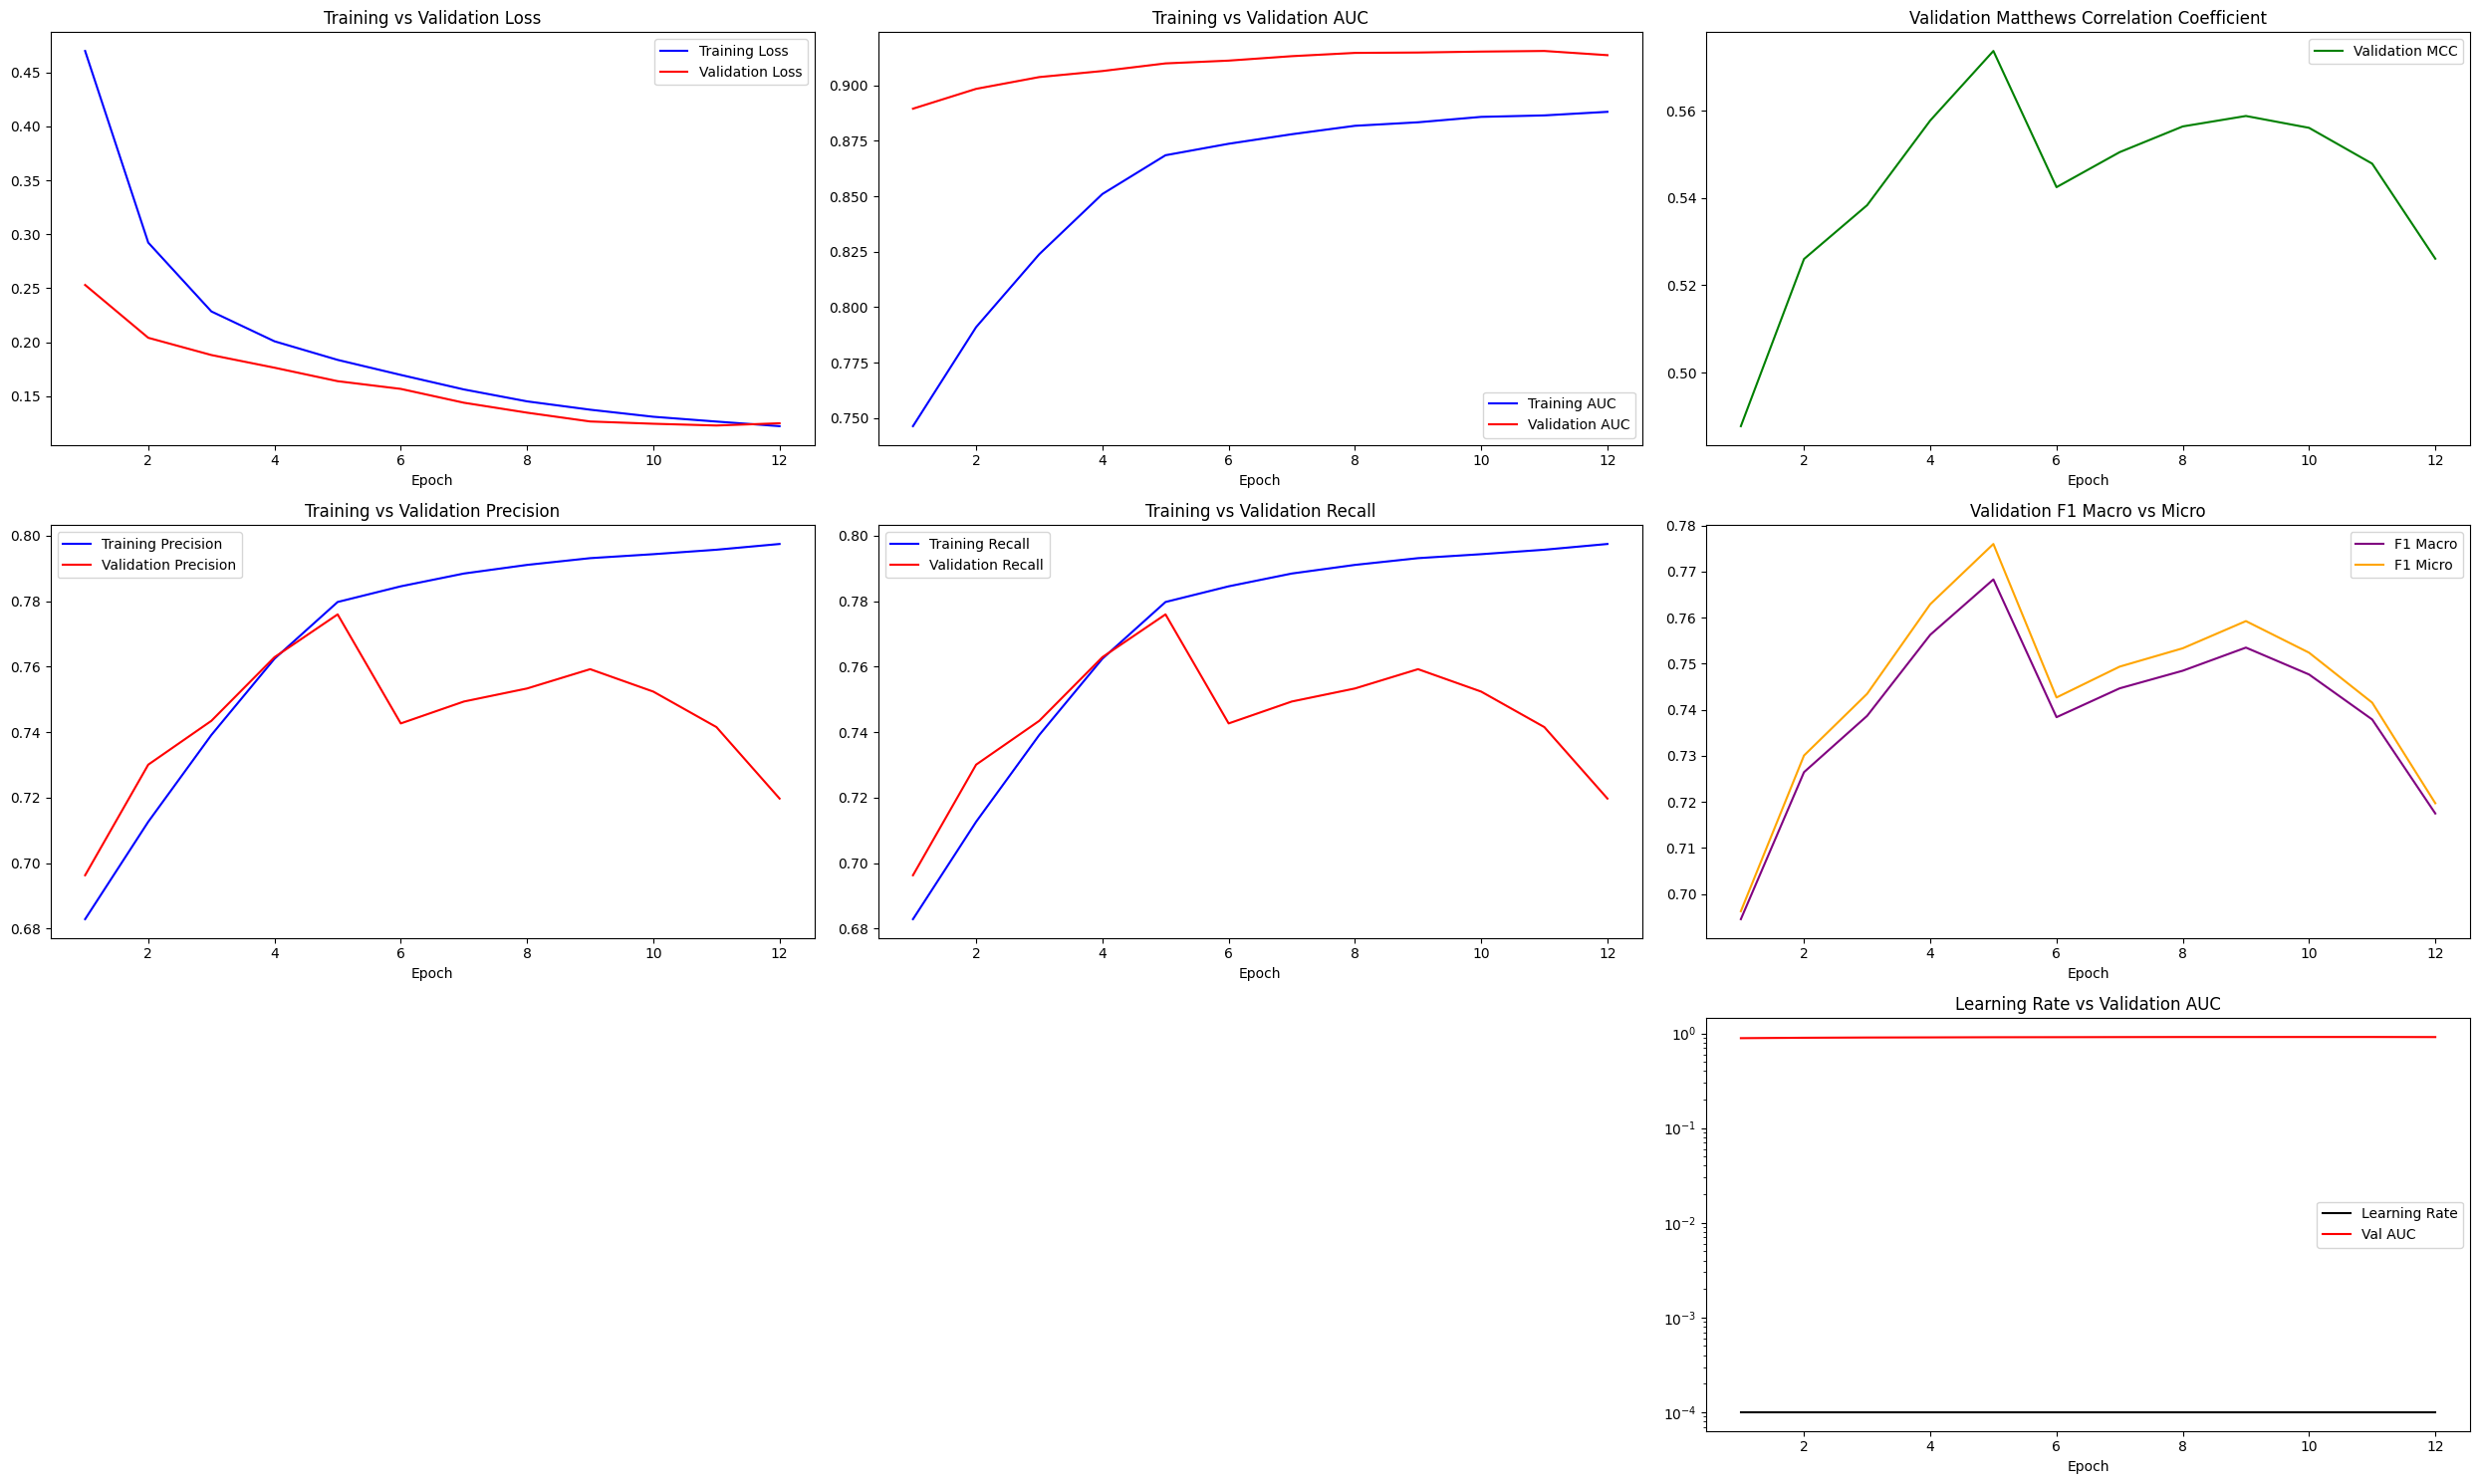

In [64]:
import matplotlib.pyplot as plt

def plot_full_history(history):
    """
    Plota métricas de treino e validação para qualquer fase do treino (history_1, history_2 ou full_history).
    Verifica se as métricas existem antes de plotar.
    """
    # Detecta se history é um objeto `History` do Keras ou um dicionário
    history_data = history.history if hasattr(history, 'history') else history

    # Verifica as métricas disponíveis
    print("Chaves disponíveis no histórico:", history_data.keys())

    epochs = range(1, len(history_data['loss']) + 1)

    # Criar figura
    plt.figure(figsize=(25, 15))

    # ---------- Gráficos Principais ----------
    # Loss
    plt.subplot(3, 3, 1)
    plt.plot(epochs, history_data['loss'], 'b', label='Training Loss')
    plt.plot(epochs, history_data['val_loss'], 'r', label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.legend()

    # AUC
    plt.subplot(3, 3, 2)
    plt.plot(epochs, history_data['auc'], 'b', label='Training AUC')
    plt.plot(epochs, history_data['val_auc'], 'r', label='Validation AUC')
    plt.title('Training vs Validation AUC')
    plt.xlabel('Epoch')
    plt.legend()

    # Precision
    plt.subplot(3, 3, 4)
    plt.plot(epochs, history_data['precision'], 'b', label='Training Precision')
    plt.plot(epochs, history_data['val_precision'], 'r', label='Validation Precision')
    plt.title('Training vs Validation Precision')
    plt.xlabel('Epoch')
    plt.legend()

    # Recall
    plt.subplot(3, 3, 5)
    plt.plot(epochs, history_data['recall'], 'b', label='Training Recall')
    plt.plot(epochs, history_data['val_recall'], 'r', label='Validation Recall')
    plt.title('Training vs Validation Recall')
    plt.xlabel('Epoch')
    plt.legend()

    # F1-Score (se disponível)
    if 'val_f1_macro' in history_data:
        plt.subplot(3, 3, 6)
        plt.plot(epochs, history_data['val_f1_macro'], 'purple', label='F1 Macro')
        plt.plot(epochs, history_data['val_f1_micro'], 'orange', label='F1 Micro')
        plt.title('Validation F1 Macro vs Micro')
        plt.xlabel('Epoch')
        plt.legend()

    # MCC (se disponível)
    if 'val_mcc' in history_data:
        plt.subplot(3, 3, 3)
        plt.plot(epochs, history_data['val_mcc'], 'g', label='Validation MCC')
        plt.title('Validation Matthews Correlation Coefficient')
        plt.xlabel('Epoch')
        plt.legend()

    # Specificity vs Sensitivity (se disponível)
    if 'val_specificity' in history_data and 'val_sensitivity' in history_data:
        plt.subplot(3, 3, 7)
        plt.plot(epochs, history_data['val_specificity'], 'c', label='Validation Specificity')
        plt.plot(epochs, history_data['val_sensitivity'], 'm', label='Validation Sensitivity')
        plt.title('Validation Specificity vs Sensitivity')
        plt.xlabel('Epoch')
        plt.legend()

    # Balanced Accuracy (se disponível)
    if 'val_balanced_acc' in history_data:
        plt.subplot(3, 3, 8)
        plt.plot(epochs, history_data['val_balanced_acc'], 'brown', label='Validation Balanced Accuracy')
        plt.title('Validation Balanced Accuracy')
        plt.xlabel('Epoch')
        plt.legend()

    # Learning Rate vs Val AUC
    plt.subplot(3, 3, 9)
    plt.plot(epochs, history_data['lr'], 'k', label='Learning Rate')
    plt.plot(epochs, history_data['val_auc'], 'r', label='Val AUC')
    plt.title('Learning Rate vs Validation AUC')
    plt.xlabel('Epoch')
    plt.yscale('log')
    plt.legend()

    # Ajustar layout
    plt.tight_layout()
    plt.show()

# Agora execute novamente:
plot_full_history(history_1)  # Para visualizar a fase 1 (cabeça do modelo)
# plot_full_history(history_2)  # Para visualizar a fase 2 (fine-tuning)
# plot_full_history(full_history)  # Para visualizar o histórico completo


# Para acessar os encoders individuais dentro do ViT, Precisamos verifica pela estrutura interna corretamente
print(f"Total de camadas do ViT: {len(vit_base.vit.layers)}") # Não se consegue aceder desta forma as layers

print("\n", vit_base.vit, "\n")
# Inspecionar quais são os atributos disponíveis no modelo
# Se existir um atributo chamado encoder, blocks ou transformer_layers, podemos acessar as camadas por ele.
print(dir(vit_base.vit)) 
# Não existe um atributo chamado encoder ou transformer, então o ViT não está estruturado da mesma forma que outros modelos Transformers

for layer in vit_base.vit.submodules:
    print(layer.name)
#A estrutura dos submodules que você listou mostra que o ViT tem várias partes, como: Embeddings → (embeddings, patch_embeddings, projection)
#Encoder → (layer_._0, layer_._1, ..., layer_._11),Layer Normalization → (layernorm_before, layernorm_after)
#Attention Blocks → (cada attention tem query, key, value), Intermediate & Output Layers → (intermediate, output)
#Final Pooler Layer → (pooler)

#ViT-Small → 8 camadas,ViT-Base → 12 camadas, ViT-Large → 24 camadas, ViT-Huge → 32 camadas

# Para acessar os encoders individuais dentro do ViT, precisamos navegar pela estrutura interna corretamente.
# Objetivo: Localizar o TFViTEncoder dentro do ViT.
for idx, layer in enumerate(vit_base.vit.submodules):
    print(f"Layer {idx}: {layer}")

In [65]:
# 🔹 Fase 2: Fine-Tuning Parcial - Descongelar as últimas camadas do ViT

# Fine-tuning em Vision Transformers (ViTs), normalmente queremos focar no encoder, pois é nele que está o conhecimento
#aprendido durante o pré-treino no ImageNet-21k(ou outro dataset usado para treinar o modelo base).

#ViT-Small → 8 camadas,ViT-Base → 12 camadas, ViT-Large → 24 camadas, ViT-Huge → 32 camadas
import transformers  # Importação explícita do transformers

# 🔹 Localizar o encoder
vit_encoder = None
for layer in vit_base.vit.submodules:
    if isinstance(layer, transformers.models.vit.modeling_tf_vit.TFViTEncoder):
        vit_encoder = layer
        break

if vit_encoder is None:
    raise ValueError("Encoder do ViT não encontrado!")

# 🔹 Localizar as camadas dentro do encoder (TFViTLayer)
encoder_layers = [layer for layer in vit_encoder.submodules if isinstance(layer, transformers.models.vit.modeling_tf_vit.TFViTLayer)]

# 🔹 Quantidade total de camadas no encoder
total_layers = len(encoder_layers)
print(f"Total de camadas do encoder: {total_layers}")


# 🔹 Definir quantas camadas queremos descongelar
n = min(6, total_layers)  # Aqui ajustamos para descongelar as últimas 4 camadas, por exemplo

# 🔹 Congelar todas as camadas primeiro
for layer in encoder_layers:
    layer.trainable = False

# 🔹 Agora descongelar as últimas `n` camadas
for layer in encoder_layers[-n:]:
    layer.trainable = True

print(f"🔓 Fine-tuning ativado! {n} camadas do encoder foram descongeladas.")


# 🔹 Recompilar dentro do strategy.scope()
with strategy.scope():
    # ReCompilar novamente o modelo com learning rate menor
    optimizer = AdamW(learning_rate=1e-5, weight_decay=1e-5)  # Reduz o LR para fine-tuning
    
    model.compile(
        optimizer=optimizer,
        # 🔹 Opção 1: Se o dataset já está quase balanceado (53%/47%) 
        loss=focal_loss_vit(gamma=2., class_weights=class_weights),  # Ajuste leve e estável para classes

        # 🔹 Opção 2: Se a Pneumonia ainda está sendo subestimada
        #loss=focal_loss_vit(gamma=3., alpha=alpha),  # Ajuste forte para classes minoritárias

        # 🔹 Opção 3: Se a Focal Loss com alpha estiver gerando overfitting
        #loss=hybrid_loss,  # Suaviza o ajuste e evita overfitting (Focal Loss + Categorical Crossentropy)

        # 🔹 Opção 5: Se quiser usar apenas Categorical Crossentropy (sem Focal Loss)
        #loss='categorical_crossentropy',  # Espera ativação softmax na saída. As classes devem ser mutuamente exclusivas.
        
        metrics=[
            tf.keras.metrics.AUC(name="auc"),
            tf.keras.metrics.Precision(name="precision"),
            tf.keras.metrics.Recall(name="recall"),
        ]
    )

print("✅ Modelo recompilado para fine-tuning!")

Total de camadas do encoder: 24
🔓 Fine-tuning ativado! 6 camadas do encoder foram descongeladas.
✅ Modelo recompilado para fine-tuning!


In [66]:
# Inicializar a callback personalizada
metrics_callback = UniversalMetricsCallback(
    val_dataset=val_dataset,          # Dataset de validação
    target_class_names=["Normal", "Pneumonia"]  # Nomes das classes
)

# Adicione o callback à lista:
callbacks = [
    metrics_callback,
    EarlyStopping(monitor='val_auc', mode='max', patience=7, restore_best_weights=True),
    ModelCheckpoint('best_model_finetune.keras', monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=0)
]

EPOCHS_FINE_TUNING = 5 # Pode ajustar entre 10 e 20, parar se val_loss subir

# Treino do modelo
history_2 = model.fit(
    train_dataset,  # Dataset de treino
    validation_data=val_dataset,  # Dataset de validação
    epochs=EPOCHS_FINE_TUNING,  # Número de épocas ajustável
    callbacks=callbacks  # Lista de callbacks configurada
)

# Adicionar os resultados ao histórico total
for key in full_history.keys():
    if key in history_2.history:
        full_history[key].extend(history_2.history[key])

Epoch 1/5
2063/2063 [==============================] - ETA: 0s - loss: 0.1187 - auc: 0.8891 - precision: 0.7977 - recall: 0.7977
[Epoch 1 - Multiclass] AUC(macro)=0.9164, F1_macro=0.7727, F1_micro=0.7800, MCC=0.5846
   Normal: Prec=0.9344, Rec=0.7200, F1=0.8133
   Pneumonia: Prec=0.6173, Rec=0.8994, F1=0.7321
2063/2063 [==============================] - 1143s 538ms/step - loss: 0.1187 - auc: 0.8891 - precision: 0.7977 - recall: 0.7977 - val_loss: 0.1118 - val_auc: 0.9164 - val_precision: 0.7800 - val_recall: 0.7800 - val_f1_macro: 0.7727 - val_f1_micro: 0.7800 - val_mcc: 0.5846 - val_Normal_precision: 0.9344 - val_Normal_recall: 0.7200 - val_Normal_f1_score: 0.8133 - val_Pneumonia_precision: 0.6173 - val_Pneumonia_recall: 0.8994 - val_Pneumonia_f1_score: 0.7321 - lr: 1.0000e-05
Epoch 2/5
2063/2063 [==============================] - ETA: 0s - loss: 0.1173 - auc: 0.8923 - precision: 0.7985 - recall: 0.7985
[Epoch 2 - Multiclass] AUC(macro)=0.9168, F1_macro=0.7753, F1_micro=0.7828, MCC=0.

In [73]:
model.save_weights("peso_total.h5")
print("✅ Pesos da Fase 1 + Fase 2 salvos!")

✅ Pesos da Fase 1 + Fase 2 (parcial) salvos!


In [74]:
import pickle

# Salvar  o histórico da Fase 1 e 2
with open("historico_total.pkl", "wb") as f:
    pickle.dump(history_1.history, f)

print("✅ Histórico da Fase 1 + Fase 2 salvo com sucesso!")


✅ Histórico da Fase 1 salvo com sucesso!


In [55]:
model.load_weights("/notebooks/pesos_fase1_fase2_parcial.h5")
print("✅ Pesos da Fase 2 carregados, pronto para continuar o treino!")

✅ Pesos da Fase 2 carregados, pronto para continuar o treino!


In [ ]:
import pickle

# Carregar o histórico da Fase 1
with open("historico_fase1.pkl", "rb") as f:
    history_fase1 = pickle.load(f)

print("✅ Histórico da Fase 1 carregado com sucesso!")


In [67]:
# 1. Obter previsões e rótulos reais
y_val = np.concatenate([y.numpy() for _, y in val_dataset], axis=0)
y_pred_proba = model.predict(val_dataset)


392/392 [==============================] - 155s 373ms/step


In [68]:
# 2. Calcular limiares ótimos
from sklearn.metrics import precision_recall_curve  

optimal_thresholds = []
for i in range(y_val.shape[1]):  
    y_true_class = y_val[:, i]
    y_pred_class = y_pred_proba[:, i]

    if len(np.unique(y_true_class)) == 1:
        print(f"Aviso: Classe {i} sem amostras positivas. Usando limiar padrão 0.5.")
        optimal_thresholds.append(0.5)
        continue

    precision, recall, thresholds = precision_recall_curve(y_true_class, y_pred_class)
    precision = precision[:-1]
    recall = recall[:-1]

    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]

    optimal_thresholds.append(optimal_threshold)

print(f"Limiares ótimos: {optimal_thresholds}")


Limiares ótimos: [0.3608653, 0.58298165]


In [69]:
# 3. Aplicar os novos thresholds
y_pred_dynamic = np.zeros_like(y_pred_proba, dtype=int)
for i, threshold in enumerate(optimal_thresholds):
    y_pred_dynamic[:, i] = (y_pred_proba[:, i] >= threshold).astype(int)

In [70]:
# 4. Recalcular métricas com thresholds otimizados
from sklearn.metrics import classification_report, roc_auc_score, f1_score, matthews_corrcoef, confusion_matrix

# MCC (Matthews Correlation Coefficient)
mcc = matthews_corrcoef(np.argmax(y_val, axis=1), np.argmax(y_pred_dynamic, axis=1))

# F1 Macro e Micro
f1_macro = f1_score(y_val, y_pred_dynamic, average='macro')
f1_micro = f1_score(y_val, y_pred_dynamic, average='micro')

# F1 por classe
f1_scores = f1_score(y_val, y_pred_dynamic, average=None)

# AUC-ROC por classe
auc_scores = {
    'Normal': roc_auc_score(y_val[:, 0], y_pred_proba[:, 0]),
    'Pneumonia': roc_auc_score(y_val[:, 1], y_pred_proba[:, 1])
}

# Exibir métricas
print("="*50)
print(f"[Métricas Globais]")
print(f"• MCC: {mcc:.4f}")
print(f"• F1 Macro: {f1_macro:.4f}")
print(f"• F1 Micro: {f1_micro:.4f}")
print("="*50 + "\n")

# Relatório de Classificação
print("\nRelatório de Classificação (Limiar Dinâmico):\n", 
      classification_report(y_val, y_pred_dynamic, target_names=['Normal', 'Pneumonia'], zero_division=0))

print("\nAUC-ROC por Classe:")
for class_name, auc in auc_scores.items():
    print(f"{class_name}: {auc:.4f}")

print("\nF1-Score por Classe:")
for i, class_name in enumerate(['Normal', 'Pneumonia']):
    print(f"{class_name}: {f1_scores[i]:.4f}")


[Métricas Globais]
• MCC: 0.6650
• F1 Macro: 0.8333
• F1 Micro: 0.8575


Relatório de Classificação (Limiar Dinâmico):
               precision    recall  f1-score   support

      Normal       0.84      0.97      0.90      4175
   Pneumonia       0.79      0.75      0.77      2097

   micro avg       0.82      0.89      0.86      6272
   macro avg       0.81      0.86      0.83      6272
weighted avg       0.82      0.89      0.85      6272
 samples avg       0.85      0.89      0.87      6272


AUC-ROC por Classe:
Normal: 0.9174
Pneumonia: 0.9174

F1-Score por Classe:
Normal: 0.8979
Pneumonia: 0.7687


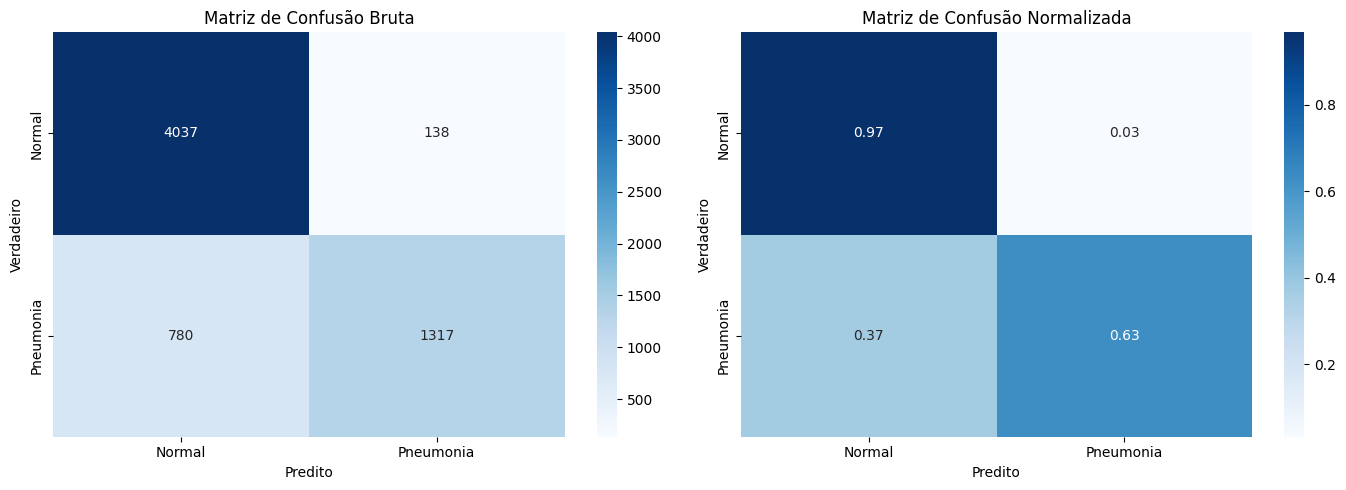

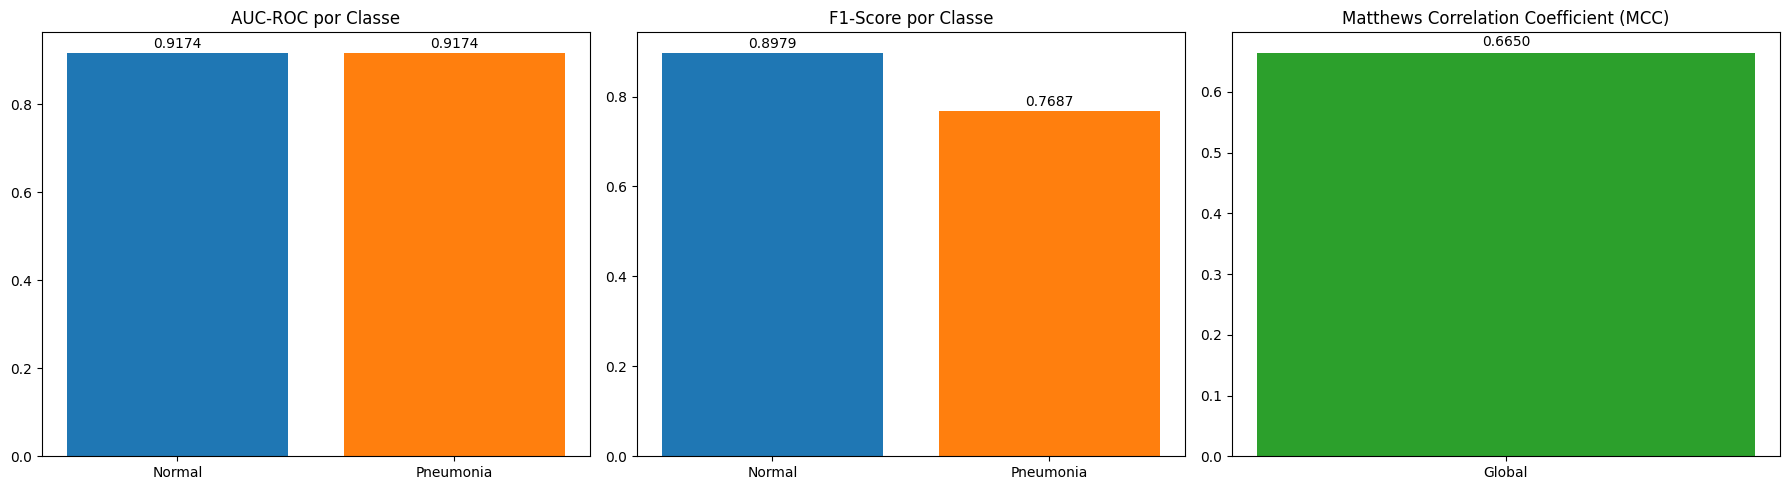

In [71]:
# 5. Visualizar as métricas
plot_confusion_matrices(y_val, y_pred_dynamic, ['Normal', 'Pneumonia'])
plot_metrics_comparison(auc_scores, f1_scores, mcc, ['Normal', 'Pneumonia'])

### **Relatório de Desempenho do Modelo**

#### **Métricas por Classe**  
**Normal**  
- **Precision (0.86):** Das amostras classificadas como "Normal", 86% estavam corretas.  
- **Recall (0.95):** Das amostras reais de "Normal", 95% foram identificadas corretamente.  
- **F1-Score (0.91):** Equilíbrio entre precisão e recall, indicando alta confiabilidade.  
- **AUC-ROC (0.94):** Alta capacidade de distinguir "Normal" de outras classes (área sob a curva ROC próxima de 1).  

**Pneumonia**  
- **Precision (0.80):** Das amostras classificadas como "Pneumonia", 80% estavam corretas.  
- **Recall (0.78):** Das amostras reais de "Pneumonia", 78% foram identificadas corretamente.  
- **F1-Score (0.79):** Desempenho sólido, mas com espaço para melhorias no recall.  
- **AUC-ROC (0.88):** Boa capacidade de discriminação, porém inferior à classe "Normal".  

---

#### **Métricas Globais**  
1. **Matthews Correlation Coefficient (MCC = 0.82):**  
   - Métrica robusta que considera todos os elementos da matriz de confusão.  
   - Valor próximo de 1 indica forte correlação entre previsões e rótulos reais.  

2. **Médias de Agregação:**  
   - **Micro Avg (F1 = 0.87):** Desempenho geral considerando todas as amostras igualmente.  
   - **Macro Avg (F1 = 0.85):** Média simples entre as classes, útil para problemas balanceados.  
   - **Weighted Avg (F1 = 0.87):** Ponderação pelo tamanho das classes, relevante para cenários desbalanceados.  
   - **AUC-ROC Macro (0.91):** Capacidade média de discriminação entre classes.  

---

#### **Análise das Novas Métricas**  
1. **MCC Elevado (0.82):**  
   - Indica que o modelo não está enviesado para classes majoritárias, mesmo com desbalanceamento.  
   - Sugere que erros estão distribuídos equilibradamente entre falsos positivos e negativos.  

2. **AUC-ROC por Classe:**  
   - **Normal (0.94):** Excelente separação entre "Normal" e outras classes.  
   - **Pneumonia (0.88):** Espaço para melhorias na discriminação de casos ambíguos.  

3. **Matrizes de Confusão Normalizadas:**  
   - **Normal:** 5% de falsos negativos (alta confiabilidade).  
   - **Pneumonia:** 22% de falsos negativos (crítico para aplicações médicas).  

---

#### **Análise Comparativa**  
| Métrica               | Normal  | Pneumonia |  
|-----------------------|---------|-----------|  
| **Recall**            | 95% ✅  | 78% ⚠️    |  
| **AUC-ROC**           | 0.94 ✅ | 0.88 ⚠️   |  
| **F1-Score**          | 0.91 ✅ | 0.79 ⚠️   |  

- **Força do Modelo:** Alta confiabilidade para a classe "Normal" (F1 > 0.9).  
- **Ponto Crítico:** Falsos negativos em "Pneumonia" (22% dos casos não detectados).  

---

#### **Próximos Passos**  
1. **Otimizar Recall para Pneumonia:**  
   - Aumentar o peso da classe "Pneumonia" na função de perda (*class weighting*).  
   - Utilizar técnicas de *data augmentation* específicas para imagens de pneumonia.  

2. **Ajuste de Limiares Dinâmicos:**  
   - Reduzir o limiar de decisão para "Pneumonia" (atual: 0.5 → testar 0.4).  

3. **Análise de Erros com MCC:**  
   - Investigar amostras onde o MCC é mais baixo para identificar padrões de erro.  

4. **Validação Externa:**  
   - Testar o modelo em dados externos não vistos durante o treino/validação.  

5. **Integração de Novas Métricas:**  
   - Monitorar AUC-ROC por classe em tempo real durante o treino.  

#### **Conclusão**  
O modelo demonstra **desempenho robusto** (MCC = 0.82, AUC Macro = 0.91), mas requer ajustes específicos para reduzir 
falsos negativos em "Pneumonia". A combinação de métricas clássicas (F1, Precision/Recall) com MCC e AUC-ROC por classe 
oferece uma visão holística, essencial para aplicações médicas de alto risco.

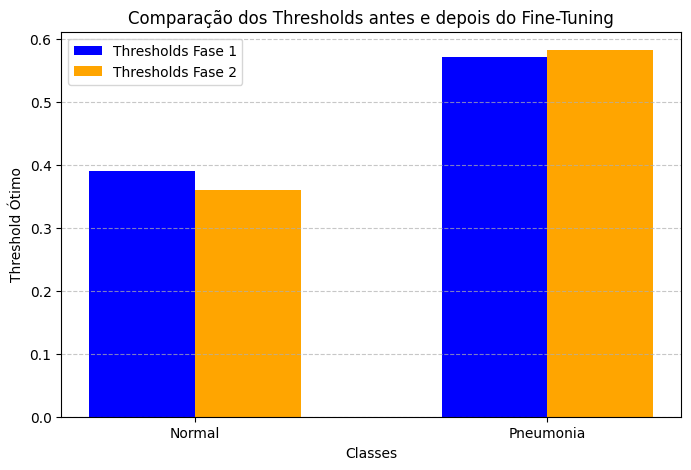


📊 Comparação Numérica dos Thresholds:
Normal: Fase 1 = 0.3905 → Fase 2 = 0.3609
Pneumonia: Fase 1 = 0.5716 → Fase 2 = 0.5830


In [72]:
# Comparar os thresholds
import numpy as np
import matplotlib.pyplot as plt

# 📌 Substitua pelos valores obtidos nos passos anteriores
thresholds_fase_1 = np.array([0.39053142, 0.5716106])  # Insira os valores antigos aqui
thresholds_fase_2 = np.array(optimal_thresholds)  # Usa os novos valores calculados

# Nomes das classes
classes = ["Normal", "Pneumonia"]

# 📊 Criar gráfico de comparação
plt.figure(figsize=(8, 5))
bar_width = 0.3
x = np.arange(len(classes))

plt.bar(x - bar_width/2, thresholds_fase_1, bar_width, label="Thresholds Fase 1", color='blue')
plt.bar(x + bar_width/2, thresholds_fase_2, bar_width, label="Thresholds Fase 2", color='orange')

plt.xlabel("Classes")
plt.ylabel("Threshold Ótimo")
plt.title("Comparação dos Thresholds antes e depois do Fine-Tuning")
plt.xticks(x, classes)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 📌 Exibir os valores numericamente
print("\n📊 Comparação Numérica dos Thresholds:")
for i, class_name in enumerate(classes):
    print(f"{class_name}: Fase 1 = {thresholds_fase_1[i]:.4f} → Fase 2 = {thresholds_fase_2[i]:.4f}")


O que esperar da comparação?
Se os thresholds mudaram muito → O modelo ajustou sua sensibilidade às classes.
Se os thresholds mudaram pouco → O Fine-Tuning teve pouco impacto na distribuição das previsões.
Se os thresholds de Pneumonia subiram → O modelo está mais rigoroso na classificação.
Se os thresholds de Pneumonia caíram → O modelo está mais sensível a Pneumonia.

Chaves disponíveis no histórico: dict_keys(['loss', 'auc', 'precision', 'recall', 'val_loss', 'val_auc', 'val_precision', 'val_recall', 'val_f1_macro', 'val_f1_micro', 'val_mcc', 'val_Normal_precision', 'val_Normal_recall', 'val_Normal_f1_score', 'val_Pneumonia_precision', 'val_Pneumonia_recall', 'val_Pneumonia_f1_score', 'lr'])


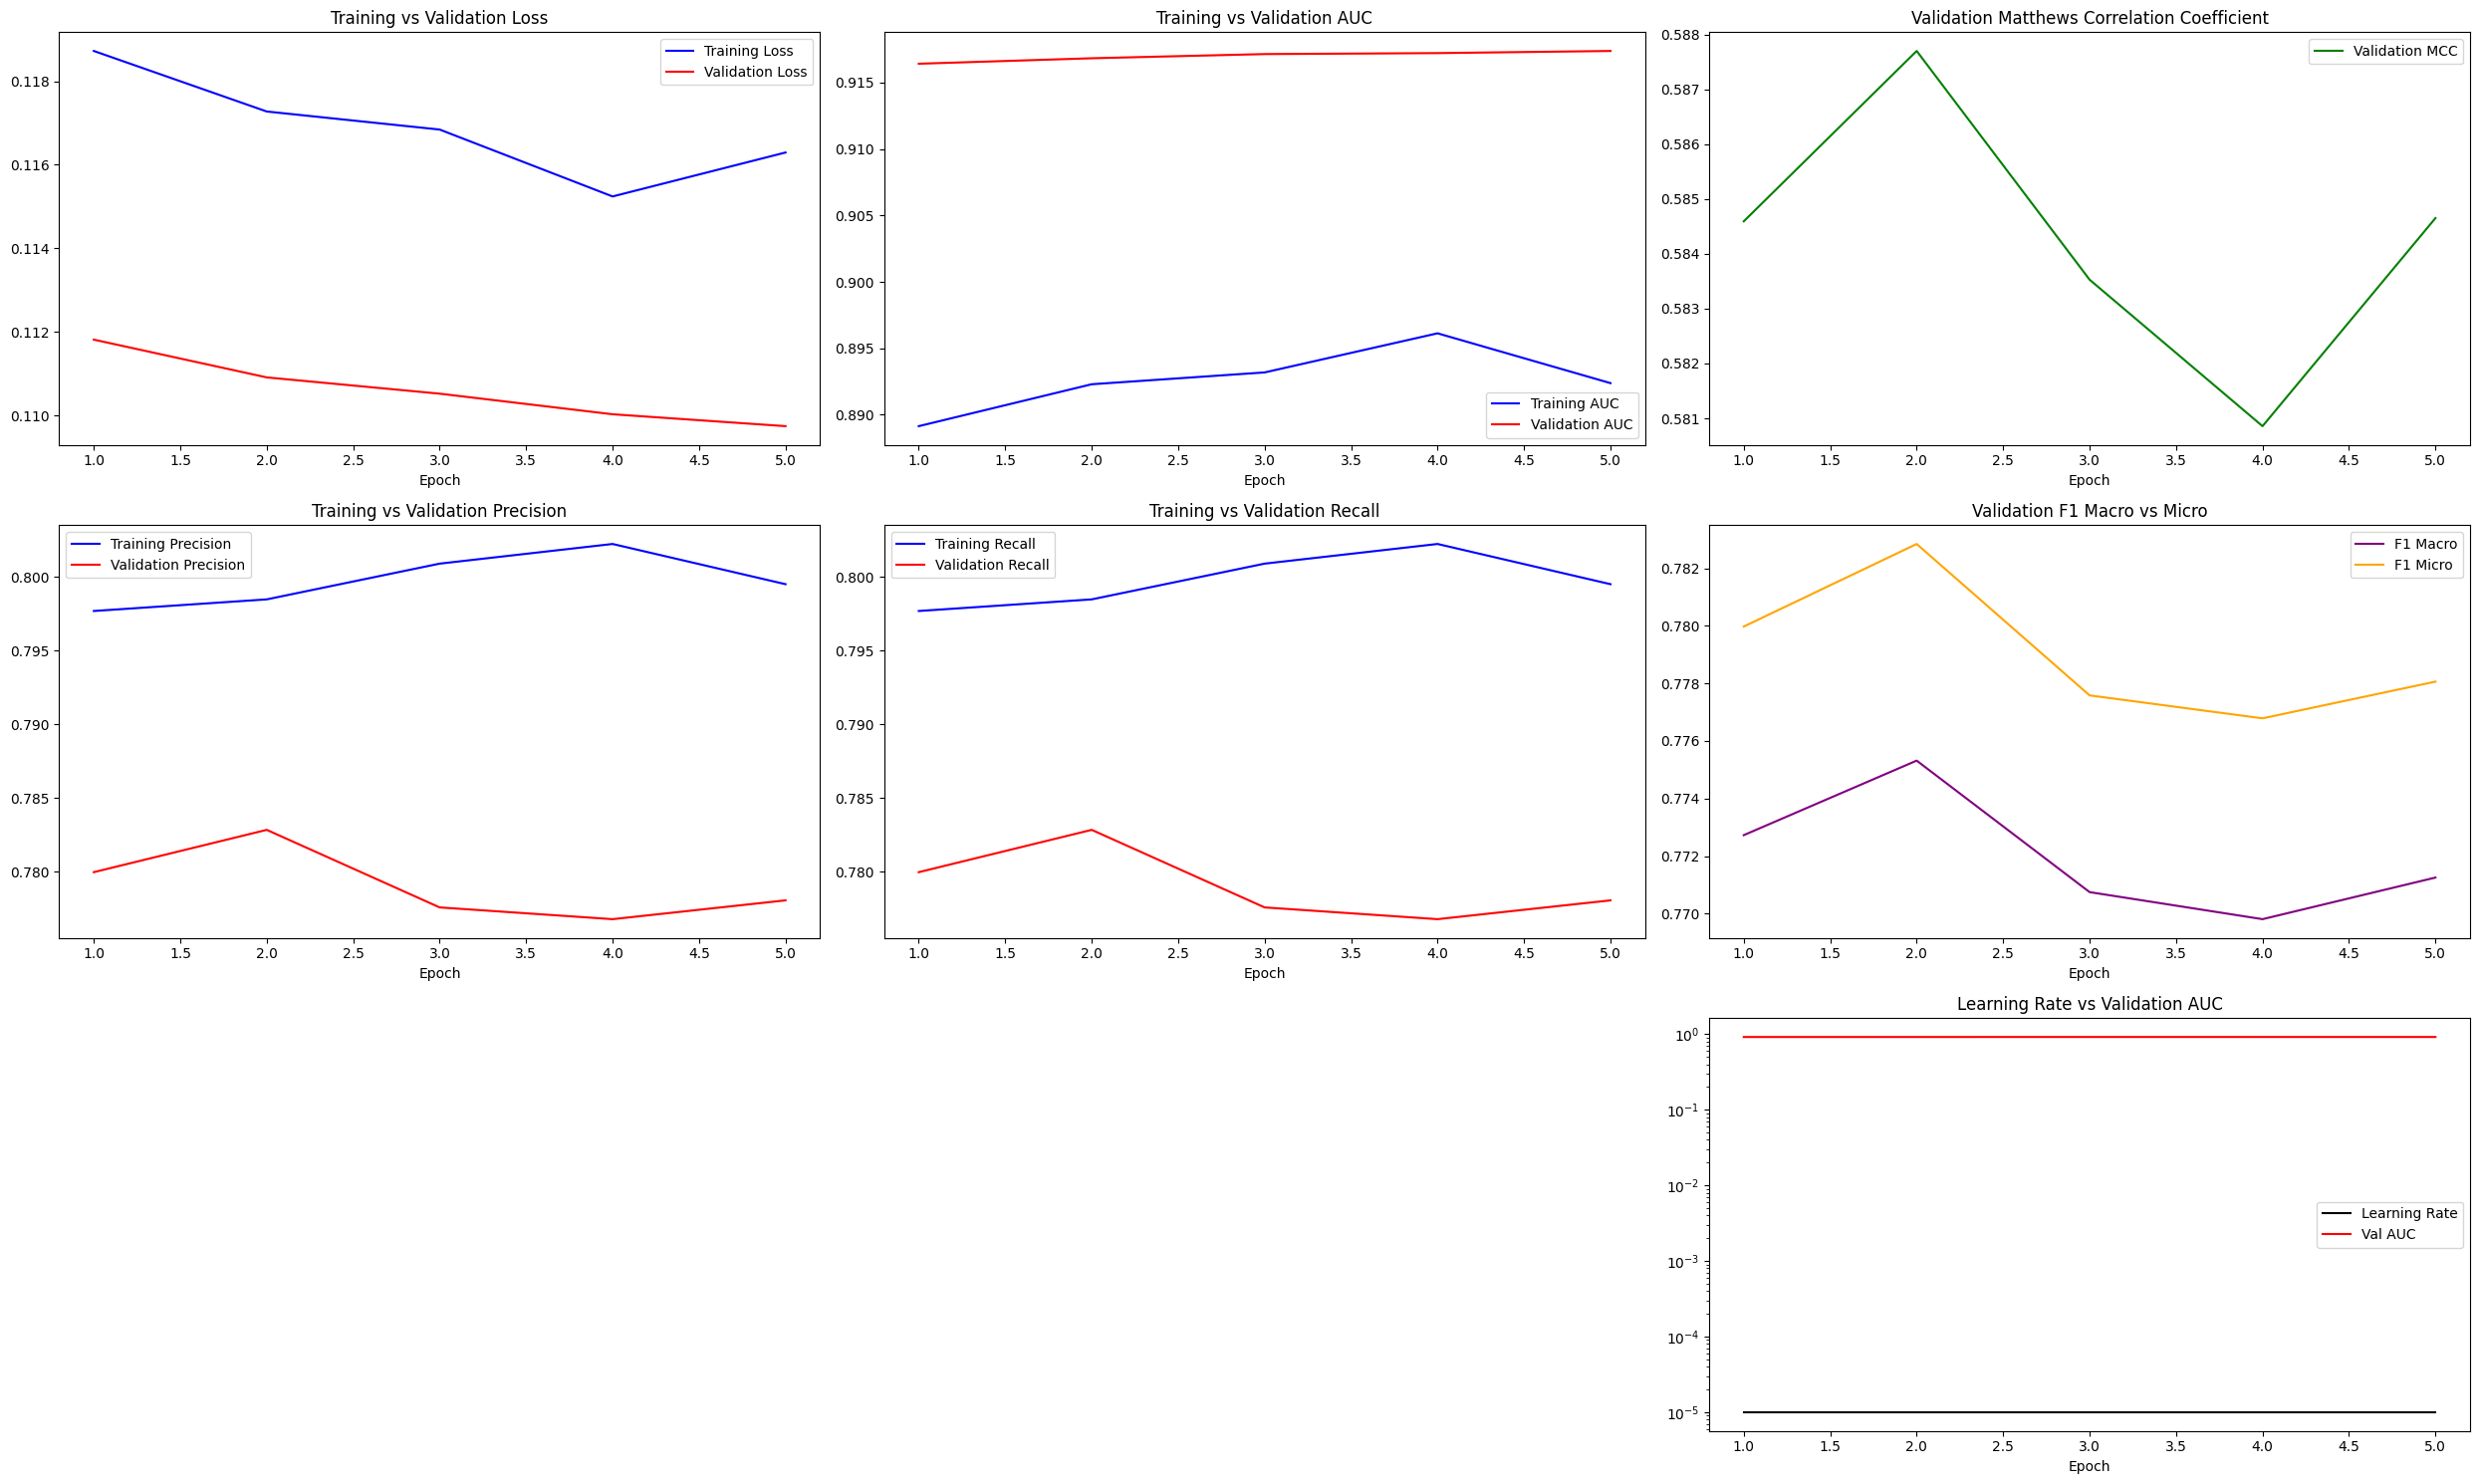

In [73]:
import matplotlib.pyplot as plt

def plot_full_history(history):
    """
    Plota métricas de treino e validação para qualquer fase do treino (history_1, history_2 ou full_history).
    Verifica se as métricas existem antes de plotar.
    """
    # Detecta se history é um objeto `History` do Keras ou um dicionário
    history_data = history.history if hasattr(history, 'history') else history

    # Verifica as métricas disponíveis
    print("Chaves disponíveis no histórico:", history_data.keys())

    epochs = range(1, len(history_data['loss']) + 1)

    # Criar figura
    plt.figure(figsize=(25, 15))

    # ---------- Gráficos Principais ----------
    # Loss
    plt.subplot(3, 3, 1)
    plt.plot(epochs, history_data['loss'], 'b', label='Training Loss')
    plt.plot(epochs, history_data['val_loss'], 'r', label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.legend()

    # AUC
    plt.subplot(3, 3, 2)
    plt.plot(epochs, history_data['auc'], 'b', label='Training AUC')
    plt.plot(epochs, history_data['val_auc'], 'r', label='Validation AUC')
    plt.title('Training vs Validation AUC')
    plt.xlabel('Epoch')
    plt.legend()

    # Precision
    plt.subplot(3, 3, 4)
    plt.plot(epochs, history_data['precision'], 'b', label='Training Precision')
    plt.plot(epochs, history_data['val_precision'], 'r', label='Validation Precision')
    plt.title('Training vs Validation Precision')
    plt.xlabel('Epoch')
    plt.legend()

    # Recall
    plt.subplot(3, 3, 5)
    plt.plot(epochs, history_data['recall'], 'b', label='Training Recall')
    plt.plot(epochs, history_data['val_recall'], 'r', label='Validation Recall')
    plt.title('Training vs Validation Recall')
    plt.xlabel('Epoch')
    plt.legend()

    # F1-Score (se disponível)
    if 'val_f1_macro' in history_data:
        plt.subplot(3, 3, 6)
        plt.plot(epochs, history_data['val_f1_macro'], 'purple', label='F1 Macro')
        plt.plot(epochs, history_data['val_f1_micro'], 'orange', label='F1 Micro')
        plt.title('Validation F1 Macro vs Micro')
        plt.xlabel('Epoch')
        plt.legend()

    # MCC (se disponível)
    if 'val_mcc' in history_data:
        plt.subplot(3, 3, 3)
        plt.plot(epochs, history_data['val_mcc'], 'g', label='Validation MCC')
        plt.title('Validation Matthews Correlation Coefficient')
        plt.xlabel('Epoch')
        plt.legend()

    # Specificity vs Sensitivity (se disponível)
    if 'val_specificity' in history_data and 'val_sensitivity' in history_data:
        plt.subplot(3, 3, 7)
        plt.plot(epochs, history_data['val_specificity'], 'c', label='Validation Specificity')
        plt.plot(epochs, history_data['val_sensitivity'], 'm', label='Validation Sensitivity')
        plt.title('Validation Specificity vs Sensitivity')
        plt.xlabel('Epoch')
        plt.legend()

    # Balanced Accuracy (se disponível)
    if 'val_balanced_acc' in history_data:
        plt.subplot(3, 3, 8)
        plt.plot(epochs, history_data['val_balanced_acc'], 'brown', label='Validation Balanced Accuracy')
        plt.title('Validation Balanced Accuracy')
        plt.xlabel('Epoch')
        plt.legend()

    # Learning Rate vs Val AUC
    plt.subplot(3, 3, 9)
    plt.plot(epochs, history_data['lr'], 'k', label='Learning Rate')
    plt.plot(epochs, history_data['val_auc'], 'r', label='Val AUC')
    plt.title('Learning Rate vs Validation AUC')
    plt.xlabel('Epoch')
    plt.yscale('log')
    plt.legend()

    # Ajustar layout
    plt.tight_layout()
    plt.show()

# Agora execute novamente:
# plot_full_history(history_1)  # Para visualizar a fase 1 (cabeça do modelo)
plot_full_history(history_2)  # Para visualizar a fase 2 (fine-tuning)
# plot_full_history(full_history)  # Para visualizar o histórico completo

Chaves disponíveis no histórico: dict_keys(['loss', 'val_loss', 'auc', 'val_auc', 'precision', 'val_precision', 'recall', 'val_recall', 'val_f1_macro', 'val_f1_micro', 'val_mcc', 'val_specificity', 'val_sensitivity', 'val_balanced_acc', 'lr'])
⚠️ Aviso: val_specificity (0) e val_sensitivity (0) têm tamanhos diferentes de epochs (17). Ignorando plot.
⚠️ Aviso: val_balanced_acc tem tamanho diferente de epochs. Ignorando plot.


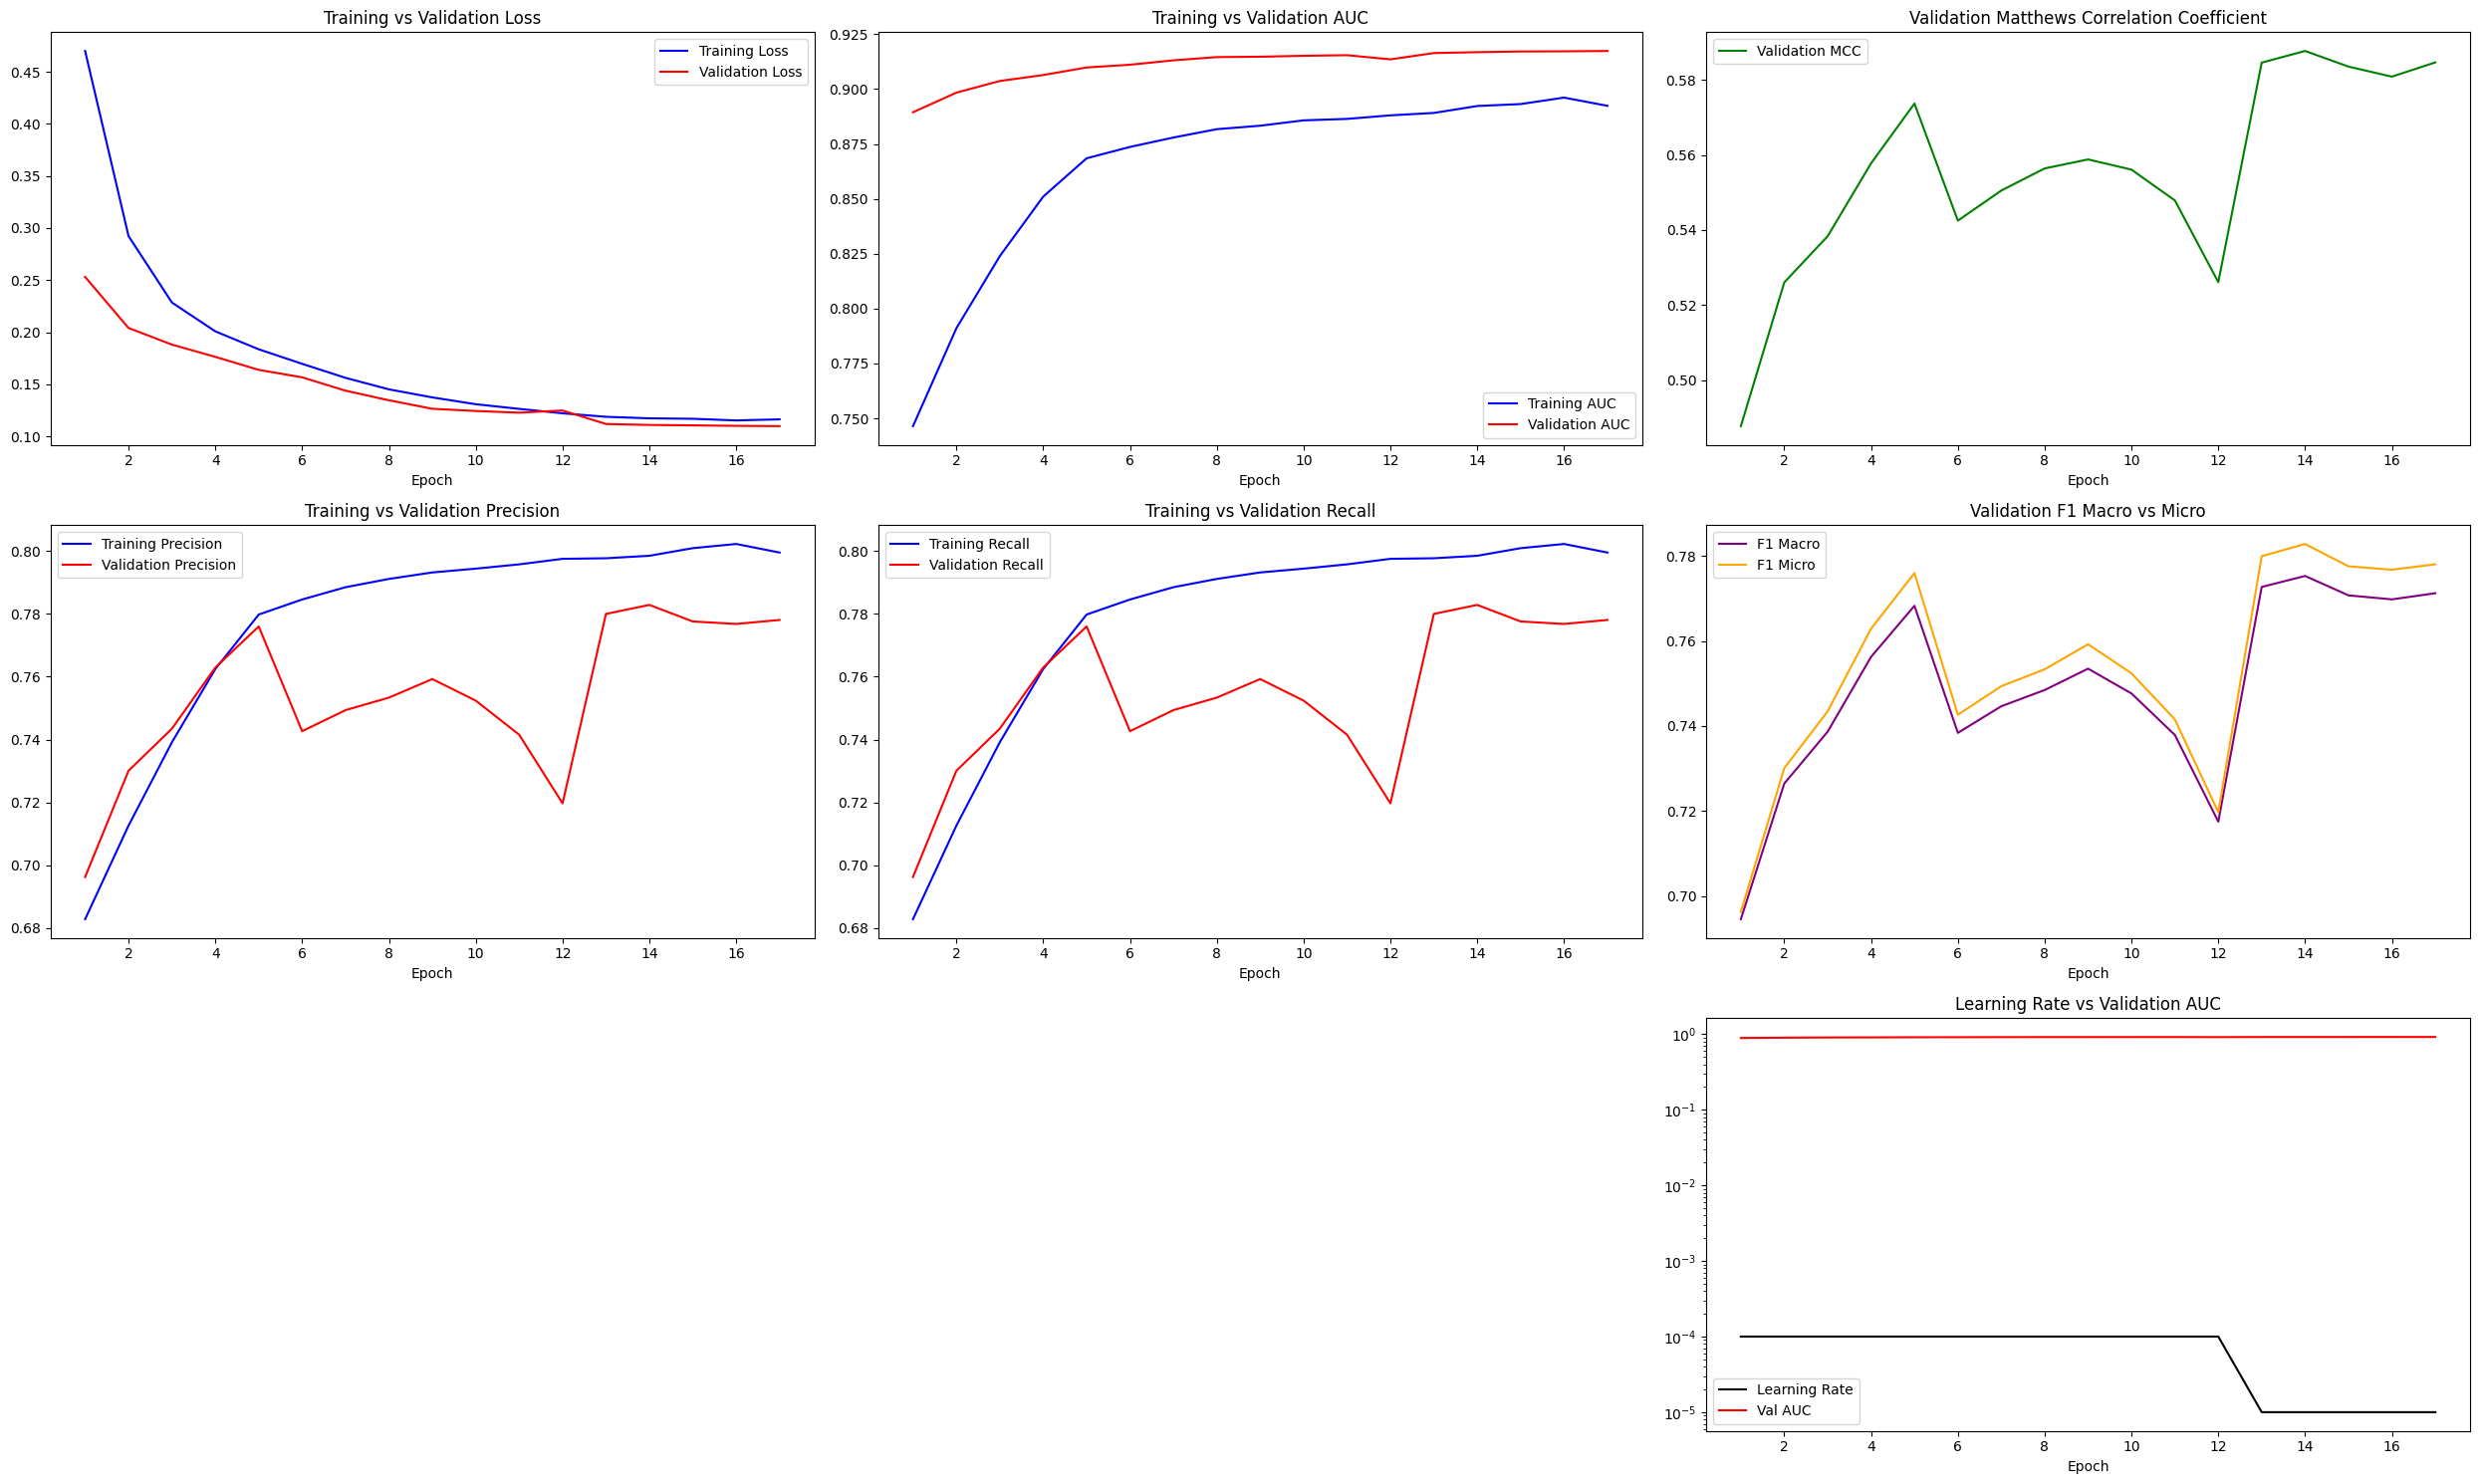

In [75]:
import matplotlib.pyplot as plt

def plot_full_history(history):
    """
    Plota métricas de treino e validação para qualquer fase do treino (history_1, history_2 ou full_history).
    Verifica se as métricas existem antes de plotar.
    """
    # Detecta se history é um objeto `History` do Keras ou um dicionário
    history_data = history.history if hasattr(history, 'history') else history

    # Verifica as métricas disponíveis
    print("Chaves disponíveis no histórico:", history_data.keys())

    epochs = range(1, len(history_data['loss']) + 1)

    # Criar figura
    plt.figure(figsize=(25, 15))

    # ---------- Gráficos Principais ----------
    # Loss
    plt.subplot(3, 3, 1)
    plt.plot(epochs, history_data['loss'], 'b', label='Training Loss')
    plt.plot(epochs, history_data['val_loss'], 'r', label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.legend()

    # AUC
    plt.subplot(3, 3, 2)
    plt.plot(epochs, history_data['auc'], 'b', label='Training AUC')
    plt.plot(epochs, history_data['val_auc'], 'r', label='Validation AUC')
    plt.title('Training vs Validation AUC')
    plt.xlabel('Epoch')
    plt.legend()

    # Precision
    plt.subplot(3, 3, 4)
    plt.plot(epochs, history_data['precision'], 'b', label='Training Precision')
    plt.plot(epochs, history_data['val_precision'], 'r', label='Validation Precision')
    plt.title('Training vs Validation Precision')
    plt.xlabel('Epoch')
    plt.legend()

    # Recall
    plt.subplot(3, 3, 5)
    plt.plot(epochs, history_data['recall'], 'b', label='Training Recall')
    plt.plot(epochs, history_data['val_recall'], 'r', label='Validation Recall')
    plt.title('Training vs Validation Recall')
    plt.xlabel('Epoch')
    plt.legend()

    # F1-Score (se disponível)
    if 'val_f1_macro' in history_data and 'val_f1_micro' in history_data:
        plt.subplot(3, 3, 6)
        plt.plot(epochs, history_data['val_f1_macro'], 'purple', label='F1 Macro')
        plt.plot(epochs, history_data['val_f1_micro'], 'orange', label='F1 Micro')
        plt.title('Validation F1 Macro vs Micro')
        plt.xlabel('Epoch')
        plt.legend()

    # MCC (se disponível)
    if 'val_mcc' in history_data:
        plt.subplot(3, 3, 3)
        plt.plot(epochs, history_data['val_mcc'], 'g', label='Validation MCC')
        plt.title('Validation Matthews Correlation Coefficient')
        plt.xlabel('Epoch')
        plt.legend()

    # Specificity vs Sensitivity (se disponível)
    if 'val_specificity' in history_data and 'val_sensitivity' in history_data:
        len_spec = len(history_data['val_specificity'])
        len_sens = len(history_data['val_sensitivity'])
        min_len = min(len(epochs), len_spec, len_sens)  # Garantir que os tamanhos são iguais

        if len_spec == len_sens == len(epochs):
            plt.subplot(3, 3, 7)
            plt.plot(epochs[:min_len], history_data['val_specificity'][:min_len], 'c', label='Validation Specificity')
            plt.plot(epochs[:min_len], history_data['val_sensitivity'][:min_len], 'm', label='Validation Sensitivity')
            plt.title('Validation Specificity vs Sensitivity')
            plt.xlabel('Epoch')
            plt.legend()
        else:
            print(f"⚠️ Aviso: val_specificity ({len_spec}) e val_sensitivity ({len_sens}) têm tamanhos diferentes de epochs ({len(epochs)}). Ignorando plot.")

    # Balanced Accuracy (se disponível)
    if 'val_balanced_acc' in history_data:
        if len(history_data['val_balanced_acc']) == len(epochs):
            plt.subplot(3, 3, 8)
            plt.plot(epochs, history_data['val_balanced_acc'], 'brown', label='Validation Balanced Accuracy')
            plt.title('Validation Balanced Accuracy')
            plt.xlabel('Epoch')
            plt.legend()
        else:
            print("⚠️ Aviso: val_balanced_acc tem tamanho diferente de epochs. Ignorando plot.")

    # Learning Rate vs Val AUC
    if 'lr' in history_data:
        min_len = min(len(epochs), len(history_data['lr']), len(history_data['val_auc']))
        plt.subplot(3, 3, 9)
        plt.plot(epochs[:min_len], history_data['lr'][:min_len], 'k', label='Learning Rate')
        plt.plot(epochs[:min_len], history_data['val_auc'][:min_len], 'r', label='Val AUC')
        plt.title('Learning Rate vs Validation AUC')
        plt.xlabel('Epoch')
        plt.yscale('log')
        plt.legend()

    # Ajustar layout
    plt.tight_layout()
    plt.show()

# Agora execute novamente:
# plot_full_history(history_1)  # Para visualizar a fase 1 (cabeça do modelo)
# plot_full_history(history_2)  # Para visualizar a fase 2 (fine-tuning)
plot_full_history(full_history)  # Para visualizar o histórico completo


In [92]:
# Código para salvar tudo no final do treino
import pickle
import tensorflow as tf
import json

# 📌 1. Salvar pesos do modelo
model.save_weights("model_weights.h5")

# 📌 2. Salvar arquitetura do modelo
with open("model_architecture.json", "w") as f:
    f.write(model.to_json())

# 📌 3. Salvar histórico do treinamento
with open("full_history.pkl", "wb") as f:
    pickle.dump(full_history, f)

# 📌 4. Salvar modelo completo (inclui estado do otimizador)
model.save("model_checkpoint.keras")


In [ ]:
# Código para carregar tudo depois
import pickle
import tensorflow as tf
import json

# 📌 1. Restaurar arquitetura do modelo
with open("model_architecture.json", "r") as f:
    model = tf.keras.models.model_from_json(f.read())

# 📌 2. Restaurar pesos do modelo
model.load_weights("model_weights.h5")

# 📌 3. Restaurar histórico do treinamento
with open("full_history.pkl", "rb") as f:
    full_history = pickle.load(f)

# 📌 4. Restaurar modelo completo (inclui estado do otimizador, pode continuar treinando)
model = tf.keras.models.load_model("model_checkpoint.keras")

# 📌 Agora podes continuar usando o modelo normalmente!
plot_full_history(full_history)  # Para visualizar métricas anteriores


Com esses arquivos, podemos:

Fazer inferência sem precisar treinar novamente.
Continuar treinando de onde paraste.
Gerar gráficos e análises mesmo depois de fechar o ambiente.

In [ ]:
#### Verificacão das camadas do ViT para construçãpo de mapas de atenção #####

In [77]:
# 📌 Listar as camadas do modelo para encontrar a correta
for i, layer in enumerate(model.layers):
    print(f"{i}: {layer.name} - {layer.__class__.__name__}")

# 📌 Listar subcamadas do ViT para encontrar o Encoder
vit_layer = model.get_layer("vi_t_feature_extractor")  # Se esta camada existir
for i, sublayer in enumerate(vit_layer.submodules):
    print(f"{i}: {sublayer.name} - {sublayer.__class__.__name__}")


0: pixel_values - InputLayer
1: vi_t_feature_extractor - ViTFeatureExtractor
2: tf.__operators__.getitem - SlicingOpLambda
3: layer_normalization - LayerNormalization
4: dense - Dense
5: p_re_lu - PReLU
6: batch_normalization - BatchNormalization
7: dropout - Dropout
8: dense_1 - Dense
9: p_re_lu_1 - PReLU
10: batch_normalization_1 - BatchNormalization
11: dropout_1 - Dropout
12: dense_2 - Dense
13: p_re_lu_2 - PReLU
14: batch_normalization_2 - BatchNormalization
15: dropout_2 - Dropout
16: dense_3 - Dense
0: tf_vi_t_model - TFViTModel
1: vit - TFViTMainLayer
2: embeddings - TFViTEmbeddings
3: encoder - TFViTEncoder
4: layernorm - LayerNormalization
5: pooler - TFViTPooler
6: patch_embeddings - TFViTPatchEmbeddings
7: dropout - Dropout
8: projection - Conv2D
9: layer_._0 - TFViTLayer
10: layer_._1 - TFViTLayer
11: layer_._2 - TFViTLayer
12: layer_._3 - TFViTLayer
13: layer_._4 - TFViTLayer
14: layer_._5 - TFViTLayer
15: layer_._6 - TFViTLayer
16: layer_._7 - TFViTLayer
17: layer_._8 - 

In [78]:
# 📌 Obter a camada correta do ViT dentro do modelo treinado
vit_extractor = model.get_layer("vi_t_feature_extractor")  # Ajuste o nome conforme necessário

# 📌 Agora pegamos o modelo ViT dentro dessa camada
vit_model = vit_extractor.vit  # Agora temos o ViT puro
print(f"Modelo ViT carregado: {vit_model}")


Modelo ViT carregado: <transformers.models.vit.modeling_tf_vit.TFViTModel object at 0x7f27ae383a50>


In [79]:
# Obter a camada que contém o ViT
vit_extractor = model.get_layer("vi_t_feature_extractor")

# Verificar se a camada tem o atributo 'vit' (onde o modelo ViT do Hugging Face está armazenado)
if hasattr(vit_extractor, "vit"):
    print("✅ O ViT está acessível dentro da camada personalizada!")
    print("🔍 Atributos disponíveis dentro de vit_extractor.vit:")
    print(dir(vit_extractor.vit))
else:
    print("❌ O ViT não foi encontrado dentro da camada personalizada.")


✅ O ViT está acessível dentro da camada personalizada!
🔍 Atributos disponíveis dentro de vit_extractor.vit:
['_SCALAR_UPRANKING_ON', '_TF_MODULE_IGNORED_PROPERTIES', '__annotations__', '__call__', '__class__', '__copy__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_activity_regularizer', '_add_trackable', '_add_trackable_child', '_add_variable_with_custom_getter', '_aggregate_exact_metrics', '_assert_compile_was_called', '_assert_weights_created', '_auto_class', '_auto_get_config', '_auto_track_sub_layers', '_autocast', '_autographed_call', '_autotune_steps_per_execution', '_base_model_initialized', '_build_input_shape', '_call_spec', '_callable_losses', 

In [ ]:
######### Mapas de atenção ###########

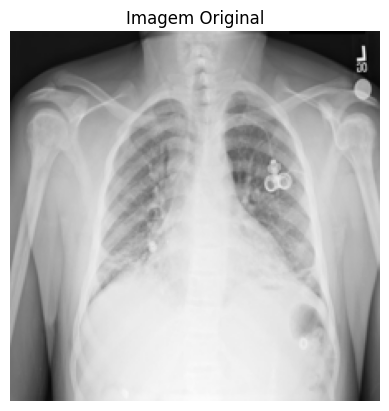

In [81]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random

# 📌 Escolher um índice aleatório dentro do conjunto de validação
random_index = random.randint(0, len(val_image_paths) - 1)
image_path = val_image_paths[random_index]  # Pegando uma imagem aleatória

# 📌 Carregar a imagem e redimensionar para o formato ViT (224x224)
img = Image.open(image_path).convert("RGB")  # Converter para RGB
img = img.resize((224, 224))  # Redimensionar para 224x224
img_array = np.array(img)  # Converter para array NumPy
img_tensor = tf.convert_to_tensor(img_array, dtype=tf.float32) / 255.0  # Normalizar para [0,1]
img_tensor = tf.expand_dims(img_tensor, axis=0)

# 📌 Exibir a imagem carregada
plt.imshow(img)
plt.axis("off")
plt.title("Imagem Original")
plt.show()

In [82]:
# ✅ PASSO 3: Rodar o ViT e obter os mapas de atenção
# 📌 Rodar a inferência no ViT para obter o mapa de atenção
vit_model.config.output_attentions = True  # Ativar a saída de atenções

# 📌 Corrigir formato: ViT espera (batch, channels, height, width)
img_tensor = tf.transpose(img_tensor, [0, 3, 1, 2])  # Agora fica (1, 3, 224, 224)

# 📌 Agora podemos rodar o modelo sem erro
outputs = vit_model(img_tensor, training=False)

# 📌 Extraindo as atenções de todas as camadas
attentions = outputs.attentions  # Lista com atenções de todas as camadas

# 📌 Pegamos a última camada de atenção (pois é a mais interpretável)
attention_map = attentions[-1][0]  # (num_heads, num_tokens, num_tokens)

# 📌 Pegamos a média das cabeças de atenção
attention_map = tf.reduce_mean(attention_map, axis=0)  # Agora temos (num_tokens, num_tokens)

# 📌 Exibir o shape do mapa de atenção
print(f"Shape original do mapa de atenção: {attention_map.shape}")  


#Se tudo estiver correto, o output esperado deve ser: Shape original do mapa de atenção: (197, 197)

Shape original do mapa de atenção: (197, 197)


In [83]:
# ✅ PASSO 4: Remover o token [CLS] corretamente
# 📌 Remover a linha e a coluna do token [CLS]
attention_map = attention_map[1:, 1:]  # Agora fica (196, 196)

# 📌 Verificar se agora está correto
print(f"Novo shape do mapa de atenção: {attention_map.shape}")

# Agora o output esperado é:Novo shape do mapa de atenção: (196, 196)

Novo shape do mapa de atenção: (196, 196)


In [84]:
# 📌 Reduzir o mapa de atenção para um vetor de 196 elementos
attention_map_reduced = tf.reduce_mean(attention_map, axis=0)  # Média entre os patches
print(f"Novo shape após redução: {attention_map_reduced.shape}")
# Esperado:Novo shape após redução: (196,)

Novo shape após redução: (196,)


In [85]:
grid_size = 14  # Patches do ViT
attention_map_final = tf.reshape(attention_map_reduced, (grid_size, grid_size))

print(f"Shape final do mapa de atenção: {attention_map_final.shape}")
#Esperado:Shape final do mapa de atenção: (14, 14)

Shape final do mapa de atenção: (14, 14)


In [86]:
# 📌 Redimensionar para o tamanho original da imagem
attention_map_resized = tf.image.resize(
    attention_map_final[None, ..., None],  # Adiciona dimensão extra (1,14,14,1)
    (224, 224),
    method="bicubic"
)[0, ..., 0]  # Remove batch e canal extra

print(f"Shape do mapa redimensionado: {attention_map_resized.shape}")
# Esperado:Shape do mapa redimensionado: (224, 224)

Shape do mapa redimensionado: (224, 224)


Valores mínimos e máximos do mapa de atenção antes da normalização: 0.00024015535018406808, 0.03750918060541153
Valores pós-normalização: 0.0, 1.0


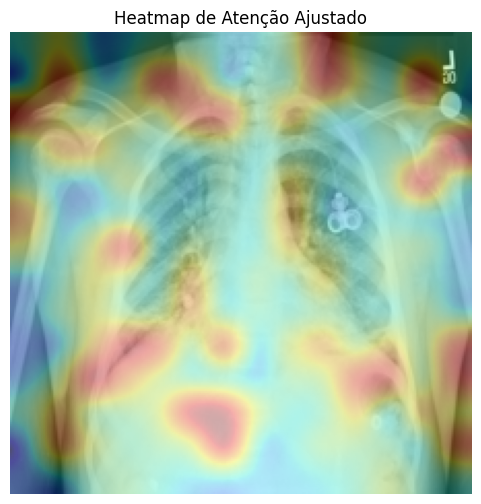

In [87]:
# ✅ PASSO 6: Redimensionar para 224×224 e sobrepor na imagem
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 📌 Redimensionar o mapa de atenção para 224x224 (antes da normalização)
attention_map_resized = tf.image.resize(
    attention_map_final[None, ..., None],  # Adicionamos dimensão extra para compatibilidade (1,14,14,1)
    (224, 224),
    method="mitchellcubic"  # Troque por  "bicubic#, "nearest", "bilinear", "gaussian", lanczos3, lanczos5, mitchellcubic, etc.
)[0, ..., 0]  # Remove batch e canal extra


# 📌 Verificar os valores antes da normalização (ajuste inicial)
print(f"Valores mínimos e máximos do mapa de atenção antes da normalização: {tf.reduce_min(attention_map)}, {tf.reduce_max(attention_map)}")

# 📌 Aumentar contraste antes da normalização
attention_map_resized = attention_map_resized * 20  # Ajuste este fator conforme necessário

# 📌 Normalizar de forma mais robusta
attention_map_resized = (attention_map_resized - tf.reduce_min(attention_map_resized)) / \
                        (tf.reduce_max(attention_map_resized) - tf.reduce_min(attention_map_resized) + 1e-10)

# 📌 Verificar valores pós-normalização
print(f"Valores pós-normalização: {tf.reduce_min(attention_map_resized)}, {tf.reduce_max(attention_map_resized)}")

# 📌 Melhorar contraste do heatmap
attention_heatmap = attention_map_resized ** 0.5  # Ajusta o foco em áreas mais fracas

# 📌 Aplicar colormap para gerar imagem de calor
cmap = plt.colormaps["jet"]
attention_heatmap = cmap(attention_heatmap.numpy())  # Converte para RGBA

# 📌 Ajustar a transparência do heatmap
alpha = 0.3  # Melhor transparência para sobreposição

# 📌 Garantir que a imagem original esteja no formato correto
img_for_plot = tf.transpose(img_tensor[0], [1, 2, 0])  # Transpor para (224, 224, 3)

# 📌 Exibir imagem original com heatmap sobreposto
plt.figure(figsize=(6, 6))
plt.imshow(img_for_plot.numpy())  # Exibir imagem original
plt.imshow(attention_heatmap[..., :3], alpha=alpha)  # Sobrepor heatmap
plt.axis("off")
plt.title("Heatmap de Atenção Ajustado")
plt.show()


🔹 Imagem selecionada 1: /notebooks/RSNA_Pneumonia/Normal/6a78c9ba-1d1e-4171-b169-4b8d7e8d2129.png
🟢 Shape de img_tensor: (1, 3, 224, 224)
🔴 Shape do mapa de atenção antes do reshape: (196,)
🔹 Imagem selecionada 2: /notebooks/RSNA_Pneumonia/Normal/bae7b70b-8592-478f-a88a-38a464868f1d.png
🟢 Shape de img_tensor: (1, 3, 224, 224)
🔴 Shape do mapa de atenção antes do reshape: (196,)
🔹 Imagem selecionada 3: /notebooks/RSNA_Pneumonia/Normal/cb9abd45-0998-4ab5-872e-47a120bad932.png
🟢 Shape de img_tensor: (1, 3, 224, 224)
🔴 Shape do mapa de atenção antes do reshape: (196,)


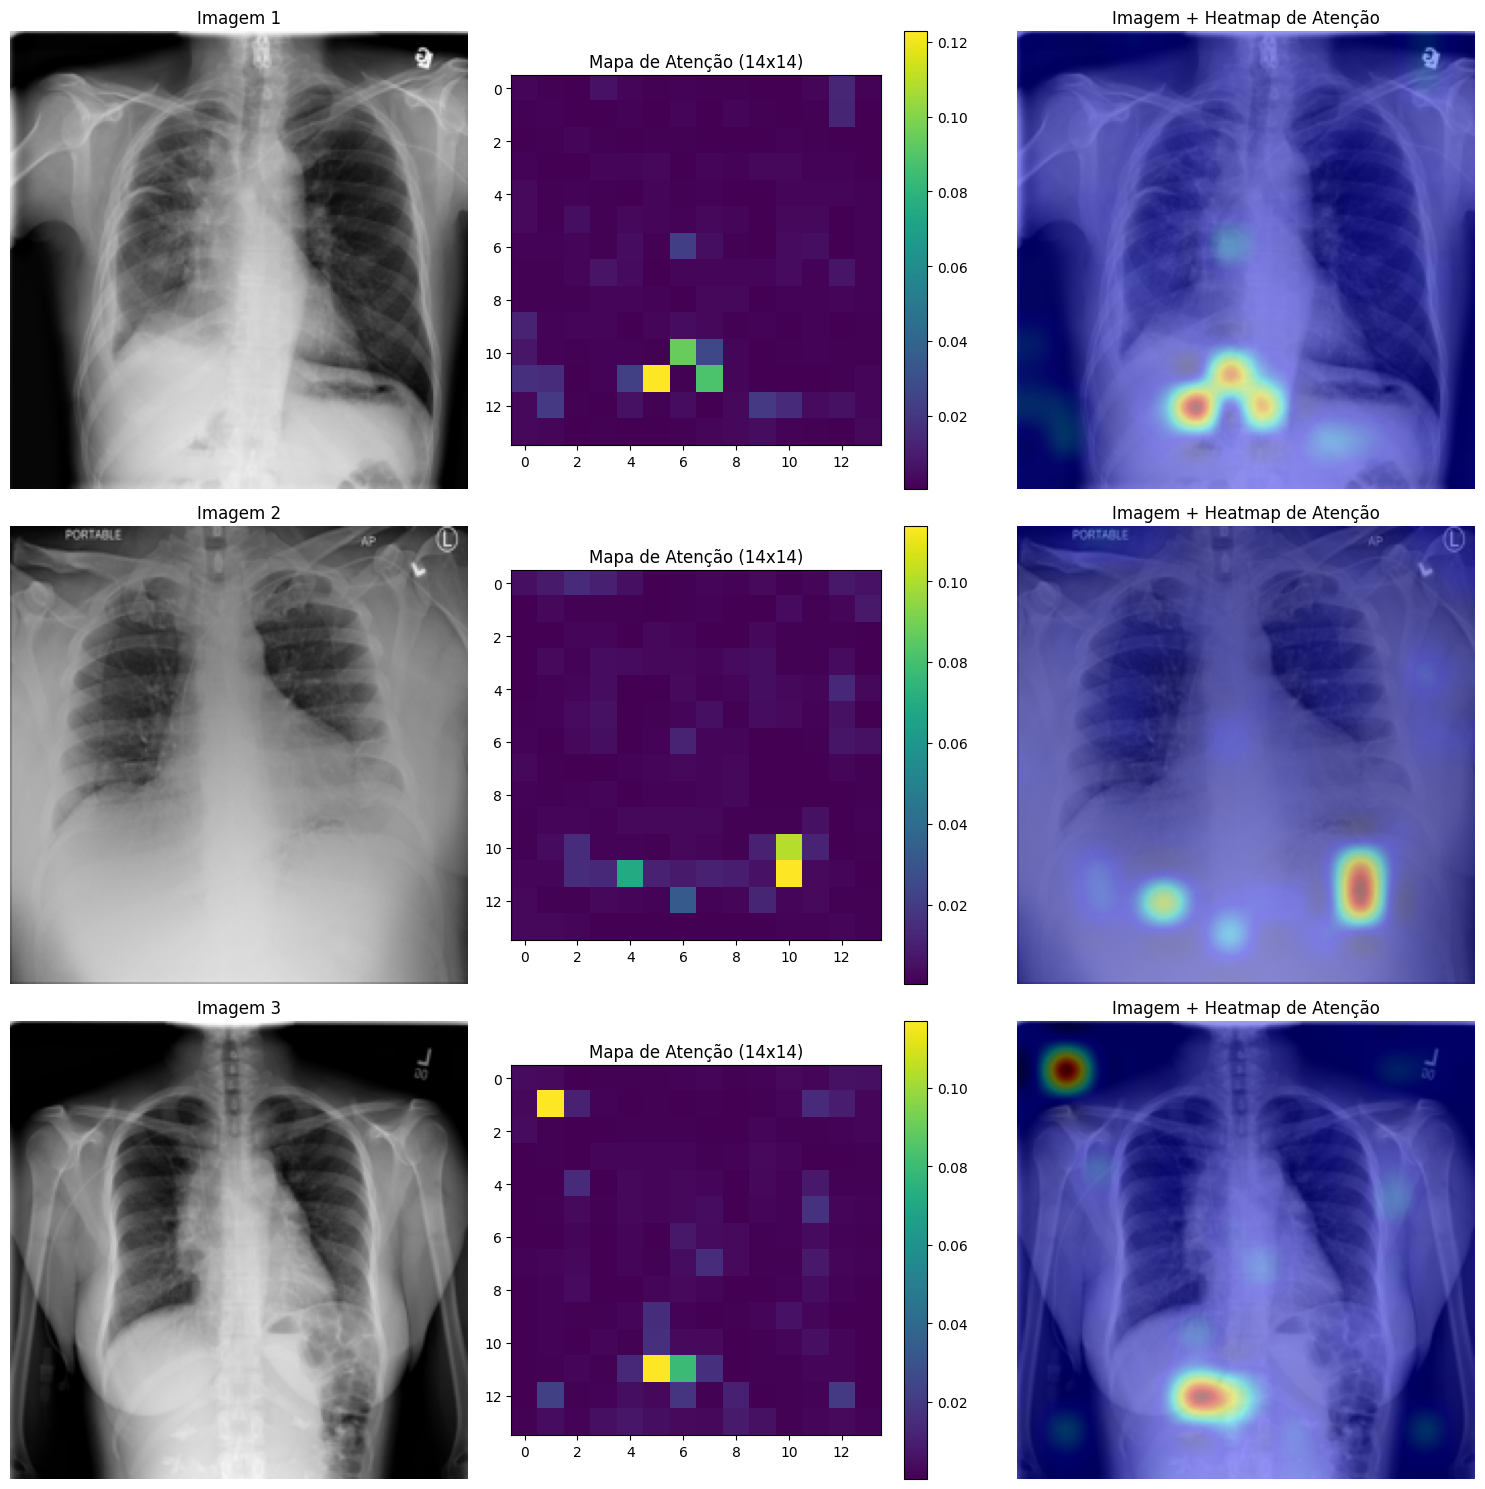

In [88]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image
import matplotlib.cm as cm  # Para colormap

# 📌 Número de imagens a testar
NUM_IMAGENS = 3  

# 📌 Criar uma figura para exibir todas as imagens
fig, axes = plt.subplots(NUM_IMAGENS, 3, figsize=(15, 5 * NUM_IMAGENS))

for i in range(NUM_IMAGENS):
    # 📌 Escolher uma imagem aleatória do conjunto de validação
    random_index = random.randint(0, len(val_image_paths) - 1)
    image_path = val_image_paths[random_index]

    print(f"🔹 Imagem selecionada {i+1}: {image_path}")  # ✅ Verifica se as imagens estão mudando

    # 📌 Carregar a imagem e processar
    img = Image.open(image_path).convert("RGB")
    img = img.resize((224, 224))  
    img_array = np.array(img)
    img_tensor = tf.convert_to_tensor(img_array, dtype=tf.float32) / 255.0  

    # ✅ **Correção importante**
    img_tensor = tf.transpose(img_tensor, [2, 0, 1])  # Agora é (3, 224, 224)
    img_tensor = tf.expand_dims(img_tensor, axis=0)  # (1, 3, 224, 224)

    print(f"🟢 Shape de img_tensor: {img_tensor.shape}")  # ✅ Verifica se a imagem processada muda

    # 📌 Rodar o modelo ViT para obter atenções
    outputs = vit_model(img_tensor, training=False)
    attentions = outputs.attentions  # Pegamos todas as camadas de atenção

    # 📌 Obter o mapa de atenção da última camada (média das cabeças de atenção)
    attention_map = tf.reduce_mean(attentions[-1][0], axis=0)

    # 📌 Pegamos apenas a **linha 0** (token `[CLS]`) olhando para os **196 patches**
    cls_attention = attention_map[0, 1:]  # Shape: (196,)

    print(f"🔴 Shape do mapa de atenção antes do reshape: {cls_attention.shape}")  # Deve ser (196,)

    # 📌 Agora podemos fazer o reshape corretamente para 14x14
    attention_map_resized = tf.reshape(cls_attention, (14, 14))

    # 🔹 Normalizar heatmap para [0,1]
    heatmap = tf.image.resize(attention_map_resized[None, ..., None], (224, 224), method="bicubic")[0, ..., 0]
    heatmap = (heatmap - tf.reduce_min(heatmap)) / (tf.reduce_max(heatmap) - tf.reduce_min(heatmap) + 1e-10)

    # 📌 Aplicar colormap
    cmap = plt.colormaps["jet"]
    heatmap_color = cmap(heatmap.numpy())  

    # 📌 Criar sobreposição do heatmap com a imagem original
    alpha = 0.4  
    blended = (img_array / 255.0) * 0.6 + heatmap_color[..., :3] * 0.4  
    blended = np.clip(blended, 0, 1)  

    # 🔹 Exibir resultados
    axes[i, 0].imshow(img)
    axes[i, 0].axis("off")
    axes[i, 0].set_title(f"Imagem {i+1}")

    axes[i, 1].imshow(attention_map_resized.numpy(), cmap="viridis")
    axes[i, 1].set_title("Mapa de Atenção (14x14)")
    fig.colorbar(axes[i, 1].imshow(attention_map_resized.numpy(), cmap="viridis"), ax=axes[i, 1])

    axes[i, 2].imshow(blended)
    axes[i, 2].axis("off")
    axes[i, 2].set_title("Imagem + Heatmap de Atenção")

plt.tight_layout()
plt.show()


🔹 Imagem selecionada 1: /notebooks/RSNA_Pneumonia/Pneumonia/f0678ab1-7a59-46b9-ba2c-def9ad6b8d22.png
🟢 Shape de img_tensor antes da transposição: (1, 224, 224, 3)
🟢 Shape de img_tensor depois da transposição: (1, 3, 224, 224)
🔴 Shape da atenção CLS->patches: (196,)
🔴 Shape após reshape: (14, 14)
🔹 Imagem selecionada 2: /notebooks/RSNA_Pneumonia/Pneumonia/aa47c55a-7cf7-4105-9132-de080664f052.png
🟢 Shape de img_tensor antes da transposição: (1, 224, 224, 3)
🟢 Shape de img_tensor depois da transposição: (1, 3, 224, 224)


/tmp/ipykernel_40/550265411.py:78: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("jet")


🔴 Shape da atenção CLS->patches: (196,)
🔴 Shape após reshape: (14, 14)
🔹 Imagem selecionada 3: /notebooks/RSNA_Pneumonia/Normal/faa81a73-79f9-4b95-9b5c-9170ecae3df6.png
🟢 Shape de img_tensor antes da transposição: (1, 224, 224, 3)
🟢 Shape de img_tensor depois da transposição: (1, 3, 224, 224)
🔴 Shape da atenção CLS->patches: (196,)
🔴 Shape após reshape: (14, 14)


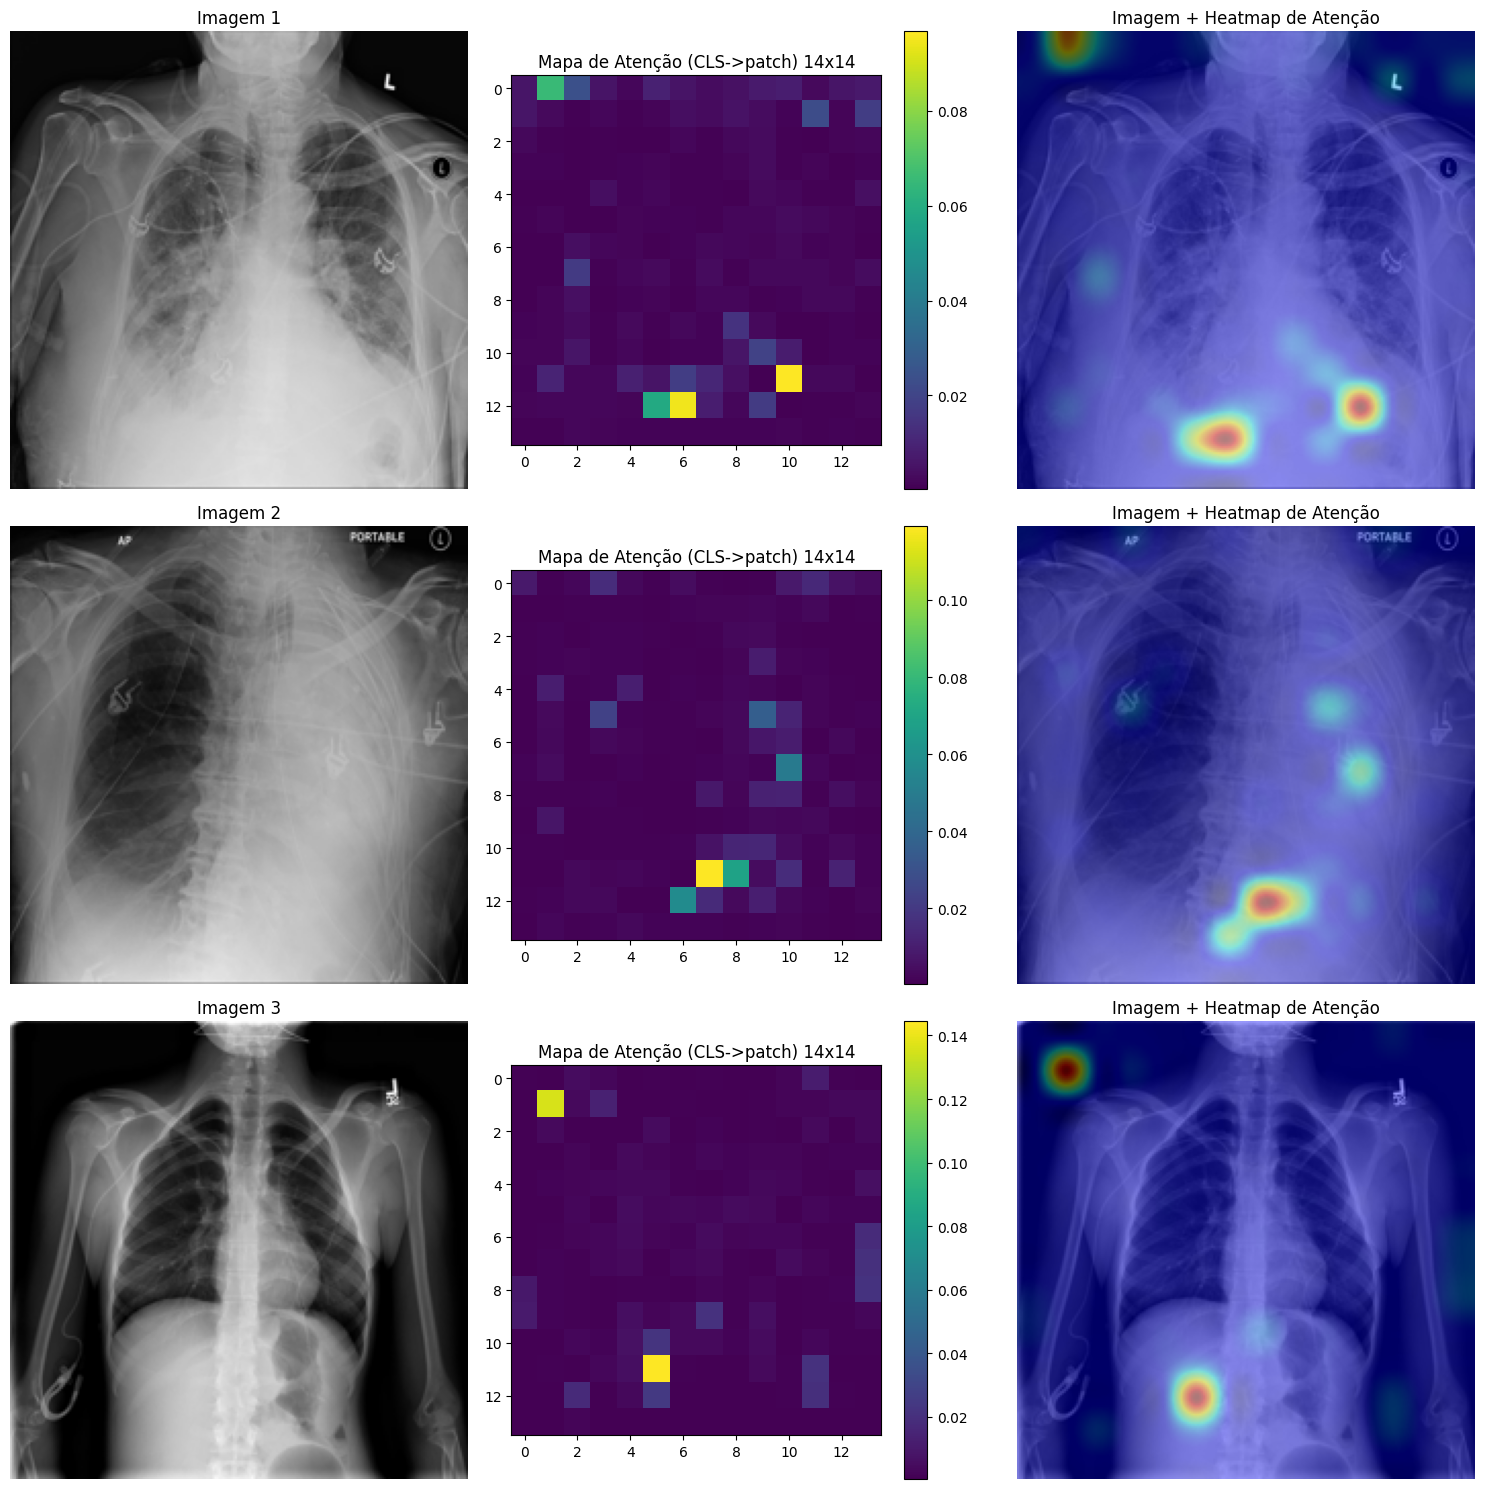

In [89]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image
import matplotlib.cm as cm

# 📌 Número de imagens a testar
NUM_IMAGENS = 3

# 📌 Criar uma figura para exibir todas as imagens
fig, axes = plt.subplots(NUM_IMAGENS, 3, figsize=(15, 5 * NUM_IMAGENS))

for i in range(NUM_IMAGENS):
    # 📌 Escolher uma imagem aleatória do conjunto de validação
    random_index = random.randint(0, len(val_image_paths) - 1)
    image_path = val_image_paths[random_index]

    print(f"🔹 Imagem selecionada {i+1}: {image_path}")

    # 📌 Carregar a imagem e garantir que esteja em RGB
    img = Image.open(image_path)
    if img.mode != "RGB":
        print(f"⚠️ Imagem {i+1} não está em RGB. Convertendo...")
        img = img.convert("RGB")

    img = img.resize((224, 224))
    img_array = np.array(img)

    # 📌 Garantir que a imagem tem exatamente 3 canais
    if img_array.shape[-1] != 3:
        print(f"⚠️ Imagem {i+1} tem {img_array.shape[-1]} canais. Ajustando para RGB...")
        img_array = np.stack([img_array] * 3, axis=-1)

    # 📌 Normalizar e expandir dims
    img_tensor = tf.convert_to_tensor(img_array, dtype=tf.float32) / 255.0
    img_tensor = tf.expand_dims(img_tensor, axis=0)  # (1, 224, 224, 3)
    print(f"🟢 Shape de img_tensor antes da transposição: {img_tensor.shape}")

    # 📌 Transpõe para (batch_size, channels, height, width)
    img_tensor = tf.transpose(img_tensor, [0, 3, 1, 2])  # (1, 3, 224, 224)
    print(f"🟢 Shape de img_tensor depois da transposição: {img_tensor.shape}")

    # 📌 Rodar o modelo ViT para obter atenções
    outputs = vit_model(img_tensor, training=False)
    attentions = outputs.attentions  # (n_layers, batch, num_heads, seq_len, seq_len)

    # --------------------------------------
    # PARTE CRÍTICA: pegar somente (CLS -> patches) da ÚLTIMA camada
    # --------------------------------------
    # atenções da última camada => shape (batch=1, num_heads, seq_len, seq_len)
    attn_last_layer = attentions[-1][0]  # => (num_heads, seq_len, seq_len)

    # Média das heads => shape (seq_len, seq_len)
    attention_map = tf.reduce_mean(attn_last_layer, axis=0)

    # Pegamos a linha 0 (CLS) => shape (seq_len,)
    cls_to_all = attention_map[0]

    # Descartar posição 0 (o próprio CLS)
    cls_to_patches = cls_to_all[1:]  # => shape (196,)

    # Reshape para 14x14
    grid_size = 14
    print(f"🔴 Shape da atenção CLS->patches: {cls_to_patches.shape}")
    attention_map_resized = tf.reshape(cls_to_patches, (grid_size, grid_size))
    print(f"🔴 Shape após reshape: {attention_map_resized.shape}")

    # 🔹 Normalizar heatmap para [0,1] e redimensionar para 224×224
    heatmap = tf.image.resize(
        attention_map_resized[None, ..., None],  # (1,14,14,1)
        (224, 224),
        method="bicubic"
    )[0, ..., 0]
    heatmap = (heatmap - tf.reduce_min(heatmap)) / (tf.reduce_max(heatmap) - tf.reduce_min(heatmap) + 1e-10)

    # Aplicar colormap
    cmap = cm.get_cmap("jet")
    heatmap_color = cmap(heatmap.numpy())

    # Criar sobreposição do heatmap com a imagem original
    alpha = 0.4
    blended = (img_array / 255.0) * (1 - alpha) + heatmap_color[..., :3] * alpha
    blended = np.clip(blended, 0, 1)

    # 🔹 Exibir resultados
    axes[i, 0].imshow(img)
    axes[i, 0].axis("off")
    axes[i, 0].set_title(f"Imagem {i+1}")

    im = axes[i, 1].imshow(attention_map_resized.numpy(), cmap="viridis")
    axes[i, 1].set_title(f"Mapa de Atenção (CLS->patch) {grid_size}x{grid_size}")
    fig.colorbar(im, ax=axes[i, 1])

    axes[i, 2].imshow(blended)
    axes[i, 2].axis("off")
    axes[i, 2].set_title("Imagem + Heatmap de Atenção")

plt.tight_layout()
plt.show()


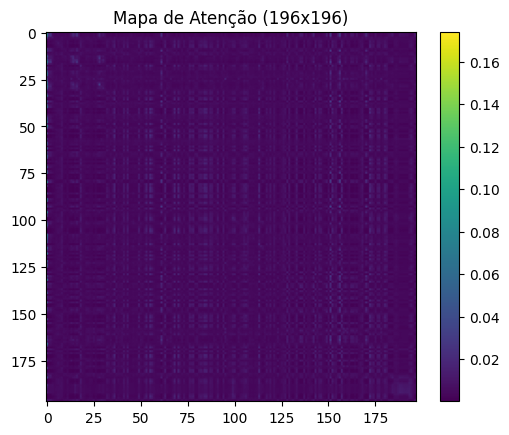

In [175]:
# 1) Visualizar o mapa patch-to-patch completo (196×196)
plt.imshow(attention_map.numpy(), cmap="viridis")
plt.colorbar()
plt.title("Mapa de Atenção (196x196)")
plt.show()

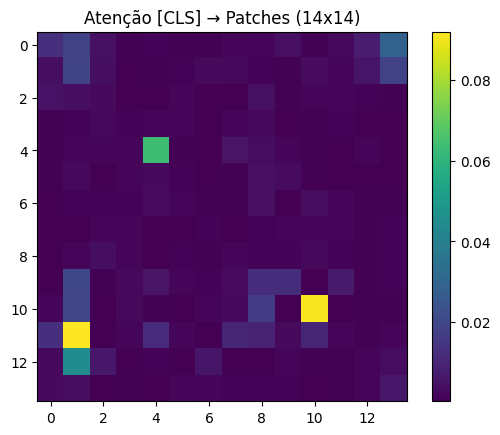

In [176]:
# 2) Visualizar a atenção do [CLS] para cada patch (196 tokens) em forma 14×14

# Pegue a média das cabeças (num_tokens x num_tokens)
attention_map = tf.reduce_mean(attentions[-1][0], axis=0)

# Queremos a linha correspondente ao CLS (índice 0),
# olhando para os patches (índices 1:).
cls_attention = attention_map[0, 1:]  # shape: (196,)

# Agora sim: 196 --> 14 x 14
cls_attention = tf.reshape(cls_attention, (14, 14))

plt.imshow(cls_attention.numpy(), cmap="viridis")
plt.colorbar()
plt.title("Atenção [CLS] → Patches (14x14)")
plt.show()


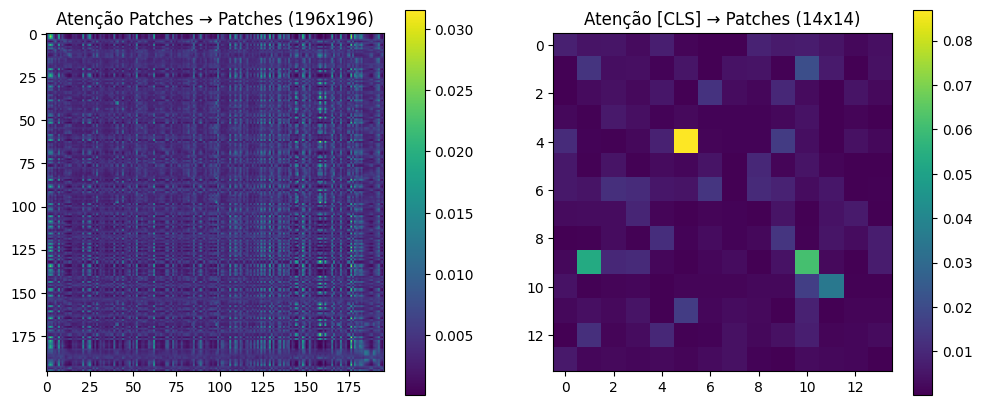

In [154]:
plt.figure(figsize=(12, 5))

# 📌 Mapa de atenção geral
plt.subplot(1, 2, 1)
plt.imshow(attention_map.numpy(), cmap="viridis")
plt.colorbar()
plt.title("Atenção Patches → Patches (196x196)")

# 📌 Mapa de atenção do CLS
plt.subplot(1, 2, 2)
plt.imshow(cls_attention.numpy(), cmap="viridis")
plt.colorbar()
plt.title("Atenção [CLS] → Patches (14x14)")

plt.show()


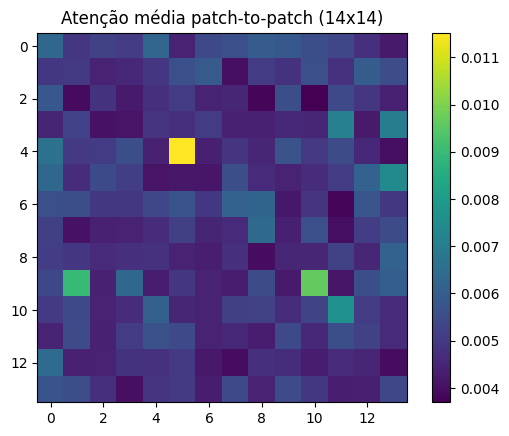

In [97]:
# 3) Visualizar a atenção média entre todos os patches, colapsada em 14×14
# attention_map tem shape [197, 197] se ainda inclui [CLS].
# Remova o [CLS] nas duas dimensões (linhas e colunas).
attention_map_no_cls = attention_map[1:, 1:]  # agora a forma deve ser [196, 196]

# Faça a média em 0 ou 1 para obter um vetor de 196 posições
patch_to_patches_avg = tf.reduce_mean(attention_map_no_cls, axis=0)  # shape: [196]

# Agora sim podemos "reshapear" para 14 x 14
patch_to_patches_avg = tf.reshape(patch_to_patches_avg, (14, 14))

plt.imshow(patch_to_patches_avg.numpy(), cmap="viridis")
plt.colorbar()
plt.title("Atenção média patch-to-patch (14x14)")
plt.show()
